# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [7]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = []

In [12]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0x1AD7, 0x19D7, 0x19D7, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9CE, 0xF9CE, 0xD9CE, 0xD9CE, 0xD9CE, 0xD9CE, 0xD9CE, 0xD9CE, 0x58DF, 0x7BDF, 0x599D, 0xF16B, 0xD53, 0x8B4A, 0x4A42, 0x93A, 0x83A, 0xC831, 0xA731, 0x8731, 0x8631, 0x6629, 0x6629, 0x4629, 0x4629, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4521, 0x6521, 0x6521, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x4521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA731, 0xA731, 0xA731, 0xA739, 0xA731, 0xA731, 0xC739, 0xC739, 0xE739, 0xE739, 0xE841, 0xE839, 0xE739, 0xE839, 0x83A, 0x83A, 0x83A, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x842, 0x842, 0xE841, 0x842, 0x84A, 0x842, 0x284A, 0x284A, 0x484A, 0x284A, 0x84A, 0x84A, 0x274A, 0x284A, 0x484A, 0x284A, 0x84A, 0x84A, 0x6952, 0xCA5A, 0xB63, 0xEB62, 0x6B6B, 0x8D6B, 0x6C6B, 0x4B63, 0x2B6B, 0xC962, 0x8862, 0x285A, 0xE759, 0x8651, 0x4651, 0xE548, 0xE448, 0x551, 0x551, 0x2559, 0x4659, 0x4651, 0x4551, 0x4559, 0x2559, 0x6561, 0x6661, 0x8669, 0xC769, 0xA771, 0xA771, 0xC769, 0xC771, 0xC871, 0xE779, 0xC779, 0xE781, 0x882, 0xE881, 0xC781, 0xC881, 0xC781, 0xC781, 0xC779, 0xC781, 0xC881, 0xE881, 0xE881, 0xC781, 0xC779, 0xC779, 0xC779, 0xC879, 0xC879, 0xC879, 0xC879, 0xC879, 0xC879, 0xC879, 0x19CF, 0x19CF, 0x39CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9D6, 0xF9D6, 0xF9CE, 0xF9CE, 0xD8CE, 0xF9D6, 0xD9D6, 0xD9D6, 0xD9CE, 0xD9CE, 0x58DF, 0x1BD7, 0x5895, 0xF16B, 0x2C5B, 0x8B4A, 0x4A42, 0x93A, 0x83A, 0xE831, 0xC831, 0x8731, 0x8629, 0x6629, 0x6629, 0x6629, 0x4521, 0x6521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x4521, 0x6521, 0x4521, 0x4529, 0x4529, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0xA629, 0xA731, 0xA731, 0xA731, 0xA731, 0xA731, 0xA731, 0xC731, 0xA731, 0xC739, 0xC739, 0xC839, 0xC739, 0xC739, 0xE739, 0xE839, 0x83A, 0x83A, 0xE839, 0x73A, 0x842, 0x83A, 0xC839, 0xA739, 0xE741, 0xE739, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x94A, 0x284A, 0x842, 0x842, 0x842, 0x84A, 0x284A, 0x842, 0x94A, 0x94A, 0x84A, 0x84A, 0x6852, 0x8952, 0xC952, 0x2A5B, 0x4A63, 0xAB6B, 0x8B6B, 0x6B6B, 0x4C6B, 0xC6B, 0xAB62, 0x295A, 0xE859, 0x6751, 0x649, 0xC540, 0xA440, 0xE448, 0x549, 0xE540, 0x549, 0x2551, 0x2659, 0x2651, 0x2551, 0x4659, 0x8659, 0x6659, 0xA661, 0xA661, 0xE769, 0xC771, 0xE871, 0xE879, 0x287A, 0x297A, 0x87A, 0xE879, 0xE879, 0xE879, 0xE881, 0xE881, 0xE881, 0xE879, 0xC779, 0xC779, 0xE779, 0xC879, 0xC779, 0xC779, 0xC879, 0xC879, 0xC879, 0xC879, 0xC879, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0x19CF, 0xF9CE, 0xF9D6, 0xF9D6, 0xF9CE, 0xF9CE, 0xF9CE, 0xF8D6, 0xF9D6, 0xD9CE, 0xD9CE, 0xB9CE, 0x38D7, 0x1BD7, 0xF794, 0x7063, 0xCC52, 0xAC4A, 0x4A42, 0x93A, 0x83A, 0xE731, 0xC731, 0xA629, 0x8629, 0x8629, 0x6629, 0x6629, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4521, 0x4529, 0x4529, 0x4521, 0x6521, 0x4521, 0x4529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x8631, 0xA631, 0x8631, 0xA631, 0xA731, 0xC731, 0xC731, 0xC739, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xA739, 0xE739, 0xE739, 0xE739, 0x842, 0x842, 0x842, 0x2842, 0x4842, 0x2842, 0x284A, 0x84A, 0x84A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x484A, 0x484A, 0x84A, 0x284A, 0x2852, 0x284A, 0x274A, 0x284A, 0x284A, 0x484A, 0xA952, 0xAA52, 0xCA5A, 0xEB5A, 0xEB5A, 0x2B63, 0x4B6B, 0x4B6B, 0xB63, 0xB6B, 0x8962, 0x285A, 0xE751, 0x8749, 0x4649, 0x2549, 0xE548, 0xE548, 0x549, 0x549, 0x2551, 0x2549, 0x2551, 0x4551, 0x4551, 0x6559, 0x6659, 0x8661, 0xA661, 0xA761, 0xA761, 0xA761, 0xC771, 0xE879, 0xC871, 0xC779, 0xC779, 0xE879, 0xC779, 0xC779, 0xC779, 0xE779, 0xC779, 0xC779, 0xC879, 0xC879, 0xC779, 0xC879, 0xC879, 0xC879, 0x19C7, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0x19C7, 0x19C7, 0x19CF, 0x19CF, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9CE, 0x19D7, 0xF9D6, 0xF9D6, 0xD9D6, 0xD9CE, 0xD9CE, 0x9AE7, 0x5DD7, 0x1795, 0x9063, 0xEC52, 0xAC4A, 0x4A42, 0x93A, 0x83A, 0xC731, 0xC731, 0x8729, 0x8631, 0x8629, 0x6629, 0x6621, 0x6621, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x4521, 0x4521, 0x4521, 0x6521, 0x4521, 0x4521, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8631, 0x8631, 0x8731, 0xA731, 0xA731, 0xA631, 0xA731, 0xA739, 0xA731, 0xA731, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0x842, 0x842, 0x842, 0x2842, 0x842, 0x742, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x494A, 0x484A, 0x284A, 0x284A, 0x94A, 0x84A, 0x84A, 0x84A, 0x284A, 0x6952, 0x6952, 0xA952, 0xE95A, 0xC95A, 0x2A63, 0x4A63, 0x8B73, 0x4B6B, 0x2B6B, 0x2B6B, 0xB63, 0xAA5A, 0x952, 0xE751, 0x8649, 0x2649, 0xE540, 0xE440, 0xC440, 0x449, 0x549, 0x549, 0x2549, 0x2651, 0x551, 0x551, 0x4551, 0x8659, 0x8661, 0x4659, 0x6561, 0xA669, 0xA769, 0xA771, 0xE779, 0xE879, 0xE879, 0xE871, 0xC771, 0xC771, 0xC871, 0xC871, 0xC871, 0xC871, 0xC871, 0xC871, 0x39CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0xF9CE, 0x19CF, 0xF9CE, 0xF9CE, 0xF9C6, 0x19C7, 0x19CF, 0x19D7, 0xF9D6, 0xF9D6, 0xF9CE, 0xF9CE, 0x19D7, 0xF9D6, 0xF9D6, 0xD9CE, 0xD8CE, 0xB9CE, 0x7ADF, 0x5CDF, 0xF58C, 0x7163, 0xCD4A, 0x8C42, 0x2A42, 0x93A, 0x832, 0xC731, 0xA631, 0x8729, 0x8631, 0x8629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x6521, 0x4521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA639, 0xA731, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xC839, 0xC739, 0x83A, 0x842, 0x842, 0x842, 0x842, 0x842, 0x84A, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x284A, 0x84A, 0x284A, 0x2842, 0x2842, 0x284A, 0x84A, 0x284A, 0x84A, 0x84A, 0x84A, 0x84A, 0x84A, 0x84A, 0x74A, 0xE741, 0x74A, 0x484A, 0x4852, 0x8952, 0xCA5A, 0xCA5A, 0xB5B, 0x2B63, 0x2C63, 0x2B5B, 0x4B63, 0xE95A, 0xAA62, 0x6962, 0x495A, 0xE759, 0x4749, 0x2549, 0x549, 0x549, 0x2549, 0x2549, 0x2551, 0x4551, 0x4551, 0x6651, 0x2551, 0x6659, 0x6659, 0x6661, 0x8661, 0xA661, 0xA761, 0xA661, 0x8661, 0xA669, 0xC771, 0xE871, 0x87A, 0xE879, 0xE879, 0xE879, 0xC871, 0x19CF, 0x39CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0x19CF, 0x19C7, 0x19C7, 0x19CF, 0x19CF, 0xF9CE, 0xF9D6, 0xF9D6, 0x19D7, 0xF9CE, 0x19D7, 0xF9D6, 0xF9D6, 0xD8CE, 0xD9CE, 0xB9CE, 0x5ADF, 0x3DD7, 0xF58C, 0x7063, 0xCC4A, 0xAC42, 0x4942, 0xE931, 0xE831, 0xC731, 0xC729, 0x8729, 0x8629, 0x6629, 0x6629, 0x6621, 0x4621, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x6521, 0x6521, 0x6521, 0x4521, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xC731, 0xA731, 0xC739, 0xC739, 0xC739, 0xC731, 0xC739, 0xA739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC739, 0xC739, 0xC739, 0xC839, 0xE839, 0xE839, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x84A, 0x84A, 0x84A, 0x284A, 0x284A, 0x2842, 0x2842, 0x2842, 0x2842, 0x942, 0x284A, 0x294A, 0x294A, 0x284A, 0x2842, 0x284A, 0x284A, 0x284A, 0x84A, 0x284A, 0x484A, 0x494A, 0x284A, 0x484A, 0x684A, 0xC952, 0xC952, 0x95B, 0xA63, 0xEA62, 0xCA62, 0xB6B, 0xAB5A, 0x8A5A, 0x2952, 0xE851, 0xA751, 0x4649, 0x541, 0xE540, 0xE440, 0x449, 0x549, 0x2549, 0x2549, 0x2551, 0x2551, 0x4551, 0x6659, 0x6551, 0x8659, 0x8659, 0x6661, 0x8661, 0xA769, 0xA769, 0xA769, 0xC769, 0x872, 0x19CF, 0x1ACF, 0x1ACF, 0x19CF, 0x19CF, 0x19CF, 0x39CF, 0x19CF, 0x19CF, 0x19CF, 0xF9C6, 0xF9CE, 0xF9CE, 0xF9D6, 0xF9D6, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9D6, 0xD9D6, 0xD9CE, 0xD9CE, 0xB9CE, 0x7BDF, 0x5CDF, 0xF48C, 0x505B, 0xCC4A, 0xAB42, 0x493A, 0x93A, 0xC831, 0xC731, 0xA731, 0x8729, 0x8631, 0x6629, 0x6629, 0x4621, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x6521, 0x4521, 0x4521, 0x6521, 0x6521, 0x6529, 0x4529, 0x4529, 0x4529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA739, 0xA739, 0xA739, 0xA731, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xA731, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x284A, 0x842, 0x2842, 0x84A, 0x84A, 0x84A, 0x84A, 0x284A, 0x484A, 0x2842, 0x2842, 0x2842, 0x842, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x484A, 0x484A, 0x284A, 0x2852, 0x84A, 0xE841, 0x742, 0x742, 0x742, 0x484A, 0x6852, 0x8952, 0x6952, 0x6952, 0x8A52, 0xAA5A, 0xB63, 0x2C63, 0xB5B, 0xB63, 0xEA5A, 0xAA5A, 0xA962, 0x495A, 0x852, 0xE751, 0x6651, 0x2549, 0x549, 0x541, 0x449, 0x2549, 0x4549, 0x8651, 0x6651, 0x4551, 0x4559, 0x4559, 0x2659, 0x6659, 0x6661, 0x6661, 0x8661, 0x19D7, 0x1AD7, 0x1AD7, 0xF9D6, 0x19D7, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9CE, 0xF9CE, 0x19CF, 0xF9D6, 0xF9D6, 0xD9CE, 0xD9CE, 0xD8CE, 0x7BDF, 0xDDCE, 0xD48C, 0x4E53, 0xCC4A, 0xAB42, 0x493A, 0x93A, 0xC831, 0xC731, 0xC731, 0x8729, 0xA631, 0x8629, 0x6629, 0x4621, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x6521, 0x6521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0xA629, 0xA629, 0xA631, 0xC631, 0xC631, 0xA739, 0xA731, 0xA731, 0xA731, 0xC731, 0xC731, 0xC731, 0xA739, 0xC739, 0xC739, 0xE739, 0xC739, 0xC739, 0xC739, 0xC739, 0xA731, 0x73A, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x84A, 0x84A, 0x84A, 0x2842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x842, 0x2842, 0x284A, 0x2842, 0x4842, 0x2842, 0x484A, 0x484A, 0x284A, 0x284A, 0x284A, 0x284A, 0x2842, 0x284A, 0x284A, 0x2842, 0xE841, 0x84A, 0x284A, 0x484A, 0x694A, 0x494A, 0x694A, 0x694A, 0xC952, 0xC952, 0xC952, 0xE95A, 0xEA62, 0xE95A, 0xA63, 0xCA5A, 0x895A, 0x695A, 0x695A, 0x2852, 0xC749, 0x6649, 0x2541, 0x2541, 0x441, 0x441, 0x2549, 0x2551, 0x2651, 0x6651, 0x6651, 0x6651, 0x6651, 0x1AD7, 0x19D7, 0x19D7, 0x1AD7, 0x1AD7, 0x19D7, 0x19D7, 0x19D7, 0x19D7, 0x19CF, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0xF9D6, 0xF9CE, 0xF9CE, 0x19CF, 0xF9D6, 0xF9D6, 0xD9D6, 0xD9D6, 0xD9CE, 0x9CE7, 0xDBCE, 0x9484, 0x4E5B, 0xCC4A, 0x8B42, 0x293A, 0x932, 0xC831, 0xA731, 0x8731, 0xA631, 0x6729, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6629, 0x6629, 0x6629, 0x8529, 0x8629, 0x8629, 0xA631, 0xA631, 0xA631, 0xA639, 0xA731, 0xA731, 0xA731, 0xA731, 0xC731, 0xC731, 0xA739, 0xC739, 0xA739, 0xC731, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE741, 0xE741, 0xE841, 0xE841, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x84A, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x84A, 0x284A, 0x2842, 0x2842, 0x484A, 0x284A, 0x84A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x484A, 0x2842, 0x284A, 0x84A, 0x84A, 0x84A, 0x84A, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x474A, 0x4852, 0x484A, 0x8852, 0xA952, 0x8A52, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xA95A, 0x895A, 0x2852, 0xE751, 0xC751, 0x8649, 0x2649, 0x549, 0x549, 0x2549, 0x6551, 0x8651, 0x1AD7, 0x19D7, 0x19D7, 0x39D7, 0x3AD7, 0x3AD7, 0x39D7, 0x19D7, 0x19D7, 0x19D7, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19CF, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0xD9D6, 0xD9D6, 0xD8CE, 0x9CE7, 0xBCBE, 0xB384, 0x6E5B, 0xAC4A, 0x8A42, 0x2A3A, 0xE931, 0xE731, 0xA731, 0xA731, 0x8731, 0x8629, 0x6629, 0x6629, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4521, 0x4621, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0xA629, 0xC631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA731, 0xA731, 0xC731, 0xC731, 0xC731, 0xC739, 0xA739, 0xA739, 0xA739, 0xA739, 0xE739, 0xC739, 0xC739, 0xE739, 0xE739, 0x842, 0x742, 0xE841, 0xE741, 0xE741, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x84A, 0x284A, 0x284A, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x84A, 0x284A, 0x284A, 0x684A, 0x884A, 0x8852, 0x8952, 0xA852, 0x8952, 0xA85A, 0x895A, 0x895A, 0xA95A, 0xA95A, 0x8A5A, 0x8962, 0x695A, 0x2952, 0xC851, 0x8749, 0x4641, 0x2541, 0x3AD7, 0x39D7, 0x19D7, 0x19D7, 0x1AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x19D7, 0x19D7, 0xF9CE, 0xF9CE, 0x19CF, 0x19CF, 0x19CF, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0xD9D6, 0xD9D6, 0x19D7, 0x9CEF, 0x7BBE, 0x337C, 0xD5B, 0xAC4A, 0x6B42, 0x2A3A, 0xE931, 0xE731, 0xC731, 0xA731, 0x8631, 0x6629, 0x6629, 0x6629, 0x4629, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4521, 0x4521, 0x4521, 0x6529, 0x6629, 0x6629, 0x8629, 0x8631, 0x6529, 0x8531, 0x8631, 0x8631, 0xA631, 0xA631, 0xA731, 0xA631, 0xA731, 0xA731, 0xA731, 0xA739, 0xA739, 0xA739, 0xA739, 0xC739, 0xE739, 0xA739, 0xC739, 0xC739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0x284A, 0x284A, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x2842, 0x742, 0x74A, 0x74A, 0x484A, 0x484A, 0x484A, 0x4852, 0x4852, 0x4852, 0x4952, 0x4952, 0x6952, 0x8A5A, 0x8A52, 0xA95A, 0x6952, 0x4952, 0x4852, 0x3AD7, 0x39D7, 0x39D7, 0x39D7, 0x3AD7, 0x3AD7, 0x3AD7, 0x19CF, 0x19D7, 0x19CF, 0x19CF, 0xF9CE, 0xF9CE, 0x19CF, 0x19CF, 0x19D7, 0x19CF, 0x19CF, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0x38D7, 0x9CE7, 0xFBAD, 0x327C, 0x2E5B, 0xCC4A, 0x4B42, 0x2A3A, 0xE931, 0xE731, 0xE739, 0x8631, 0x8631, 0x8629, 0x6629, 0x6629, 0x4629, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x6631, 0x8631, 0x8631, 0xA631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA731, 0xA731, 0xA739, 0xA731, 0xA731, 0xC731, 0xC739, 0xA631, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x742, 0x742, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x2842, 0x842, 0x842, 0x2842, 0x842, 0x2742, 0x2842, 0x2842, 0x2742, 0x2842, 0x284A, 0x2842, 0x284A, 0x2842, 0x484A, 0x284A, 0x284A, 0x284A, 0x2842, 0x2842, 0x284A, 0x284A, 0x284A, 0x484A, 0x484A, 0x484A, 0x284A, 0x484A, 0x684A, 0x684A, 0x8852, 0xA852, 0xA95A, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x19CF, 0x19D7, 0x19CF, 0x19CF, 0xF9C6, 0x19CF, 0x19CF, 0x19CF, 0x19D7, 0x19CF, 0x19CF, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0x38DF, 0x9CEF, 0xFBAD, 0x3374, 0xE53, 0xCC4A, 0x6A42, 0xA3A, 0xE839, 0xC831, 0xC739, 0xA631, 0x8631, 0x8629, 0x8629, 0x6629, 0x6529, 0x6521, 0x4521, 0x4521, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4421, 0x4421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x4529, 0x6629, 0x6631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA731, 0xA639, 0x8639, 0xA631, 0xA631, 0xA631, 0xA631, 0xA739, 0xA739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE741, 0x742, 0x742, 0x73A, 0xE741, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0xE841, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x2842, 0x842, 0x2842, 0x2842, 0x2742, 0x2742, 0x2742, 0x2842, 0x2842, 0x2842, 0x284A, 0x2842, 0x2842, 0x2842, 0x484A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x284A, 0x84A, 0x284A, 0x284A, 0x484A, 0x484A, 0x484A, 0x484A, 0x484A, 0x684A, 0x484A, 0x484A, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x19D7, 0x19D7, 0x19CF, 0x19C7, 0x19C7, 0x19C7, 0x19CF, 0x19CF, 0x19CF, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0x58DF, 0x9CE7, 0x9B9D, 0x126C, 0x2D53, 0xCC4A, 0x6B42, 0x293A, 0x83A, 0xC831, 0xA731, 0xA731, 0x6729, 0x8629, 0x8629, 0x6629, 0x6521, 0x4521, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA731, 0xA731, 0xA739, 0xC739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE739, 0x73A, 0x73A, 0x83A, 0xE739, 0x73A, 0x73A, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x2842, 0x2842, 0x2742, 0x2742, 0x742, 0x742, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x2842, 0x284A, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x284A, 0x484A, 0x284A, 0x842, 0x842, 0x274A, 0x484A, 0x284A, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x19D7, 0x19D7, 0x19CF, 0x19C7, 0x19C7, 0x39C7, 0x19CF, 0x19CF, 0x19D7, 0x19CF, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0x79DF, 0x9CEF, 0x9A9D, 0xD26B, 0xED52, 0x8B4A, 0x6A42, 0x293A, 0x83A, 0xA831, 0xA731, 0xA731, 0x8729, 0x8629, 0x6629, 0x6629, 0x6621, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x4521, 0x2521, 0x2421, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2421, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x8629, 0x8631, 0x6531, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0x8631, 0xA631, 0xA631, 0x8631, 0xA631, 0xA731, 0xA631, 0xA631, 0xA739, 0xA731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x84A, 0x742, 0x2742, 0x2742, 0x742, 0x742, 0x842, 0x2842, 0x842, 0x842, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x842, 0x842, 0x284A, 0x284A, 0x284A, 0x2842, 0x2742, 0x284A, 0x284A, 0x2842, 0x2842, 0x2842, 0x284A, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x284A, 0x284A, 0x2842, 0x2842, 0x742, 0x274A, 0x284A, 0x3AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x39D7, 0x19CF, 0x19C7, 0x19C7, 0x19C7, 0x19CF, 0x39CF, 0x39D7, 0x19D7, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0xF9D6, 0x79DF, 0x9DE7, 0x9A9D, 0xF26B, 0xD53, 0xAB4A, 0x4B42, 0x293A, 0xE831, 0xA831, 0xA731, 0xA731, 0x8729, 0x8629, 0x6629, 0x6621, 0x6521, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x519, 0x2419, 0x2419, 0x2421, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2421, 0x2421, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x8629, 0x8529, 0x6529, 0x6629, 0x8629, 0x8629, 0xA631, 0xA631, 0xA629, 0xA631, 0xA631, 0xA631, 0x8631, 0x8731, 0x8631, 0xA631, 0xA631, 0xA731, 0xE739, 0xC631, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0x73A, 0x73A, 0xE739, 0x73A, 0x73A, 0x73A, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x842, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2742, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x2842, 0x2842, 0x2742, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x742, 0x742, 0x274A, 0x5AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x1ACF, 0x1AC7, 0x19C7, 0x19C7, 0x39CF, 0x39CF, 0x19D7, 0x19D7, 0x19D7, 0x19D7, 0x39D7, 0xF9D6, 0x19D7, 0xD9CE, 0x99E7, 0x9CE7, 0x5895, 0x9263, 0xD53, 0xAC4A, 0x6B42, 0x283A, 0xE831, 0xC831, 0xC731, 0xA629, 0x8629, 0x8629, 0x6629, 0x6629, 0x4621, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8629, 0x6529, 0x6529, 0x8629, 0xA629, 0x8629, 0x8631, 0x8631, 0x8631, 0x8631, 0x8731, 0xA631, 0xA631, 0xA731, 0xC739, 0xC739, 0xC639, 0xC739, 0xE739, 0x73A, 0xE839, 0xE739, 0xE739, 0xE739, 0xE739, 0xC741, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0xE739, 0xE741, 0xE741, 0xE741, 0x742, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0xE841, 0xE841, 0x842, 0x842, 0x74A, 0x742, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x742, 0x842, 0x842, 0x742, 0x842, 0x84A, 0x842, 0x842, 0x2842, 0x2742, 0x2742, 0x2842, 0x2842, 0x2842, 0x2742, 0x2742, 0x2742, 0x2742, 0x842, 0x842, 0x842, 0x2742, 0x2842, 0x2742, 0x742, 0x74A, 0x2842, 0x3AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3ACF, 0x1ACF, 0x19C7, 0x19C7, 0x19CF, 0x39CF, 0x39D7, 0x19D7, 0x19D7, 0x19D7, 0x19D7, 0x19D7, 0x19D7, 0xF9CE, 0xFAD6, 0x9AE7, 0x9DDF, 0x3995, 0x715B, 0xEC52, 0xAB4A, 0x6B42, 0x283A, 0xE831, 0xC831, 0xA731, 0xA729, 0x8629, 0x8629, 0x6629, 0x6621, 0x6621, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2419, 0x2419, 0x2419, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x2521, 0x6529, 0x6529, 0x8529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8631, 0x8731, 0x6631, 0x8631, 0xC731, 0xC739, 0xA731, 0xC639, 0xC739, 0xC739, 0x8739, 0xA739, 0xC739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE841, 0xE741, 0xE839, 0xE741, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x742, 0x742, 0xE841, 0x742, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2742, 0x842, 0x842, 0x2842, 0x2742, 0x2742, 0x2742, 0x2742, 0x842, 0x842, 0x842, 0x842, 0x2742, 0x2742, 0x2742, 0x2742, 0x842, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3ACF, 0x1ACF, 0x19C7, 0x1ACF, 0x19CF, 0x39CF, 0x39D7, 0x1AD7, 0x3AD7, 0x19D7, 0x19D7, 0x19D7, 0xF9D6, 0xF9D6, 0xF9CE, 0x9AE7, 0x9DE7, 0xD78C, 0x5163, 0xED52, 0xCC4A, 0x4B3A, 0x283A, 0xE831, 0xC731, 0xA731, 0xA629, 0x8629, 0x8629, 0x8629, 0x6621, 0x4621, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x419, 0x2419, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2419, 0x2419, 0x2419, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2529, 0x2521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0xA629, 0x8529, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0x8631, 0xA731, 0xA739, 0xC639, 0xA739, 0xA739, 0xA739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE741, 0xE741, 0xE741, 0xC841, 0xE841, 0xE841, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2742, 0x2742, 0x742, 0x742, 0x742, 0x2742, 0x2742, 0x842, 0x842, 0x842, 0x842, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x19CF, 0x19C7, 0x3ACF, 0x19CF, 0x19D7, 0x39D7, 0x39D7, 0x3AD7, 0x39D7, 0x19D7, 0x19D7, 0x19D7, 0xF9D6, 0xF9D6, 0xF9D6, 0x9AEF, 0x9EE7, 0x1695, 0x7163, 0xCD4A, 0xAC4A, 0x2B3A, 0x293A, 0xE831, 0xC731, 0xA731, 0xA631, 0x8629, 0x8629, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8529, 0x8629, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA731, 0xA731, 0xA731, 0xA639, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE839, 0xE841, 0xE841, 0xE841, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2742, 0x842, 0x842, 0x742, 0x742, 0x2742, 0x2742, 0x2742, 0x842, 0x842, 0x842, 0x5AD7, 0x5AD7, 0x3AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x1ACF, 0x19C7, 0x19CF, 0x19CF, 0x19CF, 0x39D7, 0x39D7, 0x3AD7, 0x3AD7, 0x19D7, 0x19D7, 0x19D7, 0xF9D6, 0xF9D6, 0xD9CE, 0x9BEF, 0x5EDF, 0xD48C, 0x7163, 0xCC4A, 0xAC4A, 0x2A32, 0x293A, 0xE831, 0xA731, 0xA731, 0xA631, 0x8629, 0x8629, 0x6629, 0x6629, 0x4629, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x2421, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4521, 0x4529, 0x2529, 0x2529, 0x4529, 0x4529, 0x6629, 0x6629, 0x6529, 0x6529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8529, 0x8631, 0x8631, 0x6631, 0x8531, 0xA631, 0xA631, 0xA631, 0xA731, 0xA639, 0xA739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x842, 0xE841, 0x742, 0x2842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE841, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x842, 0x742, 0x742, 0x2742, 0x2742, 0x2742, 0x742, 0x742, 0x842, 0x5AD7, 0x3AD7, 0x3AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3ACF, 0x39C7, 0x39C7, 0x19CF, 0x19CF, 0x19D7, 0x39D7, 0x3AD7, 0x1AD7, 0x1AD7, 0x19D7, 0x19D7, 0x19D7, 0xF9D6, 0x19D7, 0xD9D6, 0x9BE7, 0x3EDF, 0xF58C, 0xB063, 0xEC52, 0x8C4A, 0xA3A, 0x293A, 0x83A, 0xC731, 0xA731, 0xA631, 0x8629, 0x8629, 0x6629, 0x6629, 0x6621, 0x4629, 0x4521, 0x2521, 0x2521, 0x2521, 0x2421, 0x421, 0x421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6629, 0x6629, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8529, 0x8629, 0x8629, 0x6631, 0x6631, 0x8531, 0xA631, 0xA631, 0xA631, 0xA631, 0xA731, 0xA631, 0xC739, 0xE739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x842, 0x842, 0xE841, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0xE741, 0xE741, 0xE739, 0xE739, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE841, 0x842, 0x842, 0x842, 0x742, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3ACF, 0x3AC7, 0x39CF, 0x19CF, 0x39D7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x1AD7, 0xF9D6, 0xF9D6, 0x19D7, 0xDACE, 0x9CEF, 0x3DD7, 0xB48C, 0x4F5B, 0xCB4A, 0xAB4A, 0xA3A, 0x93A, 0xE839, 0xC731, 0xA731, 0x8731, 0x8629, 0x6629, 0x6629, 0x6521, 0x6521, 0x4629, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x521, 0x421, 0x421, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x421, 0x421, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x4521, 0x2521, 0x2529, 0x2529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6631, 0x6631, 0x8531, 0x8531, 0x8631, 0x8631, 0xA631, 0xA631, 0xA639, 0xA739, 0xA639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xC739, 0xC739, 0xC739, 0xE741, 0xC739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0x73A, 0x73A, 0x742, 0xE741, 0xE739, 0xE739, 0xE741, 0xE741, 0xE739, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0xE841, 0x842, 0x742, 0x842, 0x2842, 0x742, 0x742, 0x742, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x842, 0x742, 0x742, 0x5ADF, 0x5ADF, 0x5AD7, 0x5AD7, 0x5AD7, 0x3ACF, 0x3ACF, 0x39C7, 0x39CF, 0x39D7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x1AD7, 0x1AD7, 0x19D7, 0x19D7, 0xF9D6, 0x9DE7, 0xFECE, 0xB484, 0x2F5B, 0xEC4A, 0xAB4A, 0x293A, 0x93A, 0xE839, 0xC731, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x419, 0x421, 0x2521, 0x2421, 0x2419, 0x2519, 0x2521, 0x521, 0x521, 0x521, 0x2421, 0x2421, 0x2421, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8631, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA731, 0xA731, 0xA731, 0xA739, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xE739, 0xC739, 0xC739, 0xE739, 0xC739, 0xC739, 0xC739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x842, 0x742, 0xE741, 0xE739, 0xE741, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0x73A, 0x73A, 0x742, 0x742, 0x742, 0x842, 0xE841, 0x842, 0x73A, 0x742, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x842, 0x742, 0x842, 0x3ADF, 0x5ADF, 0x5AD7, 0x5AD7, 0x5AD7, 0x3ACF, 0x3ACF, 0x39CF, 0x39CF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x19D7, 0x19D7, 0xF9D6, 0xDACE, 0x9DEF, 0xFDCE, 0x9484, 0xF53, 0xEC4A, 0xAA4A, 0x293A, 0x83A, 0xE839, 0xC731, 0xC731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6529, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x419, 0x421, 0x2421, 0x2421, 0x2419, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2419, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6631, 0x6631, 0x8531, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0xA731, 0xA631, 0xA639, 0xA639, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xC739, 0xC741, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0xE739, 0xE741, 0x742, 0xE741, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE741, 0xE741, 0xE739, 0xE739, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0x842, 0x742, 0x2842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x842, 0x842, 0x2842, 0x842, 0x3ADF, 0x5AD7, 0x5AD7, 0x5AD7, 0x5ACF, 0x3ACF, 0x59C7, 0x39CF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x19D7, 0xF9D6, 0xF8D6, 0x9DE7, 0x5CB6, 0x9384, 0x2E53, 0xEC4A, 0x8B42, 0x293A, 0x83A, 0xC831, 0xC731, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6629, 0x6529, 0x4529, 0x4521, 0x4521, 0x2521, 0x2521, 0x521, 0x521, 0x421, 0x421, 0x421, 0x2421, 0x2421, 0x2419, 0x2519, 0x2519, 0x2419, 0x2419, 0x2419, 0x2419, 0x2419, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2421, 0x2421, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x4529, 0x6529, 0x6629, 0x6629, 0x6629, 0x8629, 0x6631, 0x6531, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0xA731, 0xA731, 0xA631, 0xC631, 0xA739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE739, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0x73A, 0xE739, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0x742, 0x742, 0x742, 0x842, 0x73A, 0x742, 0x742, 0x842, 0x842, 0xE841, 0x842, 0x842, 0x842, 0x73A, 0x842, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x5ADF, 0x5AD7, 0x5AD7, 0x5BD7, 0x5ACF, 0x5ACF, 0x5AC7, 0x3ACF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x39D7, 0x3AD7, 0x39D7, 0x19D7, 0xF9D6, 0x59DF, 0x9EF7, 0x3DB6, 0x3474, 0x2E53, 0xEC4A, 0x6B42, 0x493A, 0xE831, 0xE831, 0xC731, 0xC731, 0xA729, 0x8629, 0x8629, 0x6629, 0x6629, 0x4629, 0x4529, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x521, 0x421, 0x421, 0x521, 0x2521, 0x2521, 0x2519, 0x2521, 0x2521, 0x521, 0x2521, 0x2419, 0x2419, 0x2419, 0x2421, 0x2521, 0x521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6531, 0x6531, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA739, 0xC739, 0xC739, 0xC739, 0xA639, 0xC739, 0xC739, 0xC739, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x842, 0xE841, 0xE841, 0x842, 0x842, 0x742, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x2742, 0x742, 0x5AD7, 0x5AD7, 0x5AD7, 0x5BD7, 0x5ACF, 0x5ACF, 0x3ACF, 0x5ACF, 0x3AD7, 0x3AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x5AD7, 0x5AD7, 0x39D7, 0x3AD7, 0x1AD7, 0x19D7, 0x99DF, 0x9DEF, 0xBCA5, 0x1274, 0x2D5B, 0xCC4A, 0x4B42, 0x4A42, 0x83A, 0xE831, 0xC731, 0xC731, 0xA729, 0x8629, 0x8629, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x421, 0x421, 0x421, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2421, 0x2419, 0x2419, 0x2419, 0x2521, 0x521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6531, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA639, 0xA639, 0xA631, 0xA631, 0xC739, 0xC739, 0xC739, 0xC639, 0xC739, 0xC739, 0xC739, 0xA639, 0xA639, 0xC739, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC741, 0xE739, 0xE741, 0xE741, 0xE741, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0x742, 0x742, 0xE741, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x73A, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x5AD7, 0x5AD7, 0x5AD7, 0x5BD7, 0x3ACF, 0x3ACF, 0x3ACF, 0x3ACF, 0x5AD7, 0x3AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x39D7, 0x39D7, 0x3AD7, 0x1AD7, 0x1AD7, 0x99E7, 0x9DF7, 0x9BA5, 0x1374, 0xD5B, 0xAC4A, 0x4B42, 0x4942, 0x83A, 0xE831, 0xC831, 0xA731, 0xA731, 0x8729, 0x8729, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x521, 0x421, 0x521, 0x521, 0x521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2421, 0x2419, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA639, 0xA639, 0xA631, 0xA631, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xA739, 0xA739, 0xC739, 0xC739, 0xE639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xC741, 0xE741, 0xE739, 0xC741, 0xE741, 0x742, 0xE741, 0xE741, 0xE741, 0xC741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0x742, 0xE741, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x742, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x73A, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x7ADF, 0x7AD7, 0x5AD7, 0x5BD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3ADF, 0x3ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x3AD7, 0x39D7, 0x3AD7, 0x3AD7, 0x1AD7, 0x99EF, 0x9EE7, 0x9B9D, 0x1374, 0x2E5B, 0xAC4A, 0x4B42, 0x4942, 0x832, 0xE831, 0xA831, 0xA731, 0xA731, 0x8729, 0x8729, 0x6629, 0x6629, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x419, 0x421, 0x421, 0x521, 0x2521, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA639, 0xC631, 0xC631, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xC741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x842, 0x83A, 0x73A, 0x73A, 0x742, 0x73A, 0x742, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x7ADF, 0x5BD7, 0x5BD7, 0x3AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3ADF, 0x3ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x5ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x9AEF, 0x9DEF, 0x7A9D, 0xD26B, 0xED52, 0xAC4A, 0x6B42, 0x293A, 0x83A, 0xE831, 0xA831, 0xA731, 0xA731, 0x8729, 0x8629, 0x6629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x419, 0x421, 0x421, 0x521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x4421, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8631, 0xA631, 0xA631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xC739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE741, 0xC741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE639, 0xE741, 0xE741, 0xE741, 0x742, 0xE739, 0xE741, 0x742, 0x842, 0x73A, 0x73A, 0x742, 0x742, 0x742, 0x73A, 0x742, 0xE741, 0x742, 0x73A, 0x742, 0x742, 0x742, 0xE741, 0x3ADF, 0x5BDF, 0x5BD7, 0x3ACF, 0x3ACF, 0x3AD7, 0x5AD7, 0x5AD7, 0x5ADF, 0x3BDF, 0x3ADF, 0x3ADF, 0x3ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x3AD7, 0xFAD6, 0x9AF7, 0x9EE7, 0x7A95, 0xF26B, 0xD53, 0xCB4A, 0x6B42, 0x493A, 0x83A, 0xE831, 0xA831, 0xA731, 0xA731, 0x8729, 0x8629, 0x6629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x521, 0x421, 0x421, 0x2421, 0x2421, 0x2419, 0x2421, 0x2421, 0x2521, 0x2419, 0x2521, 0x2521, 0x2521, 0x2519, 0x2419, 0x2421, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x521, 0x421, 0x421, 0x521, 0x2521, 0x2521, 0x2519, 0x2421, 0x2421, 0x2421, 0x2419, 0x2419, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4421, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x4529, 0x6529, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0x8639, 0xA639, 0xA639, 0xA639, 0xA739, 0xC739, 0xC739, 0xA739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC741, 0xE741, 0xE741, 0xE739, 0x742, 0xE739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE641, 0xE741, 0xE741, 0xE741, 0xE741, 0x2742, 0xE741, 0xC739, 0xE739, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x7BDF, 0x7BDF, 0x5BD7, 0x3ACF, 0x5AD7, 0x5AD7, 0x5AD7, 0x5BD7, 0x5BD7, 0x5BDF, 0x3ADF, 0x3ADF, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x3AD7, 0xDACE, 0x9BEF, 0x9EE7, 0x1895, 0x9163, 0xD53, 0xAB4A, 0x4A42, 0x493A, 0x83A, 0xE831, 0xA831, 0xA731, 0xA731, 0x8629, 0x8629, 0x6629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x419, 0x419, 0x2521, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x421, 0x521, 0x2521, 0x2421, 0x2421, 0x2419, 0x2419, 0x2421, 0x2421, 0x2419, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x8531, 0x8631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA639, 0xA739, 0xA739, 0xA739, 0xC739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0x842, 0xE741, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x7BDF, 0x7BD7, 0x5BD7, 0x5ACF, 0x5AD7, 0x5AD7, 0x5ADF, 0x5BDF, 0x5BD7, 0x5ADF, 0x5ADF, 0x5ADF, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0xFACE, 0x9CF7, 0x9EEF, 0x3895, 0x9163, 0xC53, 0xAB4A, 0x4A42, 0x293A, 0x83A, 0xE839, 0xC831, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6629, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2419, 0x2421, 0x2521, 0x2521, 0x2521, 0x4521, 0x2421, 0x2421, 0x2419, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2419, 0x2421, 0x2421, 0x421, 0x2521, 0x2421, 0x2421, 0x2419, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x8531, 0x6631, 0x6631, 0x8631, 0x8639, 0x8639, 0xA639, 0xA739, 0xA639, 0xA739, 0xA639, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC639, 0xC639, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE741, 0xE741, 0xC741, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0xE741, 0xE741, 0xE739, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0x742, 0x742, 0x73A, 0x73A, 0x742, 0x742, 0x73A, 0x7BD7, 0x7BD7, 0x5ACF, 0x5ACF, 0x5AD7, 0x5AD7, 0x5ADF, 0x5BDF, 0x5BD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0xFACE, 0x9CF7, 0x9EE7, 0x1695, 0x7063, 0xED52, 0xAB4A, 0x4A42, 0x293A, 0x83A, 0xE831, 0xC831, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x4521, 0x4521, 0x6521, 0x4521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2419, 0x2421, 0x2421, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2419, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x8531, 0x6631, 0x8631, 0x8631, 0x8639, 0xA631, 0xA639, 0xA639, 0xA639, 0xC639, 0xE739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xC741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0xE741, 0xE739, 0x73A, 0x73A, 0xE739, 0x73A, 0x73A, 0xE739, 0xE739, 0x73A, 0xE739, 0xE741, 0x742, 0x73A, 0x73A, 0x742, 0x73A, 0x73A, 0x7BD7, 0x7BD7, 0x7ACF, 0x5AD7, 0x5AD7, 0x5ADF, 0x5ADF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5AD7, 0x5AD7, 0x5ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0xFAD6, 0x9DEF, 0x7EDF, 0x3695, 0x9063, 0xC53, 0x8B42, 0x6A42, 0x293A, 0x83A, 0xE831, 0xC831, 0xA731, 0xA729, 0xA629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x6521, 0x6521, 0x4529, 0x6529, 0x6521, 0x6521, 0x6521, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2421, 0x2421, 0x2421, 0x2521, 0x2521, 0x2519, 0x2519, 0x2521, 0x2421, 0x521, 0x521, 0x2521, 0x2421, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6631, 0x8631, 0x8631, 0x8631, 0x8639, 0xA639, 0xA639, 0xC639, 0xC639, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC639, 0xC741, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xC741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0x63A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x7BD7, 0x7AD7, 0x7ACF, 0x5AD7, 0x5AD7, 0x5BD7, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BD7, 0x5AD7, 0x5ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x1AD7, 0x9DEF, 0x5EDF, 0xD48C, 0x305B, 0xEC52, 0xAB4A, 0x6A42, 0x93A, 0x93A, 0xE839, 0xC731, 0xA731, 0xA729, 0x8729, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x4521, 0x6521, 0x4521, 0x6529, 0x4529, 0x6529, 0x4529, 0x4521, 0x4521, 0x6521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2519, 0x2421, 0x4521, 0x2521, 0x4519, 0x4519, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2421, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6631, 0x8631, 0x8631, 0x8631, 0xA639, 0xA639, 0xA739, 0xC739, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xE741, 0xE739, 0xE741, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xC741, 0xC741, 0xE741, 0xC741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0x73A, 0x73A, 0xE741, 0xE739, 0xE741, 0x742, 0xE739, 0xE741, 0x642, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0xE739, 0x73A, 0x7BD7, 0x5ACF, 0x7ACF, 0x5AD7, 0x5AD7, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5ADF, 0x5AD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x1AD7, 0x9EEF, 0x1ED7, 0xD58C, 0x6F63, 0xEC52, 0xAB4A, 0x6942, 0x93A, 0x93A, 0xE831, 0xC731, 0xA731, 0x8731, 0x8731, 0x6729, 0x6629, 0x6629, 0x6629, 0x6529, 0x4529, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x4521, 0x4521, 0x6521, 0x6529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6521, 0x6529, 0x6529, 0x6521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4421, 0x2521, 0x2521, 0x2519, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x4421, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA639, 0xC639, 0xC639, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE741, 0xE741, 0xC741, 0xC741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0x73A, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0xE741, 0xE741, 0x73A, 0x2742, 0x2742, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x5BD7, 0x5ACF, 0x5ACF, 0x5BD7, 0x5BD7, 0x5BD7, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5AD7, 0x3AD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x1AD7, 0x9EF7, 0x3ED7, 0x747C, 0x4F5B, 0xAB4A, 0x8B4A, 0x8942, 0x93A, 0xE839, 0xE839, 0xC731, 0xA731, 0xA731, 0x8731, 0x6629, 0x6629, 0x6629, 0x6629, 0x4629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x6629, 0x6629, 0x6621, 0x6521, 0x6529, 0x4529, 0x4529, 0x4521, 0x6529, 0x6521, 0x6529, 0x6521, 0x6521, 0x6521, 0x6521, 0x8629, 0x4521, 0x6621, 0x4521, 0x6521, 0x6521, 0x6521, 0x6521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2421, 0x2521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2421, 0x4421, 0x2521, 0x2421, 0x4421, 0x4529, 0x2529, 0x4529, 0x6529, 0x6529, 0x8631, 0x8631, 0x8631, 0xA631, 0xA639, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC739, 0xE739, 0xC739, 0xC741, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0xE739, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0xE741, 0x742, 0xE741, 0xE741, 0x742, 0x74A, 0xE741, 0xE841, 0xE739, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x73A, 0x73A, 0x2742, 0x742, 0xE741, 0x742, 0x742, 0x73A, 0x73A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x5BD7, 0x7ACF, 0x5AD7, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BDF, 0x5ADF, 0x7AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x3AD7, 0x9EF7, 0x7DBE, 0x9484, 0x6F5B, 0xCC4A, 0xAB4A, 0x6A42, 0x283A, 0xE831, 0xE839, 0xC731, 0xA731, 0xA731, 0x8731, 0x6629, 0x6629, 0x6629, 0x6629, 0x6621, 0x4621, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4629, 0x6529, 0x6629, 0x4521, 0x6521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x4521, 0x6521, 0x8529, 0x8529, 0x6521, 0x6521, 0x6529, 0x6529, 0x6529, 0x6521, 0x6529, 0x6529, 0x6521, 0x6529, 0x6621, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2421, 0x2421, 0x4521, 0x2421, 0x2421, 0x2421, 0x2521, 0x421, 0x2421, 0x2521, 0x4421, 0x4521, 0x4421, 0x2521, 0x4521, 0x4529, 0x2529, 0x4529, 0x4529, 0x6529, 0x8631, 0x8631, 0xA631, 0xA639, 0xA639, 0xA739, 0xC739, 0xC741, 0xC741, 0xE741, 0xC739, 0xE741, 0xE741, 0xC741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0x742, 0x74A, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x742, 0x73A, 0xE739, 0x73A, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xE741, 0xE741, 0x742, 0x742, 0xE739, 0x73A, 0x73A, 0x73A, 0xE739, 0xE741, 0xE739, 0x73A, 0xE739, 0xE739, 0x73A, 0x73A, 0x73A, 0x5BCF, 0x7ACF, 0x5BD7, 0x5BD7, 0x5BDF, 0x5BDF, 0x3BD7, 0x5ADF, 0x7BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BD7, 0x5BD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x5AD7, 0x3AD7, 0x3AD7, 0x5ADF, 0x9EF7, 0x7DC6, 0x7484, 0x6F5B, 0xAC42, 0x8C42, 0x6A42, 0x293A, 0xE831, 0xE831, 0xC831, 0xA731, 0x8731, 0x8631, 0x6629, 0x6629, 0x6629, 0x4629, 0x6629, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x6629, 0x6629, 0x6629, 0x6621, 0x6521, 0x6629, 0x6529, 0x6521, 0x6529, 0x6529, 0x6529, 0x6629, 0x6621, 0x6621, 0x8529, 0x6621, 0x6521, 0x6621, 0x6629, 0x6629, 0x6629, 0x6621, 0x6521, 0x6521, 0x8521, 0x6621, 0x6521, 0x6621, 0x8621, 0x8621, 0x8521, 0x6521, 0x6521, 0x6521, 0x6521, 0x6521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6629, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA731, 0xA739, 0xC739, 0xC741, 0xE741, 0xE841, 0xE741, 0xE741, 0xE739, 0xE741, 0xE741, 0xC741, 0xE739, 0xE741, 0xE741, 0xE741, 0xE741, 0x742, 0xE741, 0xE741, 0xE841, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x2742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x73A, 0x73A, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x73A, 0xE741, 0x742, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x73A, 0x73A, 0x73A, 0xE739, 0x742, 0xE739, 0x73A, 0xE739, 0xE739, 0x742, 0x73A, 0x73A, 0x7ACF, 0x7ACF, 0x5AD7, 0x5BD7, 0x5BDF, 0x5BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BDF, 0x5BD7, 0x5ADF, 0x5ADF, 0x5ADF, 0x3AD7, 0x3AD7, 0x3AD7, 0x79DF, 0x9EF7, 0xDCAD, 0x137C, 0x4E5B, 0xAC4A, 0x8C42, 0x4A42, 0x283A, 0xE831, 0xE831, 0xC831, 0xA731, 0xA731, 0x8731, 0x6631, 0x6629, 0x6629, 0x6629, 0x6629, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6529, 0x8629, 0x8629, 0x6629, 0x6629, 0x6621, 0x8529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x6529, 0x8529, 0x6529, 0x6521, 0x6521, 0x4529, 0x4529, 0x4529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4421, 0x4421, 0x2421, 0x4529, 0x2529, 0x2529, 0x2529, 0x4529, 0x8631, 0xA639, 0xA639, 0xC639, 0xC639, 0xE739, 0x742, 0xE741, 0xC741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0x742, 0xE741, 0xE741, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x2742, 0x742, 0x742, 0x742, 0x84A, 0x464A, 0xC741, 0xE739, 0x742, 0x742, 0x742, 0x742, 0xE741, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0x73A, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x7ACF, 0x7BCF, 0x7BD7, 0x7BD7, 0x5BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5BDF, 0x5BDF, 0x3BDF, 0x3ADF, 0x3AD7, 0x3AD7, 0x5AD7, 0x9AEF, 0x9EF7, 0xFCAD, 0x1374, 0x2E5B, 0xAC4A, 0x8B42, 0x4A3A, 0x493A, 0xE831, 0xE831, 0xC831, 0xA731, 0xA731, 0x8731, 0x8631, 0x6629, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6621, 0x6629, 0x6529, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6521, 0x6629, 0x6629, 0x4529, 0x6529, 0x6621, 0x6521, 0x4521, 0x4521, 0x6529, 0x8629, 0x4621, 0x521, 0x2529, 0x2529, 0x4529, 0x8531, 0xA639, 0xC639, 0xE739, 0xE739, 0xE739, 0x742, 0x742, 0x84A, 0xE741, 0x742, 0x742, 0x842, 0x842, 0xE841, 0xE741, 0x742, 0x742, 0x742, 0x842, 0x842, 0x842, 0xC839, 0xE741, 0x842, 0x842, 0x842, 0x842, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0x8752, 0x8952, 0x842, 0x73A, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x73A, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE639, 0xE641, 0xE739, 0x73A, 0xE739, 0xE739, 0xC739, 0x73A, 0x7BD7, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BD7, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x5AD7, 0x3AD7, 0x3AD7, 0x5ADF, 0x9AEF, 0x9EEF, 0xBC9D, 0x1374, 0x4E5B, 0xAC4A, 0x6B4A, 0x2A3A, 0x2942, 0xE839, 0xC831, 0xA831, 0xA731, 0x8731, 0x8731, 0x8629, 0x6629, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x6521, 0x6529, 0x6529, 0x6629, 0x6621, 0x6621, 0x6621, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8529, 0x6529, 0x6629, 0x8629, 0x6629, 0x6529, 0x8629, 0x8629, 0x8629, 0x8529, 0xA631, 0xA631, 0xA639, 0xA639, 0xC639, 0xA639, 0xA741, 0xC641, 0xA641, 0x6539, 0x8639, 0xA641, 0xE749, 0x74A, 0x84A, 0x84A, 0xE741, 0xC741, 0x74A, 0x484A, 0x742, 0x742, 0xE741, 0x74A, 0x84A, 0x84A, 0x274A, 0x84A, 0x842, 0x84A, 0xE849, 0x842, 0x842, 0x742, 0x742, 0x742, 0x842, 0x842, 0x742, 0x742, 0x742, 0x742, 0xC639, 0x4852, 0xC75A, 0x6D6B, 0xCA31, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE641, 0xE639, 0xE739, 0x73A, 0xE739, 0xE739, 0x742, 0xE639, 0x5BD7, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BDF, 0x5BD7, 0x5BD7, 0x3BDF, 0x3AD7, 0x1AD7, 0x9AEF, 0x9EEF, 0xBBA5, 0xD36B, 0xEE52, 0xCC52, 0x8B42, 0x2A3A, 0x2942, 0xC831, 0xC839, 0xA731, 0xA731, 0x8731, 0x8631, 0x8629, 0x8629, 0x6629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x8529, 0x6529, 0x6629, 0x6621, 0x6621, 0x8621, 0x8629, 0x6629, 0x6629, 0x6629, 0x8529, 0x8529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8529, 0x8629, 0x6629, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0xE739, 0x73A, 0xE739, 0x842, 0x284A, 0x84A, 0xE849, 0x274A, 0x4852, 0x2852, 0x84A, 0xE749, 0xE741, 0xA741, 0xC741, 0xC741, 0xE741, 0x284A, 0x274A, 0x284A, 0x842, 0x2742, 0x284A, 0xE841, 0x842, 0x842, 0x842, 0x2842, 0x842, 0x2742, 0x742, 0xE841, 0xE741, 0x742, 0x742, 0x2742, 0x742, 0x842, 0x74A, 0x842, 0x742, 0x842, 0x674A, 0x2B63, 0xA973, 0x7084, 0xEC31, 0x642, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x842, 0x842, 0x742, 0x73A, 0x742, 0x742, 0x73A, 0x73A, 0x73A, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x5BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7ADF, 0x5ADF, 0x5BDF, 0x5BD7, 0x5BD7, 0x5AD7, 0x3AD7, 0x1AD7, 0x9BF7, 0x9EEF, 0x7B9D, 0xB26B, 0xE53, 0xEC52, 0x8B42, 0x2A3A, 0x2942, 0xE839, 0xC839, 0xA731, 0xA731, 0x8731, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x6521, 0x6529, 0x6629, 0x6629, 0x8629, 0x6621, 0x6621, 0x8629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8631, 0xA631, 0xA631, 0xE639, 0xE639, 0xE739, 0x274A, 0x6752, 0xC95A, 0xE962, 0xE962, 0xA63, 0x4A6B, 0x2B6B, 0xB63, 0xCB5A, 0xAA5A, 0x8A5A, 0x4952, 0x4952, 0x2952, 0x84A, 0xE749, 0x2752, 0x84A, 0x852, 0x94A, 0x284A, 0x284A, 0x84A, 0x74A, 0x274A, 0x274A, 0xE741, 0x74A, 0x84A, 0x274A, 0x2742, 0x2842, 0x84A, 0x84A, 0xE741, 0x74A, 0x84A, 0x284A, 0x8652, 0xB63, 0x8A6B, 0x7084, 0x8E4A, 0x642, 0x84A, 0x84A, 0x742, 0x2742, 0x2742, 0x842, 0x742, 0x742, 0x842, 0xE741, 0x842, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5ADF, 0x5BD7, 0x5BD7, 0x5BD7, 0x3BDF, 0xDAD6, 0x9CF7, 0x9EF7, 0x399D, 0x926B, 0xEE52, 0xEB52, 0x8B42, 0x2A3A, 0x93A, 0xE839, 0xC831, 0xA731, 0xA731, 0xA731, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6621, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x6521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6621, 0x6621, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x8529, 0x6529, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0xA631, 0xA629, 0xA629, 0xA631, 0xA631, 0xE639, 0xE739, 0xE739, 0x842, 0x484A, 0x8952, 0xEA62, 0xB6B, 0x2A6B, 0x6B6B, 0x8C6B, 0x8D73, 0xAD73, 0xCD7B, 0xCE7B, 0xAD73, 0x4D6B, 0xB63, 0xA63, 0xCA62, 0x8A5A, 0x495A, 0x4952, 0xE949, 0xE849, 0xE849, 0x84A, 0x84A, 0x74A, 0x2842, 0x484A, 0x484A, 0x484A, 0x2842, 0x2842, 0x2842, 0xE841, 0x74A, 0x74A, 0x484A, 0x284A, 0x842, 0x8752, 0xCC5A, 0xC862, 0xC5B, 0x6B4A, 0x2642, 0x84A, 0x842, 0x842, 0x2842, 0x284A, 0x2842, 0x842, 0x2742, 0x2842, 0x2842, 0x2742, 0x2742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE741, 0xE741, 0xE741, 0xE741, 0xC739, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0x7BD7, 0x7BD7, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5ADF, 0x5ADF, 0x5BDF, 0x5BDF, 0x3BDF, 0x3BDF, 0xFAD6, 0x9CF7, 0x9EEF, 0x7A9D, 0xD16B, 0xE53, 0xCC4A, 0x6B42, 0xA3A, 0x93A, 0xE839, 0xC839, 0xA731, 0xA731, 0xA729, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x6521, 0x6521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x8529, 0x8529, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xC739, 0xE739, 0xE741, 0x274A, 0x4852, 0x895A, 0xC962, 0xA6B, 0x2A6B, 0x4B6B, 0x4B6B, 0x6B73, 0xAC7B, 0xAD7B, 0xAD7B, 0xD84, 0x2E84, 0xE84, 0xEE83, 0xAD7B, 0x6D73, 0x6C73, 0x2C6B, 0xCC62, 0x8B5A, 0x6A5A, 0x4952, 0x2952, 0x84A, 0x274A, 0x284A, 0xE741, 0xE749, 0x84A, 0x84A, 0x74A, 0x274A, 0x2852, 0xE749, 0x2852, 0x284A, 0x84A, 0x875A, 0x4A52, 0x6952, 0x6B4A, 0x894A, 0x2742, 0x842, 0x84A, 0x842, 0x284A, 0x284A, 0x284A, 0x84A, 0x84A, 0x2842, 0x84A, 0x284A, 0x2742, 0x2742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0x7BD7, 0x7BD7, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BD7, 0x3BDF, 0xBBD6, 0x9DF7, 0x9EEF, 0x1895, 0x9163, 0xE53, 0xEC52, 0x6B42, 0xA3A, 0x93A, 0xE839, 0xC839, 0xA731, 0xA729, 0xA729, 0xA629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8529, 0x8529, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8731, 0x8631, 0xA631, 0xA631, 0xA731, 0xA731, 0xA631, 0xC739, 0xE739, 0xE741, 0x2842, 0x6952, 0xA95A, 0xCA62, 0xEA62, 0x2B6B, 0x4B6B, 0x6C6B, 0x6C73, 0x8D73, 0x8D73, 0x8D7B, 0x8D73, 0xAD73, 0xED7B, 0xEE7B, 0xEE7B, 0xF84, 0x2F84, 0xF7C, 0xCF7B, 0xEE7B, 0xEE7B, 0xAD73, 0x8C73, 0x2B63, 0xCA5A, 0xAA5A, 0x6A52, 0x4952, 0x2852, 0xE849, 0x84A, 0x4852, 0x885A, 0x74A, 0x84A, 0x284A, 0x494A, 0x496B, 0x6D6B, 0x4B63, 0xCC52, 0xAB52, 0x2842, 0x2842, 0x274A, 0x484A, 0x84A, 0x284A, 0x284A, 0x274A, 0x842, 0x2742, 0x2742, 0x2842, 0x2742, 0x2742, 0x2742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0xE741, 0xE739, 0xE739, 0xE739, 0xE739, 0x7BD7, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x5BD7, 0x5BD7, 0x5BD7, 0x3BDF, 0x1AD7, 0x9EF7, 0x9EE7, 0x1795, 0x9063, 0xE53, 0xCC4A, 0x8B42, 0x293A, 0x93A, 0xC831, 0xC831, 0xC731, 0xA731, 0xA629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8529, 0x8529, 0x8629, 0x6629, 0x6629, 0x8629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8631, 0x2531, 0x2431, 0x4531, 0x2731, 0x8631, 0xA731, 0xA731, 0xA639, 0xC739, 0xC741, 0x742, 0x84A, 0x6952, 0xC862, 0xCA62, 0xA63, 0x2B6B, 0x4B6B, 0x4B73, 0x4C73, 0x8D73, 0x8D7B, 0x8D7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD83, 0xED83, 0xED83, 0xED83, 0xED83, 0x2E84, 0xE84, 0xEE7B, 0xCD7B, 0xED7B, 0xCD73, 0x6D73, 0x2C6B, 0xB63, 0xCB62, 0x895A, 0x485A, 0x64A, 0x84A, 0x74A, 0x2852, 0x6973, 0xAE73, 0x2B5B, 0xB3A, 0xE741, 0x642, 0x742, 0x284A, 0x284A, 0x284A, 0x284A, 0x742, 0x274A, 0x274A, 0x2742, 0x2842, 0x2842, 0x2742, 0x2742, 0x2742, 0x742, 0x742, 0x73A, 0x742, 0x2742, 0x273A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0xE741, 0xE741, 0xE739, 0x73A, 0x73A, 0x9BD7, 0x9BDF, 0x9BDF, 0x9BDF, 0x9BDF, 0x9BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x7BDF, 0x5BD7, 0x5BD7, 0x5BD7, 0x3BDF, 0xFBD6, 0x9EF7, 0x9EE7, 0xF58C, 0x7063, 0xEE52, 0xCC4A, 0x6B42, 0x93A, 0x93A, 0xE831, 0xE831, 0xC731, 0xC729, 0xA729, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6621, 0x4621, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x4629, 0xA641, 0xE849, 0x8839, 0xA641, 0x2629, 0xA631, 0xA631, 0xA739, 0xC739, 0xC739, 0x74A, 0x274A, 0x6952, 0xE862, 0xCA62, 0xEA62, 0xC6B, 0x4B73, 0x6C73, 0x6C73, 0x8D73, 0x8D7B, 0x8D73, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCE7B, 0xAE7B, 0xCE7B, 0xEE7B, 0xEE7B, 0xF7C, 0xF7C, 0x2F84, 0xF84, 0xCD7B, 0x8C73, 0xE962, 0xEB62, 0xCA62, 0x695A, 0x86B, 0xE6B, 0x74A, 0x8839, 0x8739, 0xA739, 0xE741, 0x74A, 0x284A, 0x284A, 0x484A, 0x484A, 0x4842, 0x4842, 0x6842, 0x4842, 0x4842, 0x2842, 0x2742, 0x284A, 0x2742, 0x2742, 0x2842, 0x2742, 0x73A, 0x273A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0xE741, 0xE741, 0xE739, 0x73A, 0x73A, 0x9BD7, 0x9BDF, 0x9BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5AD7, 0x3BDF, 0x1AD7, 0x9EF7, 0x5EDF, 0xF58C, 0x705B, 0xD53, 0xCC4A, 0x4B42, 0x93A, 0x93A, 0x832, 0xE831, 0xC731, 0xC731, 0xA729, 0x8629, 0x8629, 0x8629, 0x8629, 0x6621, 0x6621, 0x4621, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4529, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0xA629, 0x8629, 0x6629, 0x6631, 0x8629, 0x8629, 0xA629, 0xA631, 0xC85A, 0x4F84, 0x906B, 0x8B52, 0xEB39, 0x8731, 0x8731, 0xA739, 0xC739, 0xC639, 0xE741, 0x74A, 0x2852, 0xE96A, 0xCA62, 0xCA62, 0xEC6A, 0x4B73, 0x6C73, 0x6C73, 0x6D7B, 0x8D73, 0xAD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xED7B, 0xCE7B, 0xCE7B, 0xCE83, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD83, 0xCD83, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xEE83, 0xEE83, 0xD84, 0x2E84, 0xCB7B, 0xD7C, 0xED7B, 0xAD7B, 0x2E8C, 0x917B, 0x4852, 0x6952, 0x284A, 0xC839, 0xC641, 0x84A, 0x74A, 0x474A, 0x274A, 0x474A, 0x274A, 0x2742, 0x474A, 0x284A, 0x484A, 0x2742, 0x2742, 0x274A, 0xE741, 0x2742, 0x2742, 0x2842, 0x842, 0x742, 0x742, 0x742, 0x73A, 0x73A, 0x73A, 0x742, 0xE739, 0xE741, 0x73A, 0x73A, 0x73A, 0x9CD7, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5AD7, 0x3BDF, 0x3BDF, 0x9EF7, 0x5ED7, 0xD484, 0x4F5B, 0xED52, 0xCC4A, 0x4A3A, 0x2A3A, 0x83A, 0xE831, 0xE831, 0xC731, 0xC731, 0xA729, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x6529, 0x6629, 0x6629, 0x8629, 0x6621, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6631, 0x8629, 0x8629, 0xA629, 0x8629, 0x6884, 0xB7A5, 0x1495, 0x4F7C, 0x2E63, 0xCA39, 0xA631, 0xA739, 0xA739, 0xE741, 0x4852, 0x4752, 0x2852, 0x685A, 0xA962, 0xCA62, 0xA6B, 0x2B73, 0x6B73, 0x6C73, 0x8C7B, 0x8D73, 0x8D7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xAD7B, 0xAE83, 0xAE83, 0xAD7B, 0xAD7B, 0xAE7B, 0xCE7B, 0xCD7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCD7B, 0xAD73, 0x4B6B, 0xEC7B, 0xE7C, 0xF84, 0x4E84, 0xF07B, 0xA952, 0x2A63, 0xEA52, 0x8A63, 0xEB52, 0x8A4A, 0x642, 0xC75A, 0x4A52, 0x4852, 0x6852, 0x484A, 0x284A, 0x842, 0x484A, 0x484A, 0x484A, 0x484A, 0x494A, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x742, 0x742, 0x2842, 0x73A, 0x742, 0x742, 0xE741, 0xE741, 0x73A, 0x73A, 0x73A, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x9CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5AD7, 0x5BDF, 0x5ADF, 0x9EEF, 0xFECE, 0xD48C, 0x6F63, 0xAD4A, 0xCC4A, 0x4A42, 0xA3A, 0x83A, 0xE831, 0xE831, 0xC731, 0xC731, 0xA731, 0x8731, 0x8729, 0x6629, 0x6629, 0x6529, 0x6529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8631, 0x8629, 0xA629, 0x6629, 0xC673, 0x94A5, 0x329D, 0xB08C, 0xD073, 0x6C42, 0x6729, 0xA739, 0xA739, 0x74A, 0x4852, 0x2852, 0x2852, 0x2852, 0x96B, 0xA6B, 0x2A6B, 0x4B73, 0x6B73, 0x6C73, 0x8C73, 0x8D7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xAD7B, 0xAE7B, 0xAD7B, 0xAE7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCD7B, 0x2D63, 0x4B6B, 0x2C84, 0xCD7B, 0xCD7B, 0xCD73, 0xAE73, 0xA852, 0x6B6B, 0xA5B, 0xB74, 0x6C63, 0x2D5B, 0x894A, 0x886B, 0xAE6B, 0x4C6B, 0xB63, 0xB63, 0xEB5A, 0x8A52, 0x4952, 0x84A, 0xE749, 0x74A, 0x742, 0xE741, 0xC741, 0x74A, 0x74A, 0xE741, 0x742, 0x2742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x742, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x9CDF, 0x7BDF, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x9AE7, 0x9EF7, 0xDECE, 0x9484, 0x6F63, 0xCD52, 0x8B4A, 0x4A42, 0xA3A, 0x283A, 0xE839, 0xC831, 0xA831, 0xA731, 0xA731, 0x8731, 0x6629, 0x6629, 0x6629, 0x6529, 0x6521, 0x4521, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x6629, 0x6629, 0x6629, 0x8529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8731, 0x8629, 0xA629, 0x8731, 0x55B, 0x1295, 0xD294, 0x3084, 0xB06B, 0xCD4A, 0x83A, 0xC639, 0xA739, 0x74A, 0x2852, 0x4852, 0x2852, 0xC849, 0x875A, 0xA95A, 0xC962, 0x2B6B, 0x6B73, 0x8C73, 0x8C73, 0x8C7B, 0x8C7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCD7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCD7B, 0xED7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xED83, 0xCC62, 0x2852, 0xA84, 0xAE7B, 0xED7B, 0x2D84, 0x8D6B, 0xA852, 0x4B63, 0xC952, 0x8A6B, 0x2B5B, 0xD53, 0x8842, 0x275B, 0xE7C, 0x2F7C, 0xEE73, 0xEE73, 0xCD73, 0xAD73, 0x4C6B, 0xB63, 0xB63, 0xEA5A, 0x8952, 0x6952, 0x2852, 0x74A, 0xE741, 0xC641, 0xC639, 0xC639, 0x742, 0x742, 0x2842, 0x842, 0x742, 0x742, 0x2742, 0x2742, 0x73A, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9BDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x5BDF, 0x9AE7, 0x9EF7, 0x5EBE, 0x737C, 0x6E5B, 0xCD4A, 0x8B42, 0x6A42, 0x93A, 0x283A, 0xE839, 0xC831, 0xA831, 0xA731, 0xA731, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x6631, 0x8631, 0x8729, 0x8631, 0x8631, 0x4729, 0x4542, 0xF194, 0xD194, 0x6F8C, 0xAF6B, 0x2D5B, 0x93A, 0xA839, 0xA739, 0xE849, 0x84A, 0x2752, 0x84A, 0x2852, 0xE641, 0x6852, 0x963, 0x4A6B, 0x8B73, 0x6C73, 0x8C73, 0x8C7B, 0x8D7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xAD7B, 0xAD7B, 0xAE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xED83, 0xCD62, 0x8939, 0xA84, 0x2E84, 0xF7C, 0xAE73, 0x2B5B, 0x2A5B, 0x6B6B, 0x95B, 0x8B6B, 0x4B5B, 0xEC52, 0x6842, 0x275B, 0xED7B, 0xCD73, 0xED7B, 0xED7B, 0xED7B, 0xED7B, 0xD7C, 0xD7C, 0xD7C, 0xEC7B, 0xCD73, 0x8C6B, 0x2B63, 0xEA5A, 0xAA5A, 0x6952, 0x484A, 0x842, 0xE741, 0xC739, 0xE639, 0x742, 0xE741, 0x274A, 0x2842, 0x2742, 0x474A, 0x7CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x9BEF, 0x9EF7, 0x5EBE, 0x547C, 0x4F5B, 0xED4A, 0x8B42, 0x6A42, 0xA3A, 0x83A, 0xE839, 0xE839, 0xA831, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x4629, 0x6629, 0x6529, 0x6529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8629, 0x8629, 0x8629, 0x8631, 0x8731, 0x4529, 0x2C84, 0x117C, 0xAE73, 0xAF6B, 0x8D63, 0xAB4A, 0x942, 0xE741, 0xE749, 0xE751, 0x2752, 0x84A, 0x2752, 0x64A, 0x4752, 0xC95A, 0x2B63, 0x6C73, 0x6D73, 0xAC73, 0xAC7B, 0x6D73, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xAD7B, 0xCD7B, 0xAE7B, 0xAD7B, 0xCD7B, 0xED7B, 0xCE7B, 0xCE7B, 0xCD7B, 0xAD7B, 0xCD7B, 0xED7B, 0xCD7B, 0xEE7B, 0xE63, 0x284A, 0xEA62, 0x6A6B, 0x6C6B, 0xEB5A, 0x684A, 0xC95A, 0xEA62, 0xAA5A, 0x2B63, 0xEA5A, 0xEB52, 0xE952, 0xC852, 0xCB7B, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xCD7B, 0xCD7B, 0x8D73, 0xAD73, 0xAD73, 0xAD6B, 0xCD73, 0xED73, 0xCD6B, 0x8C6B, 0x6B6B, 0x6B63, 0xA5B, 0xA952, 0x694A, 0x484A, 0x474A, 0x284A, 0x842, 0xE741, 0xE639, 0xE641, 0x9CDF, 0x9CDF, 0x9CDF, 0x7BDF, 0x7CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x9BF7, 0x9EF7, 0xDEAD, 0x3374, 0x6E5B, 0xED4A, 0xAB42, 0x2A3A, 0x293A, 0x83A, 0xE839, 0xE839, 0xA831, 0xA731, 0xA729, 0xA629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6529, 0x6529, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8631, 0xA631, 0x2729, 0xA75A, 0xF7C, 0xE7C, 0xCE73, 0x6C63, 0x8A4A, 0xC839, 0xC741, 0xE749, 0x74A, 0x752, 0x84A, 0x74A, 0xC641, 0xE841, 0x484A, 0xE962, 0x2A6B, 0x6C73, 0x6C73, 0x8D73, 0x6C73, 0xCD7B, 0xCD7B, 0xCD7B, 0xAD73, 0xAD73, 0xAD73, 0xAD7B, 0xAD7B, 0xAD7B, 0xAE7B, 0xAE7B, 0xAD7B, 0xCD73, 0xCD73, 0xCE7B, 0xCD7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xD84, 0x2D63, 0xA841, 0x8641, 0x2752, 0x484A, 0x484A, 0xA852, 0xC95A, 0xC95A, 0xA952, 0x2B63, 0x2B5B, 0xCA4A, 0xA53, 0xA94A, 0xCB73, 0xED73, 0xCD7B, 0xCD73, 0xCD73, 0xCD73, 0xAD73, 0xAD73, 0x8D73, 0x8C73, 0x8C73, 0x8C73, 0x6C6B, 0x8B73, 0x8B73, 0x8B73, 0x8B6B, 0x6B63, 0x4B63, 0x6B63, 0x4B63, 0x2B5B, 0xCA5A, 0x8A52, 0x8952, 0x894A, 0x494A, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CDF, 0x7CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7BDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x9BF7, 0x9EF7, 0xDDA5, 0xF36B, 0x4E5B, 0xCD4A, 0xAB42, 0x2A3A, 0x293A, 0x283A, 0xE831, 0xC731, 0xA731, 0xA731, 0xA729, 0x8629, 0x8629, 0x8629, 0x8629, 0x4621, 0x4521, 0x8629, 0x6521, 0x4621, 0x2521, 0x2521, 0x4521, 0x6529, 0x6629, 0x8629, 0x8629, 0x8629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0x8629, 0xA629, 0x8629, 0xA629, 0xA631, 0xA631, 0x4631, 0x8539, 0xAB7B, 0xAF73, 0x6E6B, 0x6C63, 0xEC52, 0x4B42, 0x842, 0xE741, 0x2852, 0x852, 0x852, 0x74A, 0xC741, 0xA639, 0xC541, 0x8752, 0xA63, 0x6D73, 0x6C73, 0xAC73, 0x6C73, 0xEE7B, 0xAD7B, 0xED83, 0x6D73, 0xAC73, 0xCC7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xAD73, 0xCD73, 0xCD73, 0xCD7B, 0xAE7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xED7B, 0x8F6B, 0x294A, 0xA741, 0xE649, 0xE741, 0x2742, 0xA84A, 0xA5B, 0xEA5A, 0xE952, 0x8D63, 0xC53, 0xEA4A, 0x2A53, 0xC94A, 0x8A6B, 0xAD73, 0xCD7B, 0xCD73, 0xCD73, 0xCC73, 0xCD73, 0x8C73, 0xAD73, 0x8C73, 0x8D73, 0x8D73, 0x8C6B, 0x8C6B, 0x8C6B, 0x6B6B, 0x6B6B, 0x4C63, 0x2C5B, 0x4B63, 0x6C63, 0x6C63, 0x6C63, 0x4B5B, 0x4B63, 0x4B63, 0x6B63, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CE7, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x9BDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x9BF7, 0x9EF7, 0xDDA5, 0x136C, 0x4E53, 0xCD4A, 0xAB42, 0x2A3A, 0x293A, 0x93A, 0xE831, 0xC731, 0xC731, 0xA731, 0xA729, 0xA629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x6521, 0x4521, 0x2521, 0x2521, 0x2529, 0x4529, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0xA629, 0xA629, 0x8629, 0xA629, 0xA629, 0xA631, 0xA631, 0x4631, 0x6652, 0x4C6B, 0x6C6B, 0x2B63, 0x2C63, 0xEC5A, 0xA42, 0x84A, 0x695A, 0x495A, 0x84A, 0x742, 0xA731, 0xA731, 0xC739, 0x474A, 0x4A6B, 0x6D73, 0x4C6B, 0x2B63, 0x6C6B, 0x4D84, 0xF7C, 0xCE7B, 0x6D6B, 0xED7B, 0xE7C, 0xE84, 0xCE7B, 0xAD7B, 0xCD7B, 0xCE7B, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xCD73, 0xAE7B, 0xCE7B, 0xEE7B, 0xED7B, 0xCD7B, 0xCD73, 0xE7C, 0xAD73, 0xC839, 0x294A, 0x4842, 0x6842, 0x4742, 0x894A, 0xA94A, 0x853, 0x8D5B, 0xD4B, 0xC942, 0x8A5B, 0x8942, 0x8B6B, 0xED7B, 0xCD73, 0xCD7B, 0xCD73, 0xAC73, 0xAC73, 0x8D6B, 0xAD73, 0xAD73, 0x8C73, 0x8D73, 0x8C73, 0x8C6B, 0x8C6B, 0x6B6B, 0x6B63, 0x4B63, 0x6B63, 0x4B63, 0x4B63, 0x4B63, 0x6B63, 0x8B6B, 0x8B63, 0x6B63, 0x6B6B, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x5BDF, 0x1BDF, 0x9CF7, 0x9EF7, 0x5B9D, 0xB263, 0x4E5B, 0xAD4A, 0x8B42, 0x4A3A, 0x293A, 0x93A, 0xE831, 0xC731, 0xC731, 0xA731, 0x8729, 0xA629, 0x8629, 0x8629, 0x6629, 0x8629, 0xA629, 0x8629, 0x6529, 0x4621, 0x2521, 0x2521, 0x4529, 0x4529, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8629, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8629, 0x8629, 0xA629, 0xA629, 0xA629, 0xA629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA631, 0xA631, 0xA639, 0xC539, 0xA952, 0x2D63, 0xEB5A, 0xC5B, 0xEC5A, 0x6A4A, 0x284A, 0x4952, 0x6952, 0x284A, 0x842, 0xA739, 0xC731, 0xE739, 0xC639, 0x2863, 0x6E6B, 0x8C73, 0xB63, 0x895A, 0xAA73, 0xE74, 0xCE73, 0x2D63, 0xEC62, 0xEB62, 0xB63, 0x6C73, 0xAD73, 0xAD73, 0xCD7B, 0xED7B, 0xEE7B, 0xCD7B, 0xCD73, 0xCD7B, 0xED7B, 0xF84, 0xEE7B, 0xEE7B, 0xAE7B, 0xAD73, 0xC7C, 0x4F84, 0x2B5B, 0x6C42, 0x6842, 0x6842, 0x6742, 0x6842, 0x83A, 0x675B, 0xD64, 0x2D4B, 0xC93A, 0xCA5B, 0x495B, 0xCD52, 0x8A73, 0xAE7B, 0xCD7B, 0xCD73, 0xAC73, 0xCC73, 0x4D6B, 0xEB5A, 0x6C6B, 0x8C73, 0x8C73, 0x8C73, 0x8C6B, 0x6C6B, 0x6C6B, 0x6B63, 0x4B63, 0x4B63, 0x4B63, 0x2A63, 0x2B63, 0x4B63, 0x4A63, 0x4A63, 0x4A63, 0x2A63, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CE7, 0x7CDF, 0x9CDF, 0x9BDF, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0x1BD7, 0x9DF7, 0x9EF7, 0x9C9D, 0xF16B, 0x4E5B, 0xAD4A, 0x6B42, 0x4A3A, 0x293A, 0x283A, 0xC831, 0xC731, 0xA731, 0xA731, 0x8731, 0x8631, 0x6629, 0x6629, 0x6629, 0x8629, 0x8631, 0xA631, 0x6629, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x6631, 0x6631, 0x8631, 0x8631, 0x8629, 0xA631, 0xA629, 0xA631, 0xA631, 0xA631, 0xA631, 0xA629, 0xA629, 0xA629, 0xA631, 0x8631, 0x4629, 0xE741, 0x8952, 0xA5B, 0x4B5B, 0x2B5B, 0xC63, 0x484A, 0x4952, 0x4952, 0x284A, 0x2942, 0xA639, 0xA731, 0xC739, 0xA739, 0x863, 0x2F7C, 0xAE73, 0xCC5A, 0xC839, 0x8652, 0xE95A, 0xA5B, 0xEA5A, 0xAA52, 0xAA52, 0xEA62, 0xB63, 0xB63, 0x2B63, 0xB63, 0x2B63, 0x4B6B, 0x8C73, 0x8D73, 0xAD73, 0xCE7B, 0xCB62, 0xCA62, 0x4A6B, 0xEE83, 0xAD7B, 0xCD7B, 0x2E84, 0x4A63, 0xEA39, 0x2742, 0x842, 0x4642, 0x894A, 0xC829, 0xC963, 0xD64, 0xC43, 0x683A, 0x6953, 0x4D74, 0xCE52, 0x8973, 0xCD73, 0xCD73, 0xAD7B, 0xAD73, 0xAD73, 0xCD5A, 0xCA5A, 0xAA73, 0x8C6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x4B63, 0x4B63, 0x4B63, 0x4B63, 0x2B63, 0x4B63, 0x4B63, 0x4A63, 0x4A63, 0x4A63, 0x6A6B, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x9BDF, 0x9BDF, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0xFBD6, 0x9DF7, 0x9EF7, 0x3995, 0xB26B, 0x4E5B, 0xAC4A, 0x8B42, 0x4A42, 0x293A, 0x832, 0xC831, 0xC831, 0xC731, 0xA731, 0x8731, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0xC731, 0x8729, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0xA529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8629, 0x8629, 0xA629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0x8631, 0x6631, 0x8631, 0x8631, 0x8629, 0xA629, 0xA631, 0xA631, 0xA631, 0xA631, 0xA629, 0xA629, 0xA629, 0xA629, 0xA631, 0xA631, 0xC631, 0x8531, 0x742, 0x694A, 0xAA52, 0xEB52, 0x4B63, 0xCA52, 0xEB5A, 0x494A, 0x284A, 0xC839, 0x6631, 0x8731, 0xA739, 0xC739, 0x2863, 0x4E7C, 0x2E7C, 0xCC52, 0xE639, 0x6552, 0xE741, 0xE641, 0x674A, 0x95B, 0xEB5A, 0x2A63, 0x2B63, 0xA63, 0x6B6B, 0x6B6B, 0x6B6B, 0x8B6B, 0xAC73, 0xAD73, 0x8D73, 0xED62, 0x875A, 0x2952, 0x2752, 0xAB7B, 0xED7B, 0xED83, 0x6E73, 0x8952, 0x8931, 0xA739, 0x2742, 0x2863, 0x4C42, 0x273A, 0xAA5B, 0x6D53, 0x8A42, 0x832, 0x895B, 0xD6C, 0xAD4A, 0x8973, 0xCD73, 0xCC73, 0xAD7B, 0xCD73, 0xAC7B, 0x4B4A, 0x484A, 0x6A6B, 0x8C6B, 0x8C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C63, 0x4B63, 0x4B63, 0x4A63, 0x2A63, 0x4B63, 0x4A63, 0x4A63, 0x4A63, 0x4A63, 0x6A63, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x7CDF, 0x7CE7, 0x7CDF, 0x9CDF, 0x9BDF, 0x7BDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x7BDF, 0x5BDF, 0xFBD6, 0x9EF7, 0x9EF7, 0x599D, 0xB163, 0x4D5B, 0xAD4A, 0x6B42, 0x4A42, 0x293A, 0x83A, 0xC831, 0xC831, 0xC831, 0xA731, 0xA731, 0x8631, 0x8629, 0x6629, 0x6531, 0x8629, 0xA731, 0xC731, 0x8729, 0x4521, 0x4521, 0x4521, 0x4521, 0x6521, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6529, 0x4521, 0x8529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0x8629, 0x8629, 0x8631, 0x8631, 0x8631, 0x8631, 0x8629, 0x8629, 0xA629, 0xA631, 0xA631, 0x8631, 0x8631, 0x8631, 0x8629, 0xA629, 0xA629, 0xA629, 0xA629, 0xA629, 0xA631, 0x8729, 0xE731, 0xA84A, 0xC952, 0xCB52, 0xEA5A, 0xB5B, 0x2B63, 0x6B52, 0xC839, 0x8839, 0x4631, 0x8739, 0x4831, 0x8739, 0xC852, 0xD74, 0xE6C, 0x8A42, 0x483A, 0xA74A, 0x2942, 0xC739, 0xC739, 0x742, 0xE741, 0x274A, 0x8952, 0xCA5A, 0xA63, 0x4A63, 0x6B63, 0x6C6B, 0x6C6B, 0xAC73, 0xCD7B, 0x4D6B, 0xC862, 0x8A5A, 0x6852, 0xCB7B, 0xAD73, 0xAD7B, 0x6D73, 0xC962, 0x294A, 0x484A, 0xE95A, 0xEB7B, 0x2C3A, 0x8742, 0xAB5B, 0x8A42, 0x884A, 0x8729, 0xAA6B, 0x8C63, 0x2F5B, 0x8A6B, 0xC74, 0xCD73, 0xAD73, 0xAD73, 0xAE73, 0xAC52, 0xA94A, 0x6A6B, 0x8C73, 0x8C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x4C63, 0x4C63, 0x4B63, 0x4B63, 0x4A63, 0x2A63, 0x2A63, 0x4A63, 0x4A63, 0x4A63, 0x4A63, 0x6A63, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CE7, 0x7CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7BDF, 0x7BDF, 0x1BD7, 0x9EF7, 0x9EF7, 0xF68C, 0x9163, 0x2D5B, 0xAC4A, 0x6B42, 0x4942, 0x93A, 0x832, 0xE831, 0xC831, 0xC831, 0xA731, 0xA731, 0x8731, 0x6629, 0x4629, 0x8631, 0xC731, 0xE839, 0xC831, 0x8729, 0x6629, 0x4621, 0x4521, 0x4521, 0x8529, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0x6729, 0x6621, 0x6629, 0x6629, 0x4521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0xA629, 0xA629, 0xA629, 0xA629, 0xA629, 0xA629, 0xA629, 0x8631, 0x8629, 0x8631, 0x8629, 0x8629, 0xA629, 0xA631, 0xA631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA629, 0xA629, 0x8629, 0xA629, 0xA629, 0xA631, 0xA631, 0xA631, 0x474A, 0xA952, 0xCB52, 0xEA5A, 0xCB52, 0xC5B, 0x4B4A, 0x6731, 0x6631, 0xE75A, 0x6E6B, 0x2D42, 0x842, 0xA852, 0x6A63, 0xEA4A, 0x732, 0x6742, 0xA84A, 0x4942, 0x842, 0x842, 0xA739, 0xE641, 0xC741, 0xE641, 0xE741, 0x742, 0x742, 0x84A, 0x74A, 0x284A, 0x695A, 0xCA5A, 0x8A73, 0x863, 0x4B73, 0x6852, 0xAA7B, 0xCC7B, 0xAD7B, 0xAD7B, 0x8B73, 0xCC73, 0xED73, 0x8D6B, 0xC5B, 0x283A, 0xE74A, 0xEC4A, 0x2642, 0x942, 0x83A, 0xC74, 0xAC63, 0x6E63, 0x6A63, 0xCB73, 0xCC73, 0xCD73, 0xED7B, 0xC63, 0x494A, 0x953, 0x6A63, 0x6C6B, 0x8C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x2B63, 0x4B63, 0x2B63, 0x2B63, 0x2B63, 0x4B63, 0x4B63, 0x2A63, 0x6A63, 0xAB6B, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5BDF, 0x5BDF, 0x3BDF, 0x9EF7, 0x9EEF, 0x3795, 0xB163, 0x2D5B, 0xAC4A, 0x6B42, 0x4942, 0x93A, 0x83A, 0x83A, 0xC831, 0xC831, 0xA731, 0xA731, 0xA731, 0x6631, 0x6631, 0xA631, 0xC739, 0x8729, 0xA731, 0xA731, 0x4521, 0x2621, 0x4529, 0x4521, 0x8529, 0x8629, 0x8629, 0x8629, 0xA629, 0x8629, 0x8631, 0x6631, 0x6629, 0xE618, 0x2521, 0x4529, 0x2521, 0x2521, 0x4521, 0x4529, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x8629, 0x8629, 0xA629, 0xA629, 0xA629, 0x8629, 0xA629, 0x8631, 0x8631, 0x8631, 0x8631, 0x8629, 0xA629, 0xA631, 0xA631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA629, 0x8631, 0xA631, 0x8731, 0xA631, 0xA631, 0xA731, 0x6729, 0xC739, 0x484A, 0xC952, 0x95B, 0xA5B, 0x8C6B, 0xEB5A, 0x6A4A, 0xE739, 0x876B, 0x507C, 0x5163, 0x2842, 0x894A, 0xAB4A, 0x8942, 0x6742, 0x6642, 0x884A, 0x293A, 0x742, 0x842, 0xE839, 0x2742, 0xE841, 0x742, 0x842, 0xC839, 0xC739, 0xC739, 0xC739, 0xE841, 0x84A, 0xE849, 0x4652, 0xAB7B, 0xB6B, 0x2A4A, 0x885A, 0xEA62, 0xA6B, 0xAC7B, 0xCB7B, 0xED7B, 0xED73, 0xAD6B, 0x6D6B, 0x4842, 0x864A, 0x8929, 0x2963, 0x2C63, 0x4C5B, 0xCB6B, 0xED6B, 0x6E5B, 0x8B63, 0x2C7C, 0xAD6B, 0xCC73, 0x8C6B, 0x6C4A, 0x2742, 0x2842, 0xA752, 0x6C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x6B6B, 0x2B6B, 0x4B6B, 0x4B63, 0x4B63, 0x4B63, 0x2B63, 0xEB62, 0x2B63, 0x4B63, 0x4A63, 0xA5B, 0x2B63, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x5CDF, 0x7BDF, 0x5BDF, 0x9EF7, 0x9EEF, 0xB68C, 0x7163, 0x2E5B, 0xAC4A, 0x6B42, 0x4942, 0x93A, 0x93A, 0x83A, 0xE831, 0xC831, 0xC831, 0xA831, 0x8731, 0xA731, 0xC731, 0xE739, 0xA831, 0x6729, 0x8629, 0xC631, 0x4729, 0x2621, 0x4521, 0x4521, 0x8629, 0x6629, 0x8629, 0xA729, 0xA729, 0x8731, 0x2742, 0x4942, 0x83A, 0x8829, 0xA529, 0x8629, 0x8629, 0x6629, 0x6529, 0x6629, 0x4629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6529, 0x6629, 0x8629, 0xA629, 0x8629, 0x8629, 0xA629, 0xA631, 0x8631, 0x8631, 0x8631, 0x8629, 0xA629, 0xA631, 0xA631, 0xA631, 0x8731, 0x8631, 0xA631, 0xA629, 0xA631, 0xA631, 0x8731, 0xA731, 0xA731, 0xA731, 0xA731, 0xA639, 0xA639, 0x484A, 0xA95A, 0x2A5B, 0x8E6B, 0x8C63, 0xC74, 0x2C5B, 0x2A63, 0xEE73, 0x2F5B, 0x874A, 0xC952, 0xCA4A, 0xC829, 0x263A, 0x463A, 0xA84A, 0x83A, 0x742, 0xE741, 0xC839, 0xE641, 0xA739, 0xA739, 0xA639, 0x6631, 0x8531, 0x8631, 0xA739, 0x8731, 0xC741, 0xA741, 0xE641, 0x8B7B, 0x4B6B, 0xE841, 0x2752, 0x2752, 0x852, 0x495A, 0x4952, 0x895A, 0xAA5A, 0xCA5A, 0xAB5A, 0x274A, 0x2642, 0x85B, 0xD08C, 0x1174, 0xCD73, 0x6D63, 0xEC6B, 0x2C53, 0x853, 0x8A6B, 0x4C63, 0xED73, 0xCD73, 0xAD52, 0x484A, 0x6942, 0xC852, 0x6D6B, 0x8C6B, 0x6C6B, 0x8B6B, 0x4B63, 0x8C73, 0x4C6B, 0x4B63, 0x2A63, 0x2A63, 0x2B63, 0xB63, 0x2B63, 0x2B63, 0x4A63, 0x2A63, 0xCA5A, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x7CDF, 0x7BDF, 0x7BE7, 0x9EF7, 0x1EDF, 0xB58C, 0x7063, 0x2D5B, 0xCC4A, 0x4B42, 0x4942, 0x293A, 0x83A, 0xE839, 0xE839, 0xC839, 0xC831, 0xC731, 0x73A, 0x2842, 0x4842, 0x4942, 0x4942, 0x293A, 0xE831, 0xE731, 0x8731, 0x4629, 0x521, 0x521, 0x4629, 0x6629, 0x8729, 0x6729, 0x8631, 0x8631, 0x2642, 0x484A, 0x884A, 0x93A, 0x6629, 0xA631, 0xC639, 0xC631, 0x6631, 0x6731, 0x8631, 0x6629, 0x4629, 0x4529, 0x4529, 0x6629, 0x6629, 0x8629, 0x8629, 0x6629, 0x8629, 0xA631, 0xA729, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA731, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0x8731, 0xA731, 0x4629, 0x4629, 0xA731, 0x2629, 0x274A, 0x484A, 0x953, 0xCE6B, 0xAC63, 0xCC6B, 0x8D63, 0x8B63, 0x1074, 0xCC52, 0x2742, 0x842, 0x694A, 0x293A, 0x463A, 0x2853, 0xAA4A, 0x4842, 0xE839, 0xA731, 0x8631, 0xA631, 0xA739, 0xA731, 0xA631, 0x8631, 0xA631, 0xE739, 0x6731, 0x6631, 0xE641, 0x6541, 0x4539, 0x2A6B, 0xC63, 0x842, 0x484A, 0x284A, 0x84A, 0x2952, 0x2952, 0xE849, 0xE849, 0xC841, 0xC741, 0x8639, 0x2763, 0x2B7C, 0x529D, 0x1274, 0x8D63, 0xAD63, 0x8D63, 0x4C4A, 0x4529, 0xC639, 0x2742, 0xE75A, 0x2B63, 0x8C4A, 0x6942, 0x4942, 0xC852, 0x8C6B, 0x6C6B, 0x6C6B, 0x4B63, 0xEC7B, 0xED7B, 0x6E6B, 0x2A63, 0x2B63, 0x2B63, 0x4B63, 0xB63, 0x2B63, 0x2B63, 0x2A63, 0x6A6B, 0x294A, 0x9CDF, 0x9DDF, 0x9DDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x9BEF, 0x9EF7, 0x1EDF, 0x9584, 0x7063, 0x2E5B, 0xCD4A, 0x4B42, 0x4A42, 0x93A, 0x93A, 0xE839, 0xE839, 0xC831, 0xC831, 0xE831, 0x832, 0x493A, 0x8942, 0x493A, 0x493A, 0x493A, 0x6942, 0x4942, 0x93A, 0xE839, 0xA731, 0xC739, 0xE739, 0xC731, 0xA731, 0xA729, 0x6629, 0x8631, 0xE639, 0x2842, 0x2842, 0x2942, 0x8729, 0x4629, 0xC631, 0x83A, 0xE839, 0x8731, 0xC631, 0xA731, 0xA731, 0x8631, 0x6629, 0x6521, 0x6529, 0x8629, 0x6629, 0x6629, 0x6629, 0x6529, 0x8631, 0x8731, 0x8631, 0xA631, 0x8731, 0xA629, 0xA631, 0xC631, 0xA631, 0xA629, 0xA631, 0xA631, 0xA631, 0xA729, 0x8631, 0x8631, 0x8731, 0x4729, 0x6831, 0xC639, 0x8631, 0x629, 0x6752, 0x294A, 0x8752, 0xC5B, 0xAB52, 0x6942, 0xE939, 0x83A, 0xA5B, 0x6A42, 0xA731, 0x4729, 0x953, 0xCB5B, 0xCB5B, 0xEC4A, 0xE839, 0x8631, 0xA739, 0x8631, 0xA631, 0x8631, 0xA631, 0xC639, 0xC739, 0xE739, 0x742, 0xA839, 0x8631, 0x6631, 0x6739, 0x655A, 0x2852, 0xCA6A, 0x4B52, 0xE641, 0x484A, 0x284A, 0x4852, 0x4852, 0x4852, 0x4852, 0x294A, 0x842, 0x84A, 0xA731, 0x2A5B, 0xEC6B, 0xD08C, 0x4F7C, 0xEE6B, 0xCE6B, 0x6C63, 0x8A6B, 0x6931, 0x429, 0x429, 0x444A, 0xB5B, 0x6D42, 0x942, 0x674A, 0xA952, 0x6C6B, 0x4C6B, 0x4C6B, 0xB63, 0xED7B, 0xED7B, 0x6D6B, 0x963, 0x2A5B, 0x2A5B, 0x4B63, 0x2B5B, 0x4A63, 0x2A63, 0x2A63, 0x4A6B, 0x8952, 0x9DE7, 0x9DDF, 0x9DDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CE7, 0x7CE7, 0x9BEF, 0x9EF7, 0x9EC6, 0x9484, 0x505B, 0xD53, 0xAD4A, 0x4B42, 0x2A42, 0x93A, 0x93A, 0xE839, 0xC839, 0xC839, 0xE831, 0xE831, 0x73A, 0x4942, 0x4942, 0x6942, 0x8942, 0x6942, 0x694A, 0xA94A, 0x8A4A, 0xAA4A, 0xA94A, 0x894A, 0x894A, 0x6942, 0x4942, 0x293A, 0x283A, 0x83A, 0xE839, 0x842, 0x4842, 0x684A, 0x4629, 0x2629, 0x642, 0x494A, 0x284A, 0xE841, 0x4531, 0x6731, 0xA639, 0xC739, 0xA731, 0x6631, 0x6629, 0x4629, 0x4629, 0x2629, 0x4529, 0x2629, 0x6629, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xC631, 0xC631, 0xC631, 0xA631, 0xA631, 0xA631, 0xA731, 0x8731, 0xA731, 0x8631, 0xEA52, 0xAA4A, 0x8729, 0x8729, 0x95B, 0x6A4A, 0x494A, 0x4A4A, 0x4A4A, 0xC839, 0x2721, 0x2629, 0xA539, 0x2942, 0xA839, 0x6629, 0x285B, 0xA963, 0xAA5B, 0x2D53, 0x8629, 0xE839, 0x742, 0x2621, 0x4529, 0x6529, 0x4529, 0xA531, 0xE639, 0xC739, 0xE739, 0xA731, 0x8639, 0x6639, 0x8439, 0x8B8C, 0x6F84, 0x6C6B, 0x2A4A, 0xC539, 0xE641, 0x274A, 0x284A, 0x284A, 0x484A, 0x294A, 0x84A, 0x2842, 0x842, 0x484A, 0xAB6B, 0xED73, 0x6E7C, 0x907C, 0x4F74, 0xCD4A, 0x2842, 0x486B, 0xCB39, 0x529, 0x521, 0x4442, 0xCA52, 0x4B42, 0x83A, 0x684A, 0x6942, 0x8B6B, 0x4C6B, 0x4C6B, 0x2B63, 0x2C84, 0x2D7C, 0xCD73, 0x4B63, 0x2B5B, 0x2A63, 0xB63, 0xB5B, 0x4B63, 0x2A63, 0x2A63, 0x6A63, 0x884A, 0x9DE7, 0x9DDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CE7, 0x5CE7, 0x5CDF, 0x9BF7, 0x9EF7, 0x9EC6, 0x747C, 0x5063, 0xED52, 0xAD4A, 0x4B42, 0x293A, 0x93A, 0x83A, 0xE839, 0xE839, 0xC739, 0xC731, 0xC731, 0x73A, 0x4942, 0x4942, 0x6942, 0x6942, 0x6942, 0x6A42, 0x6942, 0x6A42, 0x8A42, 0xAA4A, 0xAA4A, 0x8A42, 0x8A42, 0x8A42, 0x8A42, 0xAA4A, 0xCA4A, 0xC94A, 0xA94A, 0x694A, 0x2942, 0xC839, 0xA831, 0x484A, 0x2942, 0x842, 0x942, 0x629, 0xA420, 0xC420, 0x4631, 0x6629, 0xA831, 0xA831, 0x8731, 0x8731, 0x8729, 0x6629, 0x2621, 0x2529, 0x4629, 0xA639, 0xA731, 0xA731, 0xA631, 0xA631, 0xA631, 0xC731, 0xC731, 0xC731, 0xC731, 0xA731, 0xA731, 0xA731, 0x8731, 0xA731, 0xC531, 0xEC6B, 0x6E5B, 0x293A, 0x4842, 0xCB52, 0x6A4A, 0x294A, 0x2942, 0x494A, 0x4942, 0xC831, 0xA739, 0x2629, 0xA739, 0x642, 0x6842, 0xEB4A, 0x895B, 0x6953, 0xB53, 0xA631, 0x2842, 0x4942, 0x4621, 0x2521, 0x6629, 0x6529, 0x8531, 0x6529, 0x6531, 0x6531, 0x8639, 0x8639, 0x631, 0x2563, 0x7184, 0x4E84, 0xC63, 0xA839, 0x8639, 0xC641, 0x284A, 0x284A, 0x284A, 0x284A, 0x84A, 0x842, 0x2842, 0x842, 0x4842, 0xAB6B, 0xED6B, 0x4E7C, 0xAF84, 0xCE6B, 0xA42, 0x6639, 0xA75A, 0xA4A, 0x4529, 0x4529, 0x4342, 0x894A, 0xEA31, 0x2842, 0x674A, 0x684A, 0x4B6B, 0x4C6B, 0x4C6B, 0x2B63, 0x2C84, 0x2D7C, 0xED73, 0xEC5A, 0x2A63, 0x2A5B, 0xA5B, 0xA5B, 0x4B63, 0x4A63, 0x2A63, 0xA5B, 0x293A, 0x9CE7, 0x9DE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x9CF7, 0x9EF7, 0x5EBE, 0x747C, 0x6F63, 0xCD4A, 0xAD42, 0x4B42, 0x2942, 0x93A, 0xE839, 0xE839, 0xE831, 0xC731, 0xC731, 0xC731, 0x73A, 0x4942, 0x4942, 0x6942, 0x6942, 0x6942, 0x6942, 0x6942, 0x694A, 0x694A, 0x694A, 0x6A4A, 0x8A4A, 0x8A4A, 0x8A4A, 0x8A4A, 0x894A, 0xC94A, 0xC952, 0xCA4A, 0xAA4A, 0xA952, 0xAA52, 0xAB52, 0xB5B, 0x2B63, 0x4B63, 0xB5B, 0x8A52, 0xC939, 0x4731, 0xA528, 0x8428, 0xC530, 0xA628, 0x631, 0x8639, 0xC739, 0xA839, 0x4731, 0x629, 0x529, 0x8639, 0xA739, 0x8631, 0x8631, 0x8631, 0xA731, 0xA731, 0xA639, 0xA739, 0xA731, 0xA731, 0xA631, 0xA739, 0xA739, 0xA739, 0xE639, 0x8A63, 0x4D5B, 0x4942, 0x474A, 0xE839, 0x73A, 0x484A, 0x484A, 0x494A, 0x894A, 0xA831, 0xA731, 0x4631, 0x274A, 0x2B63, 0xA942, 0xE942, 0x6953, 0x6A53, 0xB53, 0xE539, 0xE839, 0x742, 0x6729, 0x6529, 0x6529, 0x4529, 0x4529, 0x8531, 0x6529, 0x6629, 0x6631, 0x4639, 0x6439, 0xAA94, 0x307C, 0x6C6B, 0xAA52, 0xA739, 0xA639, 0xC641, 0x284A, 0x284A, 0x284A, 0x284A, 0x84A, 0x84A, 0x84A, 0x284A, 0xE739, 0x6A5B, 0x8F74, 0x3185, 0x749D, 0xCB52, 0xC841, 0x8639, 0xA75A, 0x6A4A, 0xA839, 0x4529, 0x43A, 0xCA4A, 0x293A, 0x2842, 0x4842, 0x694A, 0xC95A, 0x8C6B, 0x6B6B, 0x4B63, 0xCC73, 0xCD73, 0x8D6B, 0xEB5A, 0x2A63, 0x2B5B, 0xA63, 0xEB5A, 0x2B63, 0x2A5B, 0x2B5B, 0x2B5B, 0xCA4A, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x7CDF, 0x7CDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x1CD7, 0x9CF7, 0x9EF7, 0x3EB6, 0x3474, 0x6E63, 0xCD4A, 0x8C42, 0x4A42, 0x2942, 0x93A, 0x83A, 0xE831, 0xE731, 0xC731, 0xC731, 0xE739, 0x2742, 0x6842, 0x6942, 0x6942, 0x6942, 0x8942, 0x894A, 0x6942, 0x694A, 0x694A, 0x8A4A, 0x6A4A, 0x8A4A, 0x8A4A, 0xAA4A, 0xAA4A, 0xAA4A, 0x894A, 0xAA4A, 0xAA4A, 0xA53, 0xB53, 0xEB52, 0x2C5B, 0x6C63, 0x8E6B, 0xEE7B, 0x4F84, 0xB08C, 0x307C, 0xEE7B, 0x8D7B, 0xCC6A, 0x4A5A, 0xC949, 0x4839, 0x2731, 0x629, 0xC620, 0x529, 0x2531, 0xE528, 0x4631, 0x4631, 0x8731, 0xA731, 0xA739, 0x8731, 0xA739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xC731, 0xA731, 0xA739, 0xA631, 0x75B, 0x4D5B, 0x4A42, 0xA831, 0x6629, 0x6631, 0xA739, 0x742, 0x494A, 0x4942, 0xE939, 0xE739, 0x2842, 0xEA52, 0x4D5B, 0x8842, 0xE842, 0xA95B, 0xCA5B, 0x2D53, 0xE631, 0x842, 0x83A, 0x6829, 0xC629, 0x832, 0xC631, 0xA529, 0xA531, 0x6531, 0x6531, 0x4531, 0x4631, 0xA639, 0x6D8C, 0x2D84, 0x8C6B, 0xCB5A, 0xA739, 0xC739, 0x84A, 0x284A, 0x284A, 0x284A, 0x284A, 0x84A, 0x84A, 0x842, 0x284A, 0x742, 0x6763, 0x2F8D, 0xF39D, 0x9484, 0x842, 0xC841, 0xC741, 0xC662, 0x6952, 0xE939, 0x2529, 0x2429, 0xA631, 0xE739, 0x842, 0x4842, 0x684A, 0xC739, 0x6A6B, 0x6B6B, 0x6B6B, 0xEC7B, 0xED7B, 0x6C6B, 0xCA5A, 0x2A63, 0xA5B, 0xA63, 0xA63, 0x4A63, 0x2A5B, 0x2A63, 0xAA4A, 0xCA8C, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CDF, 0x7CDF, 0x5CDF, 0x3CDF, 0x9DF7, 0x9EF7, 0xDEAD, 0x3374, 0x6F63, 0xCD4A, 0xAC42, 0x4A3A, 0x293A, 0x832, 0xE831, 0xE831, 0xE731, 0xC731, 0xA731, 0xA729, 0x73A, 0x493A, 0x2942, 0x4942, 0x8942, 0x6942, 0x6A42, 0x8A42, 0x8942, 0x6942, 0x6942, 0x6A4A, 0x8A42, 0x8942, 0xAA4A, 0xAA4A, 0x8A4A, 0x8A4A, 0xAA4A, 0xCA4A, 0xCA4A, 0xEA4A, 0xCB52, 0xEB5A, 0x2B63, 0xCC73, 0x2D84, 0x6F8C, 0x9094, 0xF19C, 0x51A5, 0x92AD, 0x529D, 0x1295, 0xB18C, 0x1174, 0x6E6B, 0xD5B, 0x8B52, 0x8A52, 0x294A, 0x8839, 0x6739, 0x4739, 0x2739, 0x2739, 0x4739, 0x2631, 0x6639, 0x6739, 0xA739, 0xA739, 0xA739, 0xA739, 0x8739, 0x8631, 0x8639, 0x6631, 0x464A, 0xEB52, 0x4942, 0xA831, 0xA731, 0x6731, 0x8639, 0xE741, 0x484A, 0x8952, 0x294A, 0x842, 0x742, 0xEA52, 0x6D5B, 0xC842, 0x883A, 0xE842, 0xE963, 0xEB4A, 0x73A, 0x2842, 0x83A, 0x6829, 0xE531, 0x8842, 0x6742, 0x273A, 0xA631, 0x521, 0x2529, 0x6529, 0x6531, 0xC439, 0x4E8C, 0x4E84, 0x8D6B, 0xB63, 0xC739, 0x742, 0x494A, 0x294A, 0x284A, 0x284A, 0x284A, 0x2842, 0x84A, 0x274A, 0x74A, 0x274A, 0x464A, 0x2963, 0x2B63, 0xEB41, 0x64A, 0x74A, 0xC741, 0x6752, 0x8852, 0x93A, 0x4521, 0x4521, 0x4629, 0x4642, 0x83A, 0x2842, 0x2842, 0xC739, 0x8A73, 0x6B63, 0x4B63, 0xCC73, 0xED7B, 0x6D6B, 0xCA5A, 0xA5B, 0x2A5B, 0xA63, 0xA63, 0xA5B, 0x2A5B, 0xEB5A, 0x695B, 0xF1C6, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9DE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CDF, 0x7CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x1CD7, 0x9DF7, 0x9EF7, 0x7DA5, 0xF373, 0x6F63, 0xED4A, 0xAC42, 0x2A3A, 0x293A, 0xE831, 0x83A, 0xE831, 0xC731, 0xA731, 0xA731, 0x8731, 0x8629, 0xA631, 0xE731, 0xC831, 0x73A, 0x83A, 0x283A, 0x6942, 0x8A42, 0x8A4A, 0xAA4A, 0x6A4A, 0xAA4A, 0xCA4A, 0xAA4A, 0xAA4A, 0x8A4A, 0x8A4A, 0xAA4A, 0xCA4A, 0xEA4A, 0xEB4A, 0xEB52, 0xEB5A, 0x4B63, 0xAD73, 0xE7C, 0x2F84, 0x2F84, 0x708C, 0xB094, 0xD194, 0x1195, 0x329D, 0x3395, 0x93A5, 0x949D, 0x94A5, 0x739D, 0x529D, 0xD194, 0x508C, 0xEF83, 0x6D7B, 0xEC6A, 0x4B5A, 0xA52, 0xE849, 0xA841, 0x4731, 0x4631, 0x4631, 0x2531, 0x2531, 0x4631, 0x6631, 0x8639, 0x4631, 0xA639, 0x842, 0xA831, 0x8729, 0x8729, 0x6629, 0x8639, 0xC741, 0xC841, 0xC962, 0x8B52, 0x484A, 0x8831, 0xE831, 0xC84A, 0x6842, 0x273A, 0x2532, 0x675B, 0x4A53, 0x693A, 0x4842, 0x73A, 0x6829, 0xC531, 0x4842, 0x4842, 0x683A, 0x273A, 0xA529, 0x8529, 0x6529, 0x2529, 0xC452, 0x1195, 0x4F84, 0x2C63, 0x8B52, 0x742, 0xE741, 0x294A, 0x294A, 0x284A, 0x284A, 0x284A, 0x484A, 0x284A, 0x8852, 0xC95A, 0xE841, 0x6539, 0x2439, 0x2539, 0x8541, 0x74A, 0x74A, 0xC741, 0x274A, 0x742, 0xC831, 0x4621, 0x4521, 0x421, 0xE639, 0x83A, 0x2842, 0xE839, 0x2542, 0xAC73, 0x6B63, 0x6B6B, 0x8A73, 0xCC7B, 0x6D6B, 0xA5B, 0xE952, 0xA5B, 0xA5B, 0xA5B, 0xA5B, 0xA63, 0x2A5B, 0x2A6C, 0x13BF, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9DDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x1CDF, 0x9DF7, 0x9EF7, 0x9DA5, 0xF373, 0x4F5B, 0xED4A, 0xAC4A, 0x4A3A, 0x493A, 0x932, 0xE831, 0xC731, 0xA731, 0xA731, 0xA729, 0x6729, 0x4621, 0x4621, 0x6629, 0x8629, 0x8729, 0xA729, 0xC731, 0xA831, 0xE831, 0x83A, 0x283A, 0x293A, 0x6942, 0x6942, 0x6942, 0xAA4A, 0xEA52, 0xEB52, 0xCA4A, 0xEA52, 0xEB4A, 0xEB52, 0xEB52, 0xB5B, 0x6C6B, 0xAC73, 0xEE7B, 0x2F84, 0x4F84, 0x708C, 0x9094, 0x9094, 0xD194, 0xD19C, 0xF19C, 0x119D, 0x11A5, 0x31A5, 0x92AD, 0xB2AD, 0xD2AD, 0xD3B5, 0xB3B5, 0x93AD, 0x94AD, 0xD394, 0xB194, 0x7184, 0xF073, 0x4E63, 0xCC5A, 0x8B52, 0xE949, 0xC841, 0x6739, 0x6741, 0x631, 0x631, 0x8739, 0xA741, 0x4731, 0x2631, 0x6639, 0x6539, 0x6639, 0x8641, 0xA741, 0x8A7B, 0xEE62, 0x484A, 0x942, 0x4729, 0x4421, 0xE639, 0x73A, 0xE731, 0x653, 0x295B, 0x4942, 0x2842, 0x842, 0x6831, 0xA631, 0x6742, 0x4742, 0x263A, 0x8742, 0xE731, 0x6621, 0x4521, 0x6529, 0x8773, 0xAD73, 0x8D73, 0xCB62, 0x952, 0xC841, 0xC741, 0x294A, 0x94A, 0x842, 0x2842, 0x2842, 0x284A, 0x842, 0xC85A, 0x8952, 0xC939, 0x6739, 0x6639, 0x74A, 0x74A, 0x4852, 0x6852, 0xA4A, 0x8639, 0xA731, 0x8629, 0x4421, 0x2521, 0x2521, 0x63A, 0x83A, 0x684A, 0x4842, 0x285B, 0x6C6B, 0x4B63, 0x4B63, 0x4B6B, 0x8C6B, 0x6B6B, 0xEA52, 0xE952, 0xA5B, 0xA5B, 0xA5B, 0xA5B, 0xA5B, 0x2A5B, 0xEB6B, 0xE85, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x9DE7, 0x7CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x5CDF, 0x3CD7, 0x9EF7, 0x9EF7, 0x5B9D, 0xD36B, 0xE53, 0xAC4A, 0x8B42, 0xA3A, 0x93A, 0xC831, 0xC831, 0xC831, 0xA731, 0x8731, 0x8729, 0x6729, 0x6629, 0x8629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0xA729, 0x8629, 0xA731, 0xE731, 0xE831, 0x83A, 0x83A, 0x283A, 0x6942, 0x6A42, 0x8A4A, 0xAA4A, 0xAA4A, 0xCB52, 0xEB5A, 0x8B6B, 0xED7B, 0xEE7B, 0x4F84, 0x6F8C, 0x908C, 0x9094, 0x9094, 0xB194, 0xB194, 0xB19C, 0xB19C, 0xB19C, 0xD19C, 0xF29C, 0x129D, 0x129D, 0x329D, 0x339D, 0x93A5, 0xB5AD, 0xD5AD, 0xF5AD, 0xF5AD, 0xD5AD, 0xD5AD, 0x94A5, 0x93A5, 0x129D, 0x9194, 0xCD7B, 0x6D73, 0xAB62, 0x6A5A, 0x2A52, 0x8939, 0x629, 0xC528, 0xE530, 0x2639, 0x6641, 0xC651, 0x2852, 0x8C7B, 0xCD62, 0x274A, 0x93A, 0xA731, 0x4629, 0xE639, 0x73A, 0x73A, 0x654A, 0x684A, 0x83A, 0x2742, 0x83A, 0xA831, 0xA531, 0x4742, 0x8842, 0xE742, 0x294B, 0x893A, 0x463A, 0x2821, 0x2429, 0x8673, 0x6C73, 0xCB62, 0x6A5A, 0xE96A, 0x2C52, 0x64A, 0x484A, 0x84A, 0x484A, 0x2942, 0x2842, 0x284A, 0x684A, 0xCA5A, 0x6852, 0x8739, 0x8639, 0xE641, 0x4852, 0xE749, 0x6752, 0xCA5A, 0x294A, 0x6631, 0x4429, 0x521, 0x421, 0x2521, 0x2421, 0x63A, 0xE839, 0x4842, 0x6942, 0x896B, 0x6B63, 0x6B6B, 0x6B63, 0xAB6B, 0x6B6B, 0xB5B, 0xCA52, 0xA852, 0xB53, 0xA5B, 0xEA5A, 0xEA5A, 0xA5B, 0x2963, 0x495B, 0x2A53, 0x9CE7, 0x9CDF, 0x9CE7, 0x9CE7, 0x9DDF, 0x9DDF, 0x9CE7, 0x9CDF, 0x9CE7, 0x9DDF, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x7CDF, 0x7CDF, 0x3CDF, 0x9EF7, 0x9EF7, 0x3A95, 0xB16B, 0x2F53, 0xCD4A, 0x6B42, 0x4A3A, 0x93A, 0xC831, 0xC831, 0xA831, 0xA731, 0x8731, 0x8729, 0x6729, 0x6629, 0x6629, 0x6621, 0x6629, 0x6629, 0x6621, 0x6621, 0x4629, 0x4621, 0x6729, 0x8729, 0x6721, 0x6621, 0x6621, 0x6629, 0x8729, 0x8729, 0x8729, 0x8731, 0x83A, 0x2842, 0x6942, 0x8A4A, 0xAB4A, 0x2A5B, 0xED73, 0x6F7C, 0xF08C, 0xB18C, 0xD094, 0xF194, 0x1195, 0xF294, 0xD294, 0xB19C, 0xB19C, 0xD29C, 0xD29C, 0xD29C, 0xF29C, 0x129D, 0x12A5, 0x32A5, 0x12A5, 0x32A5, 0x73AD, 0x93AD, 0x93AD, 0x93B5, 0xB3B5, 0xD4B5, 0x14BE, 0x14BE, 0x15BE, 0xF4B5, 0xB4AD, 0x93A5, 0x539D, 0xB28C, 0x1074, 0x8E6B, 0xAD5A, 0x2B52, 0xA52, 0x2A5A, 0xEA6A, 0x2D73, 0xB73, 0xCE6A, 0xA749, 0xA841, 0x4739, 0x2529, 0xA639, 0xE739, 0xE739, 0x6642, 0xC952, 0x6842, 0x73A, 0x742, 0xC839, 0x8531, 0x674A, 0xE74A, 0x8853, 0x4953, 0xC942, 0x6742, 0x4821, 0x529, 0x6673, 0x8D73, 0xEB6A, 0xE951, 0xD8C, 0x306B, 0x2752, 0x2952, 0x84A, 0xC741, 0x2842, 0x494A, 0x684A, 0x884A, 0xAA52, 0x4A4A, 0xE741, 0xA639, 0xA639, 0xE741, 0xE841, 0x6752, 0xAA5A, 0x942, 0x8631, 0x4629, 0x2529, 0x2521, 0x2521, 0x2421, 0xE639, 0x73A, 0x6842, 0x684A, 0x4963, 0x2B63, 0xA5B, 0x2A63, 0x4B63, 0x2B5B, 0xEA5A, 0xA952, 0x684A, 0xA5B, 0xE952, 0xE95A, 0xEA5A, 0xA5B, 0xCA52, 0xA942, 0xEA42, 0x9DE7, 0x9DDF, 0x9DE7, 0x9CE7, 0x9DDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CDF, 0x5CE7, 0x9EF7, 0x9EF7, 0x189D, 0xB263, 0xF53, 0xCD4A, 0x6B42, 0x2A3A, 0x93A, 0xC831, 0xC831, 0xA831, 0xA731, 0x8731, 0x8729, 0x6729, 0x4629, 0x4621, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4629, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2529, 0x4629, 0x4629, 0x6629, 0x8529, 0xA631, 0xC731, 0x83A, 0x6842, 0xA94A, 0xB5B, 0xC74, 0x4F84, 0xAF8C, 0x119D, 0x329D, 0x129D, 0xF29C, 0x13A5, 0xF2A4, 0xD29C, 0xF29C, 0x129D, 0x12A5, 0x32A5, 0x129D, 0x12A5, 0x12A5, 0x12A5, 0x53A5, 0x53A5, 0x53A5, 0x53A5, 0x74AD, 0x74AD, 0x54A5, 0x54A5, 0x74A5, 0xB5AD, 0xD5AD, 0xD5AD, 0xF5AD, 0x35B6, 0x36AE, 0x36AE, 0xD5AD, 0x94AD, 0x53A5, 0x32A5, 0xB194, 0x5094, 0xEF83, 0xF08B, 0xC52, 0x8941, 0x731, 0x2639, 0x8641, 0x842, 0xC739, 0x8631, 0x6842, 0x8842, 0x4842, 0x2842, 0x842, 0x6629, 0x2642, 0xA842, 0x6953, 0x94B, 0xA942, 0x463A, 0xA731, 0xA631, 0x663, 0x2B63, 0xE96A, 0xE862, 0x5094, 0x2F6B, 0x6752, 0x895A, 0x284A, 0xA639, 0xC639, 0x842, 0x2842, 0x484A, 0x8952, 0x942, 0xA639, 0xA639, 0xA539, 0x8539, 0xE641, 0x474A, 0xAA5A, 0x94A, 0x8639, 0x4529, 0x2529, 0x2521, 0x2421, 0x2421, 0x63A, 0x73A, 0x6742, 0x4842, 0x6A6B, 0x2A63, 0xA63, 0xEA62, 0xA95A, 0xC95A, 0x8A52, 0x484A, 0x2742, 0xA952, 0xC952, 0xE95A, 0xE95A, 0x295B, 0xE952, 0xC952, 0x932, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CDF, 0x9CE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9DDF, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x7CE7, 0x9EF7, 0x9EF7, 0x799D, 0xB163, 0x2F53, 0xCD4A, 0x6B42, 0x2A3A, 0x93A, 0xE831, 0xC831, 0xC831, 0xA729, 0xA729, 0x8729, 0x6729, 0x4621, 0x4621, 0x4621, 0x6621, 0x4621, 0x6621, 0x6621, 0x6629, 0x4621, 0x4621, 0x4621, 0x4621, 0x4621, 0x4621, 0x2621, 0x2521, 0x2521, 0x2521, 0x2619, 0x2621, 0x4621, 0x4621, 0x2621, 0x4621, 0x6629, 0x6729, 0x4729, 0x742, 0x8952, 0xAA5A, 0x2B6B, 0x8C73, 0xE84, 0x6F8C, 0x119D, 0x119D, 0x529D, 0x92A5, 0x739D, 0x72A5, 0x92A5, 0xB2A5, 0x93A5, 0x53A5, 0x73A5, 0x74A5, 0x53A5, 0x53A5, 0x74AD, 0x73AD, 0x74AD, 0x73AD, 0x73AD, 0x74AD, 0x94AD, 0x94AD, 0x73AD, 0x73AD, 0x93AD, 0xF4B5, 0x14BE, 0x34BE, 0x35BE, 0x35BE, 0x15B6, 0xD4B5, 0x93AD, 0x53A5, 0x52A5, 0xB38C, 0x3084, 0xAF73, 0x6E73, 0x8E73, 0xCB5A, 0xE941, 0x8739, 0x4431, 0xC541, 0xA641, 0xC741, 0xA741, 0x631, 0xE641, 0x874A, 0x495B, 0xEA4A, 0xE94A, 0x6742, 0xE739, 0xC739, 0x8652, 0x895A, 0x963, 0xEC83, 0xE84, 0xEE6A, 0xE86A, 0xAB62, 0x84A, 0x8739, 0x6731, 0x4529, 0xC639, 0x474A, 0x6A52, 0x294A, 0x8631, 0x8531, 0xC639, 0xA631, 0xC639, 0xE739, 0xA852, 0x2A42, 0x8631, 0x4529, 0x4521, 0x2521, 0x4421, 0x2521, 0xE639, 0x73A, 0x4842, 0x4842, 0x6A6B, 0x2A63, 0xEB5A, 0x8B52, 0xA952, 0xA952, 0x6A4A, 0x474A, 0x2842, 0xC952, 0x95B, 0xE95A, 0xC952, 0xE952, 0xE952, 0xCA4A, 0xA929, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CE7, 0x9EF7, 0x9EEF, 0xF68C, 0x7163, 0xE53, 0xCD4A, 0x8A42, 0x2A3A, 0x93A, 0xE839, 0xC831, 0xC831, 0xA729, 0xA729, 0x8729, 0x6629, 0x4521, 0x4521, 0x4521, 0x4529, 0x4521, 0x4521, 0x6621, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x521, 0x4521, 0x6529, 0x6529, 0x4529, 0x4529, 0x4531, 0x6531, 0x8639, 0x6639, 0xA739, 0x842, 0x694A, 0xEB5A, 0xC5B, 0xCD73, 0x4F84, 0xB08C, 0xF194, 0x529D, 0x92A5, 0xB4AD, 0xB4AD, 0xB4AD, 0xD5B5, 0xB4B5, 0x74AD, 0x33A5, 0x73AD, 0x73AD, 0x73AD, 0x73AD, 0x74AD, 0x73AD, 0x73AD, 0x74A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x94A5, 0x94A5, 0x94AD, 0xB4AD, 0xD5AD, 0xF5AD, 0xF5B5, 0x57BE, 0x37B6, 0xF6AD, 0xF4B5, 0xF4B5, 0x119D, 0x7084, 0xEE7B, 0x4C6B, 0xAB5A, 0x2952, 0x2852, 0x8941, 0x2739, 0x4652, 0xE852, 0xAA63, 0x8A42, 0x6842, 0x63A, 0xC631, 0x2742, 0xE741, 0xA662, 0xCA73, 0xEF7B, 0x8E73, 0xEC6A, 0xC962, 0xCA62, 0x74A, 0x8739, 0x8739, 0x8631, 0xC639, 0xC639, 0xA85A, 0x8A52, 0x4729, 0x6631, 0xC639, 0x8531, 0xC539, 0xC639, 0x684A, 0x494A, 0xE739, 0x4529, 0x4529, 0x4521, 0x4521, 0x2521, 0xE639, 0xE739, 0x2742, 0x2842, 0x8A6B, 0xA63, 0xCA5A, 0x6852, 0x6852, 0x8952, 0x294A, 0x284A, 0x474A, 0x6852, 0xA952, 0xC952, 0xC952, 0xA952, 0x884A, 0x894A, 0xE831, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x9BE7, 0x9EEF, 0x9EE7, 0x168D, 0xB063, 0xE53, 0xCC4A, 0x6B42, 0xA3A, 0x93A, 0xE831, 0xC831, 0xA731, 0xA729, 0xA729, 0x8629, 0x6629, 0x4529, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4621, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6529, 0x6629, 0x4621, 0x2521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4621, 0x4521, 0x4629, 0x4629, 0x4629, 0x8729, 0x8731, 0x8831, 0x6829, 0x8831, 0x4629, 0x8739, 0x8739, 0xE849, 0x895A, 0xCA62, 0x6C73, 0x8C73, 0x2E84, 0xB094, 0x329D, 0x73A5, 0x93A5, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0xD5AD, 0xD4AD, 0xB4AD, 0x94A5, 0x94A5, 0x94A5, 0x74A5, 0x73A5, 0x74A5, 0x74AD, 0x74AD, 0x74AD, 0x93AD, 0x73AD, 0x73AD, 0x74AD, 0x74AD, 0x93AD, 0xB4B5, 0xD4B5, 0xF4B5, 0xB3B5, 0x14B6, 0x34B6, 0x75BE, 0x14B6, 0xF4AD, 0x749D, 0xF294, 0xD194, 0x7184, 0xAF73, 0xAD73, 0x6C63, 0xAC6B, 0xCC52, 0xA952, 0x642, 0x6631, 0x4531, 0x4531, 0x8973, 0x2D84, 0xAE7B, 0xEC6A, 0x8B6A, 0x8862, 0x2B6B, 0x274A, 0x8639, 0xA639, 0xA639, 0xA639, 0xA639, 0xC75A, 0xA952, 0xA731, 0xE739, 0xA839, 0x8531, 0xC439, 0xC639, 0x684A, 0x684A, 0xA639, 0x521, 0x2529, 0x2529, 0x2529, 0x4421, 0xC631, 0xE739, 0x474A, 0x2842, 0x8A6B, 0x2B5B, 0xAB52, 0x494A, 0x474A, 0x684A, 0x494A, 0x274A, 0x2842, 0x2842, 0xA852, 0xC952, 0xA94A, 0x894A, 0x884A, 0x6942, 0x732, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CEF, 0x9EF7, 0x9EE7, 0xB584, 0x9063, 0xEE4A, 0xCD4A, 0x6B42, 0x293A, 0x93A, 0xE831, 0xC831, 0xA731, 0xA729, 0xA729, 0x8629, 0x6629, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x4521, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x6529, 0x6621, 0x6629, 0x4621, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4529, 0x2529, 0x2521, 0x6529, 0x6631, 0x8631, 0x8631, 0x8631, 0x8631, 0xA639, 0xC741, 0x6731, 0x8639, 0x4631, 0x8639, 0x8639, 0xC741, 0x94A, 0xAA52, 0xC5B, 0x6D6B, 0x6F84, 0xD194, 0x529D, 0x73A5, 0xD4AD, 0xD4AD, 0xF5AD, 0x15B6, 0xF5B5, 0xD4AD, 0xB4AD, 0x94AD, 0xB5AD, 0xB4AD, 0x94AD, 0x94AD, 0x94AD, 0x93AD, 0x73AD, 0x74AD, 0x74AD, 0x74AD, 0x74AD, 0x74A5, 0x74AD, 0x94AD, 0x74AD, 0x94A5, 0xB4A5, 0xD4AD, 0xD5AD, 0xD5AD, 0x36B6, 0x16B6, 0xF6AD, 0x16B6, 0xB4A5, 0x529D, 0xD18C, 0x7084, 0x908C, 0xCD73, 0xB63, 0xAA5A, 0x294A, 0xB84, 0xED83, 0x2D6B, 0xEB6A, 0xCC6A, 0xE749, 0xEB6A, 0x8739, 0x4739, 0xA739, 0x8531, 0xA639, 0xC639, 0xC85A, 0x6A52, 0xE941, 0x2842, 0xC939, 0xA531, 0x642, 0xC839, 0x484A, 0x8852, 0x2942, 0x2621, 0x4521, 0x4521, 0x4521, 0x6429, 0xC631, 0xC731, 0x4742, 0x484A, 0x2B63, 0xEA5A, 0x8A52, 0x2842, 0x2742, 0x684A, 0x2942, 0x284A, 0x484A, 0x484A, 0xA852, 0xC952, 0xA952, 0x894A, 0x894A, 0x884A, 0x6753, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CDF, 0x9CDF, 0x9CDF, 0x9CDF, 0x7CDF, 0x9BEF, 0x9EF7, 0x1ED7, 0xB584, 0x8F63, 0xAD4A, 0xCC52, 0x2B3A, 0x93A, 0x93A, 0xE831, 0xC831, 0xC731, 0xA729, 0x8729, 0x8629, 0x6621, 0x6521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x4621, 0x2521, 0x521, 0x521, 0x2529, 0x2629, 0x4629, 0x4629, 0x2629, 0x4529, 0x6629, 0x6629, 0x8731, 0x8731, 0x6731, 0x8731, 0x6729, 0xA731, 0xA731, 0xA839, 0x4729, 0x4731, 0x6831, 0x6739, 0xC841, 0xE949, 0x695A, 0xCA62, 0x6C73, 0x4E84, 0xAF8C, 0x119D, 0x52A5, 0xD3AD, 0x14B6, 0x34B6, 0x35B6, 0x35B6, 0xF5AD, 0xD4AD, 0xB4AD, 0xB4AD, 0xB4AD, 0x94AD, 0x94AD, 0x94AD, 0x74AD, 0x74A5, 0x73AD, 0x73AD, 0x73AD, 0x73A5, 0x73A5, 0x73AD, 0x73AD, 0x73AD, 0x93AD, 0x93B5, 0xB3B5, 0xB3B5, 0xD3B5, 0xF4AD, 0x14B6, 0xF4AD, 0xD3A5, 0xF3AD, 0x939D, 0x729D, 0xB28C, 0xAF8C, 0x908C, 0x3084, 0xED8B, 0x4E73, 0xE951, 0xE751, 0x6441, 0x2639, 0x639, 0xC528, 0x531, 0x4539, 0x465A, 0x495A, 0xC749, 0x74A, 0xC839, 0xA539, 0x464A, 0x2A4A, 0x264A, 0x6952, 0x2842, 0x4629, 0x4629, 0x4521, 0x4529, 0x4529, 0x8629, 0xE631, 0x674A, 0x684A, 0xC5B, 0xEB5A, 0xAA4A, 0x2842, 0x4742, 0x684A, 0x684A, 0x484A, 0x484A, 0x684A, 0x884A, 0xA952, 0xC952, 0x894A, 0x884A, 0xA842, 0x6653, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CE7, 0x9CDF, 0x9CDF, 0x7CDF, 0x9CF7, 0x9EF7, 0xFED6, 0x757C, 0x7063, 0xCE4A, 0xCC4A, 0x2B3A, 0x293A, 0x93A, 0xE839, 0xC831, 0xA731, 0xA729, 0x8729, 0x8629, 0x6621, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x6529, 0x6529, 0x8629, 0x6629, 0x6629, 0xC731, 0xE731, 0xA731, 0x8731, 0x4629, 0x529, 0x2529, 0x4529, 0x6529, 0x6631, 0x4629, 0x4629, 0x6631, 0x6629, 0x6631, 0xA631, 0xA631, 0xA631, 0xA639, 0xA739, 0xA739, 0xC739, 0xC739, 0xA739, 0xA639, 0x8639, 0x8639, 0x6639, 0x8639, 0xC741, 0x842, 0x6952, 0x8A5A, 0xC63, 0xAD7B, 0x6E84, 0xB18C, 0x1195, 0x739D, 0xD3AD, 0xD4AD, 0xF4B5, 0xF5B5, 0xF5B5, 0xF5B5, 0xF5B5, 0xD4B5, 0xB4AD, 0x93AD, 0x94AD, 0x94AD, 0x94AD, 0x74A5, 0x73A5, 0x73A5, 0x73A5, 0x73A5, 0x53A5, 0x73A5, 0x53A5, 0x53A5, 0x73A5, 0x539D, 0x73A5, 0x739D, 0xB4A5, 0xF4A5, 0xF4A5, 0x15AE, 0xD4AD, 0x73A5, 0x339D, 0x129D, 0x32A5, 0x508C, 0x2F8C, 0x6C73, 0xC6B, 0x8B62, 0xE949, 0x6741, 0x2639, 0x4541, 0x6641, 0x2639, 0xA741, 0x8831, 0x8631, 0x4629, 0xE841, 0xE541, 0x484A, 0xE839, 0x4621, 0x4629, 0x2521, 0x2521, 0x6429, 0x8529, 0x8529, 0x874A, 0x884A, 0xC5B, 0xAA52, 0xA952, 0x2842, 0x684A, 0x684A, 0x694A, 0x494A, 0x84A, 0x284A, 0x8852, 0xA952, 0xC952, 0x884A, 0x884A, 0x6842, 0x264B, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x9CDF, 0x9CDF, 0x7CE7, 0x9CF7, 0x9EF7, 0x3EB6, 0x9484, 0x8F63, 0xCE4A, 0xCC4A, 0x4A3A, 0x93A, 0xE831, 0xE831, 0xA831, 0xA731, 0xA729, 0x8729, 0x6629, 0x6621, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2519, 0x2519, 0x2521, 0x2521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4629, 0x8629, 0xC731, 0xC731, 0x73A, 0x2842, 0x2842, 0x842, 0xA731, 0x4629, 0x4629, 0x2529, 0x2529, 0x6629, 0x8631, 0x6631, 0x6631, 0x8631, 0x6629, 0x6629, 0x6629, 0x6629, 0x8631, 0xA731, 0xA731, 0xC831, 0xE839, 0xC831, 0xC831, 0xE831, 0xC931, 0x8831, 0xA839, 0x8831, 0x4831, 0x4839, 0x8841, 0x852, 0x6A5A, 0xCA62, 0x4B6B, 0xAC73, 0xD7C, 0x8E8C, 0xF094, 0x319D, 0xB3A5, 0xF4AD, 0xF4AD, 0x14B6, 0x35B6, 0x15B6, 0xD5AD, 0xB4AD, 0xB4AD, 0xB4A5, 0x93A5, 0x73A5, 0x73AD, 0x73AD, 0x53A5, 0x73A5, 0x73A5, 0x53A5, 0x53A5, 0x53A5, 0x53A5, 0x52A5, 0x52A5, 0x32A5, 0x52A5, 0x52A5, 0x52A5, 0x72A5, 0xB2AD, 0xF3B5, 0x13B6, 0xD3AD, 0xD3AD, 0x739D, 0x329D, 0xD28C, 0x307C, 0xCF73, 0x8E73, 0x4D73, 0x6A52, 0x4A52, 0xA941, 0x8639, 0x4631, 0xE849, 0x8539, 0xE749, 0xC841, 0x4531, 0x2631, 0x529, 0x529, 0x521, 0x4529, 0x4521, 0xA74A, 0xA84A, 0xEB52, 0x6A4A, 0xA852, 0x684A, 0x684A, 0x6852, 0x2852, 0x752, 0xE649, 0x752, 0x4852, 0xA95A, 0xA952, 0x684A, 0x684A, 0x683A, 0x274B, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x7CE7, 0x5CDF, 0x9DF7, 0x9EF7, 0x7EBE, 0x9584, 0x6F5B, 0xEE4A, 0xCB4A, 0x2A3A, 0x93A, 0xE839, 0xE831, 0xA831, 0xA731, 0xA729, 0x8729, 0x6629, 0x6621, 0x4621, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x421, 0x419, 0x419, 0x519, 0x421, 0x2421, 0x2521, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0xA631, 0xA731, 0x842, 0x842, 0x484A, 0x284A, 0xE841, 0x8739, 0x2631, 0x529, 0x4529, 0x4529, 0x4531, 0x4629, 0x6631, 0x6631, 0x8631, 0x8631, 0xA631, 0x8631, 0x8731, 0xA731, 0xA731, 0xC731, 0xC731, 0xE739, 0xE839, 0xC739, 0x742, 0x842, 0xE841, 0x84A, 0xE849, 0xA841, 0xC741, 0xE741, 0x74A, 0x274A, 0x284A, 0x6852, 0xAA52, 0xCB52, 0x6C63, 0xEE7B, 0x2F84, 0xB18C, 0xF194, 0x539D, 0x93A5, 0x94A5, 0xF5AD, 0xF4B5, 0x15B6, 0xF4B5, 0xD4B5, 0xB4B5, 0x93AD, 0x93AD, 0x93AD, 0x73A5, 0x53A5, 0x52A5, 0x52A5, 0x52A5, 0x53A5, 0x339D, 0x329D, 0x329D, 0x339D, 0x329D, 0x329D, 0x329D, 0x329D, 0x529D, 0x739D, 0x739D, 0x749D, 0xB4A5, 0xD5A5, 0xD4A5, 0xB3A5, 0x93A5, 0xD18C, 0xB08C, 0xF07B, 0xAD73, 0x6C6B, 0xAC73, 0x6952, 0x6852, 0xA941, 0x2631, 0x4639, 0x4639, 0x2529, 0x529, 0x2529, 0x2421, 0x864A, 0xA74A, 0x2A5B, 0x694A, 0x694A, 0x494A, 0x494A, 0x94A, 0x284A, 0x885A, 0x96B, 0xCA62, 0x74A, 0x885A, 0x694A, 0x4742, 0x6842, 0x8842, 0xA93A, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CE7, 0x9CE7, 0x7CE7, 0x9DF7, 0x9EF7, 0xBEA5, 0x747C, 0x6F5B, 0xD4B, 0xCC42, 0x2A3A, 0x93A, 0xE839, 0xE831, 0xC831, 0xA731, 0xA729, 0x8629, 0x8629, 0x4721, 0x4621, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2519, 0x2419, 0x519, 0x519, 0x419, 0x419, 0x519, 0x519, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4621, 0x4621, 0x4621, 0x2521, 0x521, 0x2629, 0x4631, 0xE641, 0x84A, 0x484A, 0x8952, 0xAA52, 0x942, 0x8731, 0x629, 0xE528, 0x2529, 0x6631, 0x6629, 0x6629, 0x6629, 0x6629, 0x4629, 0x4629, 0x4629, 0x6629, 0x8629, 0x8729, 0x8731, 0xA731, 0xC731, 0xE739, 0xE839, 0x83A, 0x83A, 0x83A, 0x942, 0x93A, 0x93A, 0x2942, 0x293A, 0x293A, 0x2942, 0xE839, 0xC939, 0x294A, 0x94A, 0x2952, 0x6A5A, 0xCA62, 0x4C6B, 0x8C7B, 0xD84, 0x8F94, 0xD094, 0x509D, 0x72A5, 0xB3AD, 0xB3AD, 0x34B6, 0x34AE, 0xF4AD, 0xF4AD, 0xD4AD, 0xB4A5, 0x93A5, 0x73A5, 0x739D, 0x339D, 0x329D, 0x339D, 0x339D, 0x329D, 0x329D, 0x329D, 0x329D, 0x329D, 0x329D, 0x52A5, 0x529D, 0x329D, 0x52A5, 0x72A5, 0x92A5, 0x91A5, 0xB1A5, 0xF2AD, 0x929D, 0xB29D, 0x5295, 0x1195, 0xD18C, 0xB18C, 0x307C, 0x6D6B, 0x4D63, 0xC63, 0x6A4A, 0x494A, 0xC939, 0x4631, 0xC641, 0x474A, 0x8A52, 0xC841, 0x74A, 0x84A, 0x284A, 0x6852, 0x96B, 0xCA83, 0x6D94, 0xCD83, 0x6A62, 0x485A, 0x685A, 0x895A, 0x674A, 0xC94A, 0xC621, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CDF, 0x9CE7, 0x5CE7, 0x9DF7, 0x9EF7, 0xDEAD, 0x3474, 0x4F5B, 0xD53, 0xAB42, 0x2A3A, 0x93A, 0xE831, 0xE831, 0xC731, 0xA731, 0xA729, 0xA729, 0xA729, 0x4621, 0x4629, 0x619, 0x4621, 0x4621, 0x2521, 0x2521, 0x2519, 0x2419, 0x419, 0x419, 0x419, 0x419, 0x419, 0x521, 0x521, 0x519, 0x519, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4621, 0x2529, 0x2521, 0x4529, 0x6629, 0x6631, 0x8531, 0xA739, 0xE839, 0x494A, 0xEA5A, 0xEA5A, 0xCA52, 0x6A4A, 0xC839, 0x4629, 0x2429, 0x4529, 0x6629, 0x6629, 0x6629, 0x4629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8631, 0xA731, 0xA631, 0xC631, 0xE739, 0x73A, 0x842, 0x2942, 0x2842, 0x2842, 0x6842, 0x6942, 0x6942, 0x694A, 0x494A, 0x294A, 0x6952, 0x494A, 0x494A, 0x6952, 0x294A, 0x2852, 0x2852, 0x84A, 0x695A, 0x8A5A, 0xB63, 0x2C63, 0x8D73, 0xEE7B, 0x908C, 0xD094, 0x1195, 0x339D, 0x93A5, 0xB3A5, 0xD4AD, 0xF4AD, 0xD4A5, 0xB4A5, 0x93A5, 0x73A5, 0x53A5, 0x53A5, 0x32A5, 0x329D, 0x329D, 0x329D, 0x329D, 0x329D, 0x119D, 0x129D, 0x119D, 0x119D, 0x1195, 0x1195, 0x3195, 0x3195, 0x3295, 0x7295, 0x7295, 0x5295, 0x739D, 0x739D, 0x739D, 0xB3A5, 0x739D, 0x3295, 0xD184, 0x6F7C, 0xF74, 0xCC73, 0x6C6B, 0xB63, 0xA63, 0x4A52, 0x6852, 0x4952, 0x2952, 0x4952, 0x497B, 0xCB8B, 0x4C94, 0x4D94, 0x8C7B, 0x2973, 0x8A7B, 0xCC62, 0x264A, 0x273A, 0x843A, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x5CE7, 0x9DF7, 0x9EF7, 0x9EA5, 0x3474, 0x6E5B, 0xD4B, 0x8C42, 0x2A42, 0x93A, 0xC831, 0xC831, 0xC731, 0xC731, 0xA731, 0x8731, 0xA729, 0x4721, 0x4521, 0x73A, 0xE831, 0x6821, 0x619, 0x2521, 0x2519, 0x419, 0x419, 0x419, 0x419, 0x419, 0x419, 0x419, 0x519, 0x519, 0x519, 0x519, 0x519, 0x521, 0x2521, 0x2521, 0x2519, 0x521, 0x2521, 0x2521, 0x4521, 0x6629, 0x6629, 0x6629, 0x6629, 0x8731, 0xA739, 0x742, 0xA852, 0xCA5A, 0xEA5A, 0xAA4A, 0x694A, 0xE739, 0x4631, 0x529, 0x621, 0x2629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4621, 0x8629, 0x8629, 0x8631, 0xA731, 0xA631, 0xC731, 0xE839, 0x83A, 0x83A, 0x4842, 0x4942, 0x2942, 0x4942, 0x694A, 0x694A, 0x6942, 0x894A, 0xAA4A, 0x8A4A, 0x6A4A, 0x694A, 0x8A4A, 0x6A4A, 0x2942, 0x294A, 0x6A4A, 0x6A4A, 0x4A52, 0x6A52, 0xAB5A, 0xEB62, 0x4B6B, 0x6C73, 0xED83, 0x4E84, 0xAF8C, 0x1095, 0x3195, 0xB2A5, 0xB3A5, 0x93A5, 0xB3A5, 0xD4AD, 0xD4AD, 0xD3A5, 0x939D, 0x729D, 0x529D, 0x529D, 0x3195, 0x329D, 0x119D, 0x119D, 0x1195, 0x1195, 0x1195, 0xF194, 0xF194, 0xF194, 0xF094, 0xF094, 0xF094, 0x1095, 0x1095, 0x119D, 0x3195, 0x519D, 0x519D, 0x919D, 0x919D, 0x509D, 0x3195, 0x1195, 0xD08C, 0x2F7C, 0xEE7B, 0xAE73, 0x8D73, 0x4C73, 0x2D94, 0xAC83, 0xD94, 0x4D94, 0x4F94, 0x8A83, 0xEB93, 0x4C62, 0x4439, 0x6539, 0x4442, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x7CE7, 0x7CE7, 0x9EF7, 0x9EF7, 0x7D9D, 0xF46B, 0x4F5B, 0x2D53, 0x6B42, 0x4A42, 0x93A, 0xC939, 0xC831, 0xC731, 0xC731, 0xA731, 0xA731, 0xA629, 0x4721, 0x4621, 0x693A, 0x8A42, 0xE931, 0x2621, 0x2521, 0x519, 0x419, 0x419, 0x419, 0x419, 0x519, 0x519, 0x519, 0x521, 0x519, 0x519, 0x519, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x6529, 0x4629, 0x6529, 0x6631, 0x8631, 0x8639, 0xC739, 0x742, 0x484A, 0xC95A, 0xA63, 0xAA5A, 0x4952, 0xA839, 0x2729, 0x2529, 0x529, 0x4629, 0x4629, 0x6629, 0x6629, 0x4629, 0x6629, 0x6529, 0x8629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xC639, 0xC739, 0xC739, 0xA731, 0xC739, 0x842, 0x842, 0x4842, 0x894A, 0x894A, 0x694A, 0x894A, 0x494A, 0x694A, 0x6A4A, 0x694A, 0xAA4A, 0x8A4A, 0x8A52, 0xA952, 0xCA5A, 0xAA5A, 0xA95A, 0xA95A, 0x4952, 0x885A, 0x895A, 0x8A5A, 0xCA62, 0xCA5A, 0xEB62, 0x2B6B, 0x8C73, 0xED7B, 0x4F7C, 0x6F84, 0x908C, 0xF094, 0x529D, 0x729D, 0x929D, 0x92A5, 0x92A5, 0x92A5, 0x529D, 0x529D, 0x529D, 0x519D, 0x319D, 0x319D, 0x1195, 0xF194, 0xF194, 0xF094, 0xF094, 0xF194, 0xD094, 0xF094, 0xD08C, 0xD08C, 0xF18C, 0xF18C, 0xF18C, 0x1195, 0x118D, 0x1195, 0x3195, 0x128D, 0x1295, 0x1195, 0x1295, 0xF194, 0xD094, 0x109D, 0xAF9C, 0x8F94, 0x6F94, 0x7094, 0xCC83, 0xCC83, 0xCC6A, 0x8741, 0x8641, 0xC439, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9CE7, 0x9EF7, 0x9EF7, 0x5C9D, 0xF36B, 0x4F5B, 0xD53, 0x6B42, 0x4A3A, 0x93A, 0xE839, 0xE839, 0xE731, 0xC731, 0xA731, 0xA729, 0xA729, 0x6629, 0x6621, 0x6842, 0x493A, 0xA829, 0x2619, 0x2521, 0x519, 0x419, 0x419, 0x419, 0x419, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2529, 0x4629, 0x6629, 0x8729, 0x8631, 0xA631, 0xA731, 0xA739, 0x8739, 0xE749, 0x284A, 0x695A, 0x885A, 0xAA52, 0x6A4A, 0xE841, 0x2629, 0xE528, 0xE528, 0x2529, 0x4629, 0x4629, 0x6629, 0x6529, 0x6529, 0x8629, 0x8629, 0x8631, 0xA631, 0xA731, 0x8731, 0xA731, 0xE731, 0xE739, 0x73A, 0x842, 0x2842, 0x6942, 0x6942, 0x8942, 0x6942, 0x4942, 0x4942, 0x494A, 0x6A4A, 0x894A, 0x8A4A, 0xAA4A, 0xAA4A, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xAB52, 0xCB5A, 0xAB52, 0xAB5A, 0x8B52, 0xAA5A, 0xAB5A, 0xAB52, 0xCA5A, 0xB63, 0xB63, 0x2B6B, 0x6C73, 0xAD7B, 0xE7C, 0x6E84, 0x8F84, 0xCF8C, 0x1095, 0x3195, 0x719D, 0x729D, 0x729D, 0x929D, 0x929D, 0x529D, 0x729D, 0x729D, 0x5295, 0x3195, 0xF18C, 0xF08C, 0xF08C, 0xD08C, 0xD08C, 0xD08C, 0xD08C, 0xD08C, 0xD094, 0xB08C, 0xB08C, 0xB08C, 0xD08C, 0xD094, 0xCF94, 0xF094, 0xF094, 0xB08C, 0xB094, 0x8F94, 0x8F94, 0x6F8C, 0x8F8C, 0xAF94, 0x8E94, 0xEE7B, 0xCC73, 0xAD73, 0x6C6B, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0x3A95, 0xD36B, 0x6F5B, 0xE4B, 0x6C42, 0x4A42, 0x93A, 0xE939, 0xE831, 0xC731, 0xC731, 0xA731, 0xA731, 0x8629, 0x6629, 0x6621, 0x6842, 0x493A, 0xA829, 0x2621, 0x2519, 0x2519, 0x519, 0x519, 0x419, 0x419, 0x419, 0x519, 0xE518, 0xE418, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0xA510, 0xA518, 0xC418, 0x419, 0x2421, 0x2521, 0x2521, 0x2529, 0x4529, 0x4529, 0x6529, 0x8631, 0xE641, 0xC739, 0xC739, 0xA739, 0xC641, 0xC741, 0x84A, 0x284A, 0x8952, 0xEA5A, 0xEB62, 0x4A52, 0x94A, 0x2831, 0xE520, 0x429, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x6631, 0x6631, 0x8531, 0x8631, 0x8631, 0xA631, 0xC639, 0xE739, 0xE739, 0x73A, 0x842, 0x2742, 0x842, 0x2842, 0x6842, 0x4942, 0x494A, 0x494A, 0x694A, 0x894A, 0x894A, 0xA952, 0xC952, 0x8A4A, 0x694A, 0xAA52, 0xAA52, 0xAA52, 0xCA5A, 0xCB5A, 0xCA5A, 0xCB5A, 0xEB5A, 0xEB5A, 0xB63, 0xB63, 0xB63, 0xA63, 0xEA5A, 0xA63, 0xB6B, 0xB6B, 0xA63, 0xA63, 0xA63, 0x2B6B, 0x4B6B, 0x8C6B, 0xCD73, 0xD7C, 0x6E7C, 0x8F84, 0xB08C, 0xD08C, 0xF094, 0x3195, 0x519D, 0x729D, 0x929D, 0x5295, 0x529D, 0x519D, 0x3195, 0xF194, 0xF194, 0xF08C, 0xF094, 0xD08C, 0xB08C, 0xB08C, 0xD08C, 0xB08C, 0xB08C, 0x908C, 0x908C, 0x908C, 0xB08C, 0x8F8C, 0x8F8C, 0x908C, 0x708C, 0x6F8C, 0x8F8C, 0x9084, 0x9184, 0x9184, 0xD08C, 0x9084, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CDF, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EF7, 0x7A9D, 0xD36B, 0x4E5B, 0xCD4A, 0x8C42, 0x4A3A, 0x83A, 0xE839, 0xE831, 0xC731, 0xC731, 0xA731, 0xA731, 0x8729, 0x6629, 0x6621, 0x6842, 0x693A, 0x8829, 0x4521, 0x2521, 0x2521, 0x521, 0x519, 0x419, 0x419, 0x419, 0x519, 0xE518, 0x419, 0x421, 0x419, 0x519, 0x519, 0x519, 0x521, 0xE420, 0x2629, 0xC518, 0x521, 0xC618, 0x521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x4629, 0x6631, 0x8739, 0xE839, 0xC839, 0xC739, 0xA739, 0xC741, 0x842, 0xE841, 0x84A, 0x2852, 0xCA62, 0xA63, 0xCC52, 0x4A4A, 0xC739, 0x529, 0xA518, 0x429, 0x4529, 0x6631, 0x6629, 0x6629, 0x6631, 0x8631, 0x8631, 0xA631, 0xA631, 0xC631, 0xE731, 0x73A, 0x83A, 0x83A, 0x2842, 0x2842, 0x83A, 0x4842, 0x4942, 0x4942, 0x6942, 0x694A, 0x694A, 0x494A, 0x494A, 0x694A, 0x894A, 0x8A4A, 0xA952, 0xAA52, 0xAA52, 0xCB52, 0xAB52, 0xCA52, 0xEB5A, 0xA5B, 0xEA5A, 0xEB5A, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0x2B63, 0x2C63, 0x2C63, 0x2C63, 0x2C63, 0xC5B, 0xB5B, 0xCB5A, 0xEA5A, 0x2B63, 0x2B63, 0x2B6B, 0x8B73, 0xAD73, 0xEC7B, 0xD7C, 0x6E7C, 0xEF8C, 0x308D, 0x3095, 0x7095, 0x929D, 0xB19D, 0x7295, 0x5195, 0x5195, 0x3195, 0x118D, 0xF18C, 0xF18C, 0xD08C, 0xB08C, 0x908C, 0x8F8C, 0xB08C, 0x8F8C, 0x8F8C, 0x8F8C, 0x8F8C, 0x8F8C, 0x8F84, 0x8F8C, 0x8F84, 0x8F8C, 0x6F84, 0x6E84, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x1795, 0x715B, 0x4E5B, 0xCD4A, 0x8C42, 0x4A3A, 0x293A, 0xE839, 0xE839, 0xC731, 0xC731, 0xA731, 0xA729, 0x8729, 0x4629, 0x6521, 0x6942, 0x493A, 0x8921, 0x2619, 0x619, 0x519, 0x2521, 0x419, 0x519, 0x519, 0x519, 0x419, 0x419, 0xC518, 0xA410, 0xE418, 0xE510, 0x519, 0x2421, 0xE520, 0x8531, 0xA5B, 0xCB52, 0xEB39, 0x719, 0xC518, 0x4521, 0x2421, 0x2521, 0x2521, 0x4529, 0x6531, 0x6639, 0x4631, 0x8739, 0xA739, 0xC739, 0xC739, 0xA739, 0xC739, 0xC741, 0xA741, 0xC741, 0x274A, 0x8952, 0xCA52, 0x6B6B, 0x6C6B, 0x8A52, 0xE839, 0x2629, 0x421, 0x421, 0x2529, 0x6529, 0x8631, 0x8631, 0x8631, 0x8631, 0xA631, 0xA631, 0xC739, 0xE739, 0x742, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x4842, 0x4842, 0x6842, 0x6942, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x8952, 0x8952, 0xCA52, 0xCA5A, 0xAB52, 0xAA52, 0xAA52, 0xCA5A, 0xEA5A, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xB5B, 0x2B63, 0x4B63, 0x2B63, 0x2B63, 0x2B63, 0xB63, 0x2B63, 0x2A63, 0x4B63, 0x4B63, 0xA5B, 0xC95A, 0xA95A, 0x8952, 0x6952, 0x6952, 0x2952, 0x4852, 0x6852, 0x694A, 0xA952, 0xA5B, 0x4B63, 0xAC6B, 0xEE73, 0x6E7C, 0xAF84, 0xF08C, 0xF08C, 0x1095, 0x5195, 0x5195, 0xF18C, 0x1195, 0x1195, 0xF194, 0xD094, 0xD08C, 0xB08C, 0x908C, 0x6F8C, 0x6F8C, 0x6F8C, 0x6F8C, 0x6F84, 0x4F84, 0x4F84, 0x4E84, 0x4E84, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EEF, 0x5895, 0xB163, 0x4E5B, 0xCD4A, 0x6B3A, 0x6942, 0x293A, 0xE831, 0xE831, 0xC731, 0xA731, 0xA729, 0xA729, 0x8729, 0x6629, 0x6529, 0x4942, 0x4942, 0xA829, 0x8629, 0x6721, 0x4621, 0x2621, 0x519, 0x419, 0xE518, 0xE418, 0xE418, 0x519, 0x2419, 0xA631, 0x6621, 0x4521, 0x4621, 0x519, 0xE520, 0x8431, 0x896B, 0xEF6B, 0x6E42, 0xA829, 0xE831, 0xA829, 0x2619, 0x2521, 0x2521, 0x2521, 0x6631, 0x6639, 0x4631, 0x6631, 0x8631, 0xC639, 0xC739, 0xA739, 0xC839, 0xC841, 0xC841, 0xE841, 0xC739, 0x842, 0x84A, 0x4852, 0x8952, 0x2A63, 0x2B5B, 0xEB52, 0x93A, 0x6731, 0x4629, 0x521, 0x6629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xC731, 0xE731, 0xE739, 0x73A, 0x83A, 0x2842, 0x2842, 0x2842, 0x4842, 0x4942, 0x4842, 0x4842, 0x6942, 0x894A, 0x6A4A, 0x694A, 0x694A, 0x894A, 0x894A, 0x6A4A, 0x694A, 0x8A52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xB5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0x2A5B, 0x4B5B, 0x4B5B, 0xB5B, 0xB5B, 0xA5B, 0xA5B, 0xAA52, 0x894A, 0x6A4A, 0x294A, 0x94A, 0x942, 0x942, 0xC839, 0xE839, 0xE841, 0xE841, 0xE849, 0x94A, 0x4852, 0x895A, 0xEA62, 0x2A63, 0x8B6B, 0xEC73, 0x4D7C, 0x8F7C, 0xF08C, 0x3095, 0x3195, 0x3195, 0xF194, 0x1195, 0x1195, 0xF18C, 0x108D, 0xF08C, 0xAF84, 0x8F84, 0x6F84, 0x4F84, 0x4E84, 0x4E84, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EE7, 0x168D, 0x915B, 0x4F53, 0xCC4A, 0x6B42, 0x493A, 0x293A, 0xE831, 0xE831, 0xC731, 0xC731, 0xA729, 0xA729, 0x8729, 0x6629, 0x8529, 0x4A42, 0x4942, 0x6921, 0x8729, 0xA829, 0x8829, 0x6721, 0x519, 0x519, 0x419, 0xE418, 0xE418, 0x419, 0x519, 0x832, 0xC729, 0xC729, 0x493A, 0x4721, 0x421, 0x6429, 0x2963, 0xAF63, 0x2E3A, 0x2732, 0xCC4A, 0xAC4A, 0x4719, 0x2519, 0x2521, 0x521, 0x6631, 0x6639, 0x6639, 0x4631, 0x4531, 0x8531, 0xC639, 0xE739, 0xC741, 0x8739, 0xA741, 0xE741, 0xE741, 0xE741, 0xE741, 0xE741, 0xC739, 0x742, 0xA84A, 0xA5B, 0xB5B, 0x2B63, 0xCA52, 0x8831, 0x2629, 0x4521, 0x8529, 0x8631, 0xA631, 0xA731, 0xA631, 0xC731, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0x842, 0x842, 0x2842, 0x2842, 0x4842, 0x4842, 0x2842, 0x484A, 0x494A, 0x684A, 0x894A, 0x894A, 0x894A, 0x8A4A, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xEA5A, 0xEB5A, 0xEA5A, 0xB5B, 0xB5B, 0xA5B, 0x2A63, 0x4A63, 0xA5B, 0xEA5A, 0xCA5A, 0xE952, 0xA53, 0xEA52, 0xAA52, 0x6952, 0x4952, 0x6A52, 0x494A, 0x494A, 0x694A, 0x484A, 0x284A, 0x284A, 0x284A, 0x84A, 0x74A, 0xC741, 0xC741, 0xC741, 0x642, 0x2842, 0x484A, 0xA952, 0xEA5A, 0x2B63, 0x6C6B, 0xCD73, 0x2E7C, 0x6F84, 0xAF84, 0xD084, 0xD084, 0xD084, 0xF08C, 0xF08C, 0xB08C, 0xB08C, 0x8F8C, 0x8F8C, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CEF, 0x9EF7, 0x5EDF, 0x368D, 0xD063, 0x2F53, 0xCC4A, 0x6B42, 0x93A, 0x293A, 0xE931, 0xE831, 0xC831, 0xC831, 0xA729, 0xA729, 0xA629, 0x8629, 0xA629, 0x4A42, 0x4A42, 0x6821, 0x8829, 0x8829, 0x6829, 0x4721, 0x519, 0x519, 0x419, 0x419, 0x419, 0x519, 0x419, 0xE739, 0xC731, 0x273A, 0x4942, 0x2921, 0x2521, 0x8531, 0xA5B, 0x2D5B, 0x2C3A, 0xC631, 0x694A, 0x2A42, 0x2719, 0x2519, 0x2521, 0x521, 0x6639, 0x6639, 0x6639, 0x6631, 0x4629, 0x4521, 0x8631, 0xA631, 0xA739, 0x8739, 0xC739, 0xC839, 0xC739, 0xE741, 0xE839, 0xE839, 0xC839, 0xC739, 0xA839, 0xC741, 0x6852, 0xC95A, 0xA5B, 0xAB4A, 0x6942, 0x83A, 0x4529, 0x2529, 0x6531, 0x8731, 0xA631, 0xE731, 0xE731, 0xA731, 0xC739, 0xE839, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x4842, 0x4842, 0x2842, 0x2842, 0x6842, 0x6842, 0x894A, 0x894A, 0x894A, 0xAA4A, 0x8A4A, 0xA94A, 0xAA52, 0xAA52, 0xCA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xEA52, 0xEA52, 0xEB5A, 0xEB5A, 0xEA5A, 0xEB5A, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA4A, 0xCA52, 0xA94A, 0x894A, 0x694A, 0x4952, 0x494A, 0x4A4A, 0x694A, 0x694A, 0x2942, 0x2842, 0x2842, 0x2842, 0x2842, 0x283A, 0x2842, 0xE839, 0xE839, 0xE839, 0xA739, 0xC739, 0xA839, 0x6731, 0xC741, 0x84A, 0x294A, 0x6952, 0x8952, 0xCA5A, 0xA63, 0x6B63, 0xCB73, 0xC74, 0x4D7C, 0x8E84, 0xAF8C, 0x8F84, 0xAF84, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DF7, 0x9EF7, 0x7EE7, 0xF68C, 0x705B, 0x2F53, 0xCC4A, 0x8B4A, 0xA3A, 0x293A, 0x93A, 0xE731, 0xC831, 0xC831, 0xA729, 0xA729, 0x8729, 0x8629, 0xA631, 0x4A42, 0x4A42, 0x6829, 0x8829, 0x8829, 0x8829, 0x4721, 0x519, 0x519, 0x419, 0x419, 0x419, 0x519, 0x419, 0xE739, 0x93A, 0xA94A, 0xC53, 0x6921, 0x2521, 0xA531, 0xA831, 0x8731, 0x8931, 0x6729, 0x4A42, 0x4A42, 0x2719, 0x2521, 0x521, 0x521, 0x6531, 0x6631, 0x8639, 0x4631, 0x4529, 0x4529, 0x6531, 0x8631, 0x8731, 0xA739, 0xC741, 0xC739, 0xC741, 0xE741, 0xE741, 0xE739, 0x73A, 0xE739, 0xC739, 0xA739, 0xA639, 0xC639, 0x2742, 0xC952, 0xA53, 0x2B5B, 0xA952, 0x894A, 0xE939, 0x8631, 0xA631, 0x8631, 0xA631, 0xC739, 0xC739, 0xC739, 0xE741, 0xE739, 0x73A, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x684A, 0x6842, 0x694A, 0x694A, 0x494A, 0x894A, 0x894A, 0xA94A, 0xA952, 0x8952, 0x8952, 0x8952, 0xA952, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xCA52, 0xEA5A, 0xEA5A, 0xAA52, 0xCA52, 0xA952, 0xA952, 0xA952, 0x894A, 0x484A, 0x494A, 0xC839, 0xE941, 0x284A, 0x474A, 0x494A, 0x2842, 0x2942, 0x2842, 0x2842, 0x2842, 0x83A, 0x2842, 0x2842, 0x2842, 0x4842, 0x4842, 0x4842, 0x4842, 0x842, 0x842, 0xE741, 0xE741, 0xE741, 0x74A, 0xE741, 0xC741, 0xC741, 0xC641, 0x274A, 0x684A, 0x884A, 0xC95A, 0x2B63, 0x6C6B, 0xAC6B, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x7CE7, 0x9DF7, 0x9EF7, 0xDECE, 0x9484, 0x705B, 0x4E53, 0xAD42, 0x8B42, 0xA32, 0x932, 0x932, 0xE731, 0xC831, 0xC731, 0xC731, 0xA729, 0x8729, 0x8629, 0xC531, 0x4A42, 0x2A3A, 0x8829, 0x8829, 0xA829, 0x8829, 0x4721, 0x519, 0x519, 0xE418, 0x419, 0x419, 0x419, 0xE418, 0x742, 0xE839, 0x8852, 0xD5B, 0x2A21, 0x2521, 0xA531, 0xA931, 0xC831, 0xA831, 0x8729, 0x694A, 0x2B3A, 0x2821, 0x521, 0x521, 0x429, 0x6539, 0x4539, 0x2539, 0x2631, 0x2529, 0x2529, 0x4529, 0x4531, 0x8639, 0xA741, 0xA741, 0x8741, 0xA641, 0xE741, 0xE741, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE839, 0xE839, 0xE831, 0xC739, 0x742, 0x6852, 0xCA5A, 0xE95A, 0x4B42, 0x8629, 0x8631, 0xA631, 0xA731, 0xC639, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x83A, 0x283A, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x684A, 0x694A, 0x694A, 0x894A, 0xA94A, 0xA94A, 0x894A, 0x8952, 0x8952, 0x8952, 0xA952, 0xAA52, 0xAA4A, 0xAA4A, 0xAA4A, 0xCA52, 0xCA52, 0xCA52, 0xAA4A, 0xAA4A, 0xA952, 0xA952, 0x894A, 0x684A, 0x8952, 0x284A, 0xE741, 0x484A, 0x6C6B, 0xAE73, 0x742, 0x4942, 0x2942, 0x2842, 0x83A, 0x83A, 0x283A, 0x283A, 0x2842, 0x2842, 0x283A, 0x283A, 0x2842, 0x4842, 0x2842, 0x4842, 0x2942, 0x293A, 0x842, 0x2842, 0x4942, 0x4942, 0x4942, 0x4942, 0x2942, 0xE839, 0x83A, 0xE839, 0xC739, 0xC741, 0x84A, 0x84A, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9CE7, 0x7DE7, 0x9EF7, 0x9EF7, 0xBECE, 0x957C, 0x705B, 0x2E53, 0xAD42, 0x8B42, 0xA3A, 0x93A, 0x832, 0xE731, 0xC831, 0xA731, 0xA731, 0xA729, 0x8729, 0x6721, 0xE631, 0x4A3A, 0xA3A, 0x6721, 0xA829, 0x8829, 0x8829, 0x2721, 0x519, 0x519, 0x519, 0x519, 0x419, 0x419, 0x519, 0x642, 0xE939, 0x884A, 0xED5A, 0x4A21, 0x2521, 0xC531, 0x2942, 0x93A, 0xA931, 0xA731, 0xCB52, 0x6C42, 0x2821, 0x519, 0x521, 0x429, 0x4539, 0x74A, 0x2852, 0x4731, 0x4529, 0x2529, 0x2529, 0x2629, 0xE628, 0x731, 0xE630, 0xE530, 0xE530, 0x431, 0x8539, 0xC639, 0xA739, 0xA739, 0xC739, 0xC739, 0xC739, 0x73A, 0xE739, 0xE739, 0xC739, 0xA739, 0xC741, 0x842, 0x4942, 0x8629, 0x8631, 0x8631, 0xA631, 0xC631, 0xC731, 0xC731, 0xE731, 0xE739, 0x73A, 0x73A, 0x73A, 0x73A, 0x842, 0x2842, 0x4942, 0x4842, 0x2842, 0x284A, 0x684A, 0x494A, 0x694A, 0x694A, 0x694A, 0x894A, 0x8952, 0x8952, 0x6952, 0x8952, 0xA952, 0xA952, 0xA952, 0x894A, 0xA94A, 0xCA52, 0xAA52, 0xAA4A, 0xAA52, 0xAA4A, 0x8952, 0x684A, 0x6852, 0x694A, 0x694A, 0x2842, 0x963, 0xAC6B, 0x1095, 0x3395, 0x4A42, 0x4942, 0x2842, 0x842, 0x842, 0x842, 0x83A, 0x842, 0x73A, 0x73A, 0x73A, 0x742, 0x742, 0x2742, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x83A, 0x2842, 0x2842, 0x4842, 0x4842, 0x484A, 0x2842, 0x284A, 0x284A, 0x84A, 0x84A, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x7CE7, 0x9EF7, 0x9EF7, 0x5EBE, 0xB484, 0x905B, 0x2E53, 0xAD42, 0x6B42, 0xA3A, 0x932, 0x283A, 0xE831, 0xC831, 0xC731, 0xC731, 0xA729, 0x8729, 0x4721, 0x732, 0x4B3A, 0xB3A, 0x6729, 0x8829, 0xA829, 0x8829, 0x2721, 0x519, 0x519, 0x519, 0x419, 0xE418, 0x419, 0x2519, 0x63A, 0xE831, 0x884A, 0xED52, 0x4921, 0x521, 0xA631, 0x2942, 0x942, 0xA931, 0x8631, 0x6942, 0x4A42, 0x2821, 0x521, 0x521, 0x429, 0x6539, 0x275A, 0x2852, 0x4731, 0x2531, 0x531, 0xE428, 0x439, 0x441, 0x8649, 0x285A, 0x495A, 0x495A, 0x2952, 0x84A, 0x8739, 0xA739, 0xA731, 0xA731, 0xA731, 0xC739, 0xE731, 0xE731, 0xE739, 0x73A, 0xE739, 0xC731, 0xC731, 0x63A, 0x6721, 0x8629, 0x8631, 0x8631, 0xC631, 0xC731, 0xC731, 0xC731, 0xC731, 0x73A, 0xE739, 0xE739, 0xE739, 0xE839, 0xE839, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x4942, 0x6942, 0x6942, 0x6942, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x894A, 0x8A4A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x894A, 0x894A, 0x694A, 0x684A, 0x694A, 0x6852, 0x294A, 0x74A, 0xE85A, 0x8E84, 0xB08C, 0xD08C, 0x7384, 0x2A3A, 0x4942, 0x4842, 0x2842, 0x83A, 0x83A, 0x83A, 0x83A, 0x73A, 0x73A, 0x73A, 0x73A, 0x83A, 0x842, 0x83A, 0x83A, 0x283A, 0x83A, 0x83A, 0x842, 0x2942, 0x283A, 0x2842, 0x4842, 0x2842, 0x2842, 0x4942, 0x2842, 0x4842, 0x4942, 0x2942, 0x2942, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0x7EBE, 0x5474, 0x5053, 0xE53, 0xAC42, 0x4B42, 0xA3A, 0x932, 0xE831, 0xC831, 0xE831, 0xA731, 0xA731, 0xA729, 0xA729, 0x2621, 0x732, 0x6A42, 0xA3A, 0xA829, 0xC829, 0xA829, 0xA829, 0x2721, 0x519, 0x519, 0x519, 0x519, 0x519, 0x2419, 0x2519, 0x732, 0x932, 0xA952, 0xAD4A, 0x2A21, 0x2621, 0xE641, 0xEA41, 0x942, 0x8831, 0x8631, 0x4942, 0x2A3A, 0x2721, 0x521, 0x2521, 0x2529, 0x2531, 0xE749, 0x752, 0x4639, 0x631, 0xC428, 0x8430, 0xE340, 0xA57A, 0xAC8B, 0x6E9C, 0x6F9C, 0x8F9C, 0xEFA4, 0xCE5A, 0xA639, 0xA739, 0xA731, 0xA631, 0xC639, 0xC639, 0xC639, 0xC739, 0xE739, 0xE739, 0xC739, 0xC739, 0xE739, 0x73A, 0x6729, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xC631, 0xC731, 0xC731, 0xE739, 0xC731, 0xC739, 0xE739, 0xE739, 0x83A, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x4842, 0x6842, 0x684A, 0x494A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x6A4A, 0x8952, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x684A, 0x6852, 0x284A, 0xC941, 0xC862, 0xED7B, 0x719D, 0x3195, 0x3195, 0x337C, 0x2942, 0x4942, 0x83A, 0xE739, 0xE839, 0xE839, 0x83A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0x83A, 0x842, 0x2842, 0x2842, 0x83A, 0x4742, 0x4842, 0x2842, 0x2842, 0x2842, 0x2842, 0x4842, 0x4842, 0x4842, 0x2842, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x7DE7, 0x9EF7, 0x9EF7, 0x9EA5, 0x1374, 0x4F5B, 0x2D53, 0xAC42, 0x4B42, 0x2A3A, 0x93A, 0xE831, 0xC831, 0xE839, 0xA731, 0xA731, 0xA729, 0xA729, 0x2621, 0x73A, 0x6A3A, 0xA3A, 0xC729, 0xC829, 0xC829, 0x8929, 0x4621, 0x521, 0x521, 0x521, 0x2519, 0x2521, 0x2519, 0x4519, 0x732, 0xA32, 0xAA42, 0x8D42, 0xCB29, 0xC831, 0xE941, 0xC949, 0xA949, 0x2739, 0x8639, 0xCB52, 0xCC52, 0x2821, 0x4529, 0x4529, 0x2529, 0x4531, 0x4852, 0x2852, 0x8641, 0xE538, 0xA559, 0xA761, 0x2672, 0xCBBC, 0x11BD, 0x11B5, 0xF1AC, 0xF0AC, 0x30B5, 0x5173, 0x8731, 0x8731, 0x8731, 0x8631, 0xA631, 0xC731, 0xC731, 0xC631, 0xC731, 0xA731, 0xA731, 0xC731, 0xC731, 0xE739, 0x4721, 0x8629, 0x8631, 0x8629, 0xA629, 0xC731, 0xA731, 0x8631, 0xA731, 0xC731, 0xC731, 0xC739, 0xE739, 0xE739, 0xE839, 0x83A, 0x83A, 0x83A, 0x2842, 0x2842, 0x2842, 0x4842, 0x4842, 0x4842, 0x6942, 0x494A, 0x494A, 0x2942, 0x494A, 0x494A, 0x694A, 0x4A4A, 0x494A, 0x694A, 0x694A, 0x494A, 0x694A, 0x694A, 0x694A, 0x494A, 0x484A, 0x284A, 0x4752, 0x6D8C, 0x1195, 0x129D, 0xF194, 0x72A5, 0x7263, 0x2842, 0xE739, 0x73A, 0x83A, 0x83A, 0xE839, 0xE839, 0x73A, 0x73A, 0xE739, 0xE739, 0x73A, 0x73A, 0x273A, 0x83A, 0x73A, 0x83A, 0xE839, 0x83A, 0x83A, 0x83A, 0x83A, 0x73A, 0x73A, 0x73A, 0x2842, 0x283A, 0x2842, 0x2842, 0x4842, 0x4842, 0x2842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0xBEA5, 0x1474, 0x4F5B, 0x2D53, 0xAC42, 0x6B42, 0x2A3A, 0x93A, 0xE839, 0xC831, 0xE831, 0xA731, 0xA731, 0xA729, 0x8729, 0x4621, 0x273A, 0x6A3A, 0x932, 0xC731, 0xC829, 0xC829, 0xA929, 0x2621, 0x521, 0x521, 0x521, 0x2521, 0x2519, 0x2519, 0x4519, 0xE829, 0xB2A, 0xA2A, 0xEB31, 0xA32, 0x4B42, 0xEA49, 0xC951, 0xC951, 0x4741, 0x8639, 0xCB52, 0xCC4A, 0x2819, 0x4621, 0x4629, 0x2529, 0x2531, 0x685A, 0x4952, 0x6641, 0x6559, 0xAA92, 0xCCA2, 0x8992, 0x6CC4, 0xCFB4, 0xEFAC, 0x30B5, 0xB1A4, 0x909C, 0x306B, 0xE641, 0xA631, 0xA631, 0xA631, 0xC631, 0xC631, 0xA631, 0xA631, 0xA731, 0xA731, 0xA731, 0xC731, 0xC739, 0xE739, 0x4729, 0x6629, 0x6529, 0x6529, 0x8529, 0x8629, 0x8631, 0xA631, 0xA731, 0xC631, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0x73A, 0xE839, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x484A, 0x494A, 0x494A, 0x4842, 0x494A, 0x494A, 0x494A, 0x494A, 0x694A, 0x694A, 0x694A, 0x484A, 0x484A, 0x284A, 0x494A, 0x494A, 0xC939, 0xA85A, 0xEB7B, 0x729D, 0xB2A5, 0x1295, 0x129D, 0x1395, 0x8E4A, 0xC739, 0x742, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0x73A, 0x73A, 0x83A, 0x83A, 0x73A, 0x83A, 0x842, 0x283A, 0x283A, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0xBDA5, 0x3474, 0x4F5B, 0x2D53, 0xAC4A, 0x4B42, 0xA3A, 0x293A, 0x832, 0xC831, 0xC831, 0xC831, 0xA831, 0xA729, 0x6729, 0x4621, 0x4742, 0x4A3A, 0xE931, 0xC729, 0xC831, 0xC831, 0xA929, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2519, 0x4519, 0x2832, 0x4B2A, 0x8B3A, 0xCA29, 0xA32, 0xA42, 0xEA51, 0xEA59, 0xE959, 0x4741, 0x6639, 0x4A42, 0x2A42, 0x2721, 0x4629, 0x4629, 0x4531, 0x6639, 0xC749, 0x6641, 0x4649, 0x2559, 0x87A2, 0xABBA, 0x4AA2, 0xEBBB, 0xEEA3, 0xEE9B, 0xAC8B, 0x6B83, 0x2F9C, 0x507B, 0xA639, 0x8731, 0x6629, 0x6629, 0x6629, 0x8631, 0x8631, 0xA731, 0xA731, 0xA731, 0xA731, 0xC731, 0xC731, 0xE739, 0x4721, 0x6629, 0x6529, 0x6629, 0x8631, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xC631, 0xC739, 0xE739, 0xE739, 0xE739, 0xE839, 0x842, 0x83A, 0x842, 0x83A, 0x2842, 0x2842, 0x2842, 0x2842, 0x4942, 0x4942, 0x4942, 0x4942, 0x494A, 0x494A, 0x494A, 0x694A, 0x694A, 0x6942, 0x484A, 0x484A, 0x494A, 0x494A, 0x94A, 0xE741, 0x8A73, 0xCD94, 0xF194, 0x529D, 0x329D, 0x529D, 0x3595, 0x4D42, 0x2642, 0x73A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x283A, 0x283A, 0x283A, 0x83A, 0x283A, 0x283A, 0x2842, 0x2842, 0x2842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x5B9D, 0xD46B, 0x2F53, 0x2D5B, 0x8B42, 0x4B42, 0x93A, 0x293A, 0xE831, 0xC831, 0xC831, 0xC831, 0xA731, 0xA729, 0x6729, 0x4721, 0x6742, 0x6942, 0xCA29, 0xA829, 0xC931, 0xE931, 0xA829, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2619, 0x292A, 0x8D32, 0x6C32, 0xEA29, 0xEA31, 0xEB39, 0xB52, 0xEA59, 0xEA59, 0x4741, 0x6639, 0x2A42, 0xA3A, 0x2721, 0x4629, 0x6629, 0x4631, 0x4639, 0xC751, 0x8649, 0x4741, 0x2459, 0x48A2, 0x8BB2, 0x6AAA, 0xAC4, 0xEAC, 0x2D62, 0x8551, 0x666A, 0x2F94, 0xD283, 0xC639, 0x8731, 0x6629, 0x4529, 0x4529, 0x6631, 0x8631, 0xA631, 0xA631, 0xA731, 0xA731, 0x8731, 0xA731, 0xA731, 0x4721, 0x4629, 0x6629, 0x6629, 0x8529, 0x8629, 0x8631, 0x8631, 0xA631, 0xA731, 0xA631, 0xA631, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0x742, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x4842, 0x494A, 0x484A, 0x494A, 0x494A, 0x284A, 0x2842, 0x4842, 0x484A, 0x4842, 0x484A, 0x942, 0xC941, 0x863, 0x8F8C, 0x908C, 0xD094, 0x52A5, 0x529D, 0xF2A5, 0x1574, 0x2842, 0x842, 0x73A, 0x73A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xE731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x273A, 0x83A, 0x73A, 0xE739, 0x73A, 0x73A, 0x83A, 0x283A, 0x283A, 0x842, 0x2842, 0x2842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x7B9D, 0xB363, 0x2E5B, 0xED52, 0x8B42, 0x4B42, 0x93A, 0x93A, 0xE839, 0xC831, 0xC831, 0xC831, 0xC731, 0x8729, 0x8729, 0x6629, 0x6742, 0x493A, 0xA929, 0xA829, 0xC831, 0xA829, 0x8929, 0x2519, 0x2521, 0x2521, 0x521, 0x2521, 0x521, 0x2521, 0x2619, 0x4932, 0x8C32, 0x4C2A, 0xE929, 0xA32, 0xB3A, 0xB4A, 0xEA59, 0xEA59, 0x4841, 0xC641, 0xEC52, 0xCC4A, 0x6829, 0x4729, 0x4629, 0x6639, 0x6639, 0x2652, 0x485A, 0xA849, 0x6661, 0x68A2, 0x8BB2, 0x6AAA, 0xAABB, 0xCEA3, 0x2E62, 0x8651, 0xA66A, 0x8F9C, 0x318C, 0xA739, 0x8731, 0x6629, 0x4529, 0x4529, 0x6529, 0x8631, 0xA631, 0xA631, 0xA731, 0xA731, 0x8731, 0xA731, 0xC731, 0x4721, 0x6629, 0x6629, 0x6629, 0x6529, 0x8629, 0x8629, 0x8631, 0x6629, 0x8631, 0x8631, 0x8631, 0xA731, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE839, 0x83A, 0x83A, 0x83A, 0x283A, 0x2842, 0x2842, 0x2842, 0x842, 0x2842, 0x2842, 0x2842, 0x2942, 0x4842, 0x494A, 0x4842, 0x4842, 0x484A, 0x484A, 0x484A, 0x84A, 0x6852, 0x6C8C, 0xF194, 0x918C, 0x329D, 0x73A5, 0x5195, 0xD4A5, 0x6F42, 0x642, 0x2742, 0x283A, 0x73A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0xE739, 0x83A, 0xE731, 0xE739, 0xE739, 0xE739, 0xE839, 0xE839, 0x73A, 0x83A, 0x83A, 0x83A, 0x83A, 0x83A, 0x2842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EF7, 0x3895, 0x9363, 0xF5B, 0xD53, 0x6A42, 0x4B42, 0x93A, 0x93A, 0xC731, 0xC831, 0xC831, 0xA831, 0xA731, 0x8729, 0x8729, 0x6621, 0xA84A, 0x6942, 0x8929, 0x8829, 0x293A, 0x4A3A, 0xA929, 0x2519, 0x2521, 0x2521, 0x521, 0x2521, 0x2521, 0x2521, 0x2619, 0x4932, 0x8D32, 0x2D2A, 0xCA29, 0xA32, 0xB3A, 0xB4A, 0xA5A, 0xCA59, 0x4841, 0xA641, 0xCC52, 0xAC4A, 0x6829, 0x6731, 0x6731, 0x6639, 0x2639, 0xE749, 0x4852, 0x6741, 0x6661, 0x67A2, 0x6AAA, 0x4AA2, 0xAABB, 0xEEA3, 0xE7B, 0xA7B, 0x6A62, 0x6F9C, 0x318C, 0xA841, 0x8739, 0x4629, 0x4529, 0x4529, 0x4529, 0x8531, 0xA631, 0xA631, 0xA631, 0xA731, 0xA731, 0xA731, 0xC731, 0x4721, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x8529, 0x8629, 0x8629, 0x8631, 0x8631, 0xA631, 0xC731, 0xC631, 0xC639, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x2742, 0x842, 0x2842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x284A, 0x2842, 0x284A, 0x484A, 0x484A, 0xC839, 0xE841, 0x8A73, 0x918C, 0x509D, 0x1295, 0x93A5, 0x539D, 0x729D, 0x7584, 0xB42, 0x742, 0x2842, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0xE739, 0x73A, 0x73A, 0x83A, 0x73A, 0x83A, 0x842, 0x842, 0x842, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EF7, 0x5995, 0xB263, 0xF53, 0xED52, 0x6B42, 0x4A42, 0x93A, 0x4942, 0x83A, 0xE831, 0xC831, 0xC731, 0xA731, 0xA729, 0x8629, 0x8621, 0x8842, 0x8A42, 0x8929, 0xA829, 0x8842, 0x2A3A, 0x8929, 0x2619, 0x2519, 0x2521, 0x2521, 0x2519, 0x2519, 0x2521, 0x4519, 0x4932, 0x8D32, 0x2D2A, 0xEA29, 0xA32, 0xEB39, 0xB52, 0xA5A, 0xCA59, 0x4841, 0xA741, 0x6B4A, 0x4B42, 0x6729, 0x8731, 0x8731, 0x6639, 0x2639, 0x652, 0x285A, 0x4741, 0x6661, 0x889A, 0x8AAA, 0x4A9A, 0xCABB, 0xEEA3, 0x6D83, 0xCB93, 0xED72, 0x8EA4, 0x1194, 0xA939, 0x8731, 0x6629, 0x4529, 0x4529, 0x4529, 0x6529, 0xA631, 0x8631, 0x8631, 0xA731, 0xA731, 0xA731, 0xC731, 0x4621, 0x6521, 0x4529, 0x4529, 0x4629, 0x6629, 0x6529, 0x6629, 0x8629, 0x8629, 0x8629, 0x8629, 0x8629, 0xA631, 0xA631, 0xC631, 0xC731, 0xE739, 0xE739, 0xE839, 0xE739, 0xE739, 0x73A, 0x83A, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x484A, 0x484A, 0x284A, 0xE741, 0xE962, 0xCD94, 0xB28C, 0x309D, 0x1295, 0x73A5, 0x3395, 0x33B6, 0x7263, 0x942, 0x2842, 0x83A, 0x73A, 0x73A, 0xE731, 0xE739, 0xE739, 0xE739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0x83A, 0xE739, 0xE731, 0xE731, 0xE731, 0x732, 0xE731, 0x73A, 0x73A, 0x73A, 0x73A, 0x73A, 0x842, 0x842, 0x842, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9CEF, 0x9EF7, 0x9EF7, 0xF68C, 0x9163, 0xF53, 0xCD52, 0x6B42, 0x4B42, 0x2A3A, 0x93A, 0x832, 0xE831, 0xC831, 0xA831, 0xA831, 0xA731, 0x8629, 0x8621, 0x6842, 0x8942, 0xA829, 0xA829, 0x4942, 0x2A3A, 0x8929, 0x519, 0x2621, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x2619, 0x4A32, 0x8D32, 0xD2A, 0xEA29, 0xA32, 0xB42, 0xEA49, 0xEA59, 0xAA59, 0x4841, 0x8639, 0x4B42, 0x2B42, 0x4729, 0x6731, 0xA731, 0x8739, 0x4739, 0x6762, 0x8962, 0x8849, 0x4659, 0x889A, 0x69A2, 0x4A9A, 0xEABB, 0x30A4, 0x4E7B, 0x6B83, 0xEC72, 0x8EAC, 0x3194, 0xAA41, 0x8731, 0x2629, 0x4529, 0x4529, 0x4521, 0x4529, 0x6529, 0x6629, 0x8631, 0x8631, 0xA731, 0xA631, 0xE631, 0x4621, 0x6521, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x8529, 0x8629, 0x8629, 0x8629, 0x8629, 0x8631, 0xA631, 0xA631, 0xC631, 0xC731, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0x73A, 0x73A, 0x842, 0x842, 0x842, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x484A, 0x284A, 0xC941, 0x6752, 0x2C84, 0x92A5, 0x93A5, 0x339D, 0x529D, 0x339D, 0x92A5, 0x369D, 0x6E52, 0xE841, 0x2942, 0x83A, 0x83A, 0x73A, 0xE739, 0xE739, 0xE739, 0xC739, 0xE731, 0xE731, 0xE739, 0xC731, 0xC731, 0xC631, 0xE731, 0xE731, 0xE731, 0xC731, 0xC731, 0xA731, 0xE739, 0xE731, 0x73A, 0x732, 0xE739, 0xE739, 0xE839, 0xE839, 0xE839, 0x73A, 0x842, 0xE841, 0x842, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9EF7, 0x9EEF, 0xF68C, 0xD163, 0x2F53, 0xED4A, 0x6B3A, 0x6A42, 0x293A, 0x932, 0x832, 0xE831, 0xC831, 0xC831, 0xC831, 0xC731, 0x8729, 0x8621, 0x483A, 0x8A42, 0xA829, 0xA829, 0x6942, 0xA3A, 0x8829, 0x619, 0x2621, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x8521, 0x6A32, 0x6D32, 0x2C2A, 0xEA29, 0xA32, 0xB42, 0xEB49, 0xCA59, 0xAA59, 0x4741, 0x6639, 0x8A4A, 0x6C42, 0x6929, 0x8731, 0xA641, 0x8841, 0x6739, 0x6862, 0x6862, 0x6849, 0x2659, 0x479A, 0x499A, 0x8AA2, 0xAAB3, 0x50AC, 0x4F83, 0x4B83, 0xCC72, 0xAEB4, 0x1294, 0x8A41, 0x6731, 0xA631, 0xC631, 0x4529, 0x4521, 0x4521, 0x4529, 0x6529, 0x8631, 0x8631, 0x8731, 0x8631, 0xE739, 0x6621, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6629, 0x6629, 0x8631, 0x8631, 0x8631, 0xA631, 0xC631, 0xE631, 0xC731, 0xC731, 0xC731, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x484A, 0x284A, 0x74A, 0x8A73, 0x309D, 0x329D, 0x139D, 0x129D, 0x73A5, 0x539D, 0x13B6, 0xF373, 0x2B42, 0x2742, 0x2842, 0x83A, 0x83A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xC731, 0xE731, 0xE731, 0xC731, 0xC731, 0xC631, 0xC631, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE731, 0xC731, 0xE731, 0x732, 0xE731, 0xC739, 0xE839, 0xE839, 0x83A, 0x73A, 0x83A, 0xE839, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DF7, 0x9EF7, 0x9EEF, 0x9684, 0x715B, 0x4F53, 0xCD4A, 0x6C3A, 0x6B42, 0x93A, 0x93A, 0x832, 0xE831, 0xC731, 0xA831, 0xC831, 0xC731, 0x6621, 0xA629, 0x8A42, 0xAA42, 0xA829, 0xA829, 0x4942, 0x2A3A, 0x8821, 0x619, 0x521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x6619, 0xAB3A, 0xAD32, 0x2C2A, 0xEB29, 0xA32, 0xA3A, 0xB52, 0xC959, 0xAA59, 0x4741, 0xC641, 0xC53, 0xAC4A, 0x6829, 0xA731, 0xE841, 0xA841, 0x6741, 0x8862, 0x495A, 0x6849, 0x2659, 0x679A, 0x299A, 0xAAAA, 0x6AB3, 0x11AC, 0x4F83, 0x2A7B, 0xB73, 0xCEB4, 0x529C, 0xAA41, 0x8631, 0xC731, 0xE739, 0x4621, 0x4521, 0x4529, 0x4529, 0x6529, 0x6629, 0x8631, 0x8631, 0x8631, 0xE631, 0x8629, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x8631, 0x6629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA731, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x742, 0x842, 0x842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0xA931, 0x2863, 0x6E84, 0x51A5, 0x519D, 0x339D, 0x129D, 0x549D, 0x539D, 0x95AD, 0xEF5A, 0xE941, 0x842, 0x842, 0x83A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xC731, 0xC731, 0xE739, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE731, 0xC731, 0xC731, 0xE731, 0xC731, 0xC739, 0xC739, 0xE839, 0xE839, 0xE839, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DF7, 0x9EF7, 0x1ED7, 0xB584, 0x705B, 0x2E53, 0xED4A, 0x4C3A, 0x4B3A, 0x93A, 0x93A, 0xE831, 0xE831, 0xC731, 0xA831, 0xA831, 0xA731, 0x6629, 0xA631, 0x4A3A, 0x4A42, 0xA729, 0xC731, 0x2A3A, 0xA32, 0x8829, 0x519, 0x521, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x6619, 0xAB3A, 0xAD32, 0x2C2A, 0xEA29, 0xB32, 0xB42, 0xB52, 0xC959, 0xCA51, 0x6741, 0xC639, 0xC5B, 0xAC4A, 0x6729, 0xA639, 0x484A, 0xE949, 0x4741, 0x275A, 0x485A, 0x6849, 0x659, 0x479A, 0x299A, 0xAAAA, 0xAABB, 0x31B4, 0x708B, 0x4B83, 0xC7B, 0xCDB4, 0x529C, 0x8A39, 0x8631, 0x8731, 0x8631, 0x4629, 0x4529, 0x4529, 0x4529, 0x4521, 0x6529, 0x6629, 0x8629, 0x8629, 0xA631, 0x4521, 0x4529, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x8529, 0x4521, 0x6529, 0x6629, 0x8629, 0x8631, 0x8631, 0x8631, 0x8631, 0xA731, 0xC731, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x742, 0x73A, 0x842, 0x2842, 0x2842, 0x2842, 0x284A, 0x274A, 0x2842, 0x4C84, 0xB18C, 0xF294, 0x339D, 0xF39C, 0x32A5, 0x74A5, 0xD3A5, 0xF58C, 0x4D42, 0x484A, 0x2842, 0x2842, 0x83A, 0x73A, 0xE739, 0xE731, 0xE731, 0xE739, 0xE731, 0xE731, 0xE731, 0xC731, 0xE731, 0xC731, 0xE739, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC739, 0xC739, 0xE839, 0xE839, 0xE839, 0xE739, 0x83A, 0x73A, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0xFED6, 0x757C, 0x7063, 0x2E53, 0xCD4A, 0x4B42, 0x4A3A, 0xA3A, 0x93A, 0xE831, 0xC831, 0xC731, 0xA731, 0xA731, 0xA731, 0x6629, 0xA631, 0x4B42, 0x2A3A, 0x8829, 0xC731, 0x2B3A, 0xEA39, 0x4721, 0x521, 0x521, 0x2521, 0x2521, 0x2521, 0x2519, 0x2519, 0x6619, 0x8A3A, 0x6C32, 0x2C2A, 0xCA29, 0xB32, 0xB42, 0xA4A, 0xC959, 0xCA51, 0x6841, 0x6631, 0x6A4A, 0x6B42, 0x6729, 0xA739, 0x284A, 0xC949, 0x4741, 0x4762, 0x285A, 0x6949, 0x659, 0x2792, 0x29A2, 0xA9B2, 0x6AB3, 0x32B4, 0xB193, 0x8C8B, 0x4C7B, 0xEDAC, 0x729C, 0xCB39, 0x8531, 0x8629, 0x6629, 0x2521, 0x2529, 0x2521, 0x2529, 0x4529, 0x6531, 0x8529, 0x8629, 0x8629, 0xC631, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x8529, 0x6529, 0x6529, 0x8531, 0x6631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA731, 0xA731, 0xE639, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0x73A, 0x73A, 0x742, 0x2842, 0x2842, 0x842, 0xE841, 0x8839, 0x863, 0x509D, 0x72A5, 0x539D, 0xF39C, 0x32A5, 0x93AD, 0xF4AD, 0x15AE, 0xB36B, 0x842, 0xA42, 0x2842, 0x842, 0x73A, 0x73A, 0xE739, 0xE731, 0xE731, 0xE739, 0xE731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE739, 0xC731, 0xC739, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE731, 0xE739, 0xE731, 0xE739, 0xE739, 0xE739, 0xE731, 0x73A, 0xE839, 0x83A, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EC6, 0xB584, 0x9063, 0xEE4A, 0xAC4A, 0x6B42, 0x4B3A, 0xA3A, 0x93A, 0xE831, 0xE831, 0xC731, 0xC731, 0xC729, 0xA729, 0x6629, 0xC631, 0x2B3A, 0x2A3A, 0xA831, 0xE731, 0x2B3A, 0xEA31, 0x6829, 0x2521, 0x2521, 0x2521, 0x2521, 0x521, 0x521, 0x2521, 0x4621, 0x8A3A, 0x6C32, 0x2C2A, 0xEA29, 0xB32, 0xB42, 0xA4A, 0xE959, 0xCA51, 0x4741, 0x8739, 0x8A4A, 0x4A42, 0x4729, 0xA739, 0x284A, 0xE949, 0x8749, 0x676A, 0x2862, 0x6949, 0x651, 0x2692, 0x6AA2, 0x8AAA, 0x89BB, 0x32B4, 0xB09B, 0x8B8B, 0x4D83, 0xECB4, 0x919C, 0xAC39, 0xA639, 0x73A, 0x6829, 0x4529, 0x2529, 0x2521, 0x2521, 0x4521, 0x4629, 0x4629, 0x6529, 0x6629, 0xA631, 0x4521, 0x4521, 0x2521, 0x2529, 0x4529, 0x4529, 0x4521, 0x6521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x8529, 0x8629, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xA631, 0xC639, 0xC731, 0xE739, 0xE739, 0xE741, 0x742, 0x742, 0x742, 0x2742, 0x2842, 0x2842, 0x2842, 0xE641, 0x274A, 0xAD8C, 0x72A5, 0x539D, 0x54A5, 0x33A5, 0xB2AD, 0x95AD, 0xF3AD, 0x359D, 0x2E42, 0x674A, 0x4842, 0x2842, 0x842, 0x742, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE731, 0xE731, 0xE731, 0xE631, 0xC631, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC739, 0xC739, 0xC731, 0xC731, 0xE731, 0xE731, 0xE731, 0xE731, 0x73A, 0xE731, 0x732, 0x83A, 0x73A, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x7DE7, 0x9EF7, 0x9EF7, 0x7EBE, 0x557C, 0x7063, 0xEE4A, 0xAC4A, 0x6B42, 0x2A3A, 0xA3A, 0x93A, 0xE831, 0xC831, 0xA831, 0xC731, 0xA829, 0x8729, 0x6629, 0xC639, 0x2B3A, 0xA3A, 0xC831, 0xE839, 0x2A3A, 0xEA31, 0x4721, 0x2521, 0x2521, 0x2519, 0x2521, 0x521, 0x521, 0x519, 0x6619, 0xAA3A, 0x8C32, 0xC2A, 0xCA29, 0xB32, 0xB3A, 0xA4A, 0xE959, 0xCA59, 0x4741, 0xC741, 0xC5B, 0xCC52, 0x6829, 0xC739, 0x94A, 0xC949, 0x8749, 0x876A, 0x2862, 0x6849, 0x651, 0x6692, 0x8AAA, 0x8AAA, 0x89BB, 0x32B4, 0xD09B, 0x8B8B, 0x8D8B, 0xCB5, 0x919C, 0xCD41, 0x8531, 0xE739, 0x8729, 0x4529, 0x2529, 0x2521, 0x2521, 0x2521, 0x2529, 0x2521, 0x4529, 0x6529, 0x6529, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6531, 0x6629, 0x8631, 0x8629, 0x8631, 0x8631, 0xA631, 0xA739, 0xC739, 0xC739, 0xE739, 0xC739, 0xE741, 0x742, 0x742, 0x742, 0x842, 0x2842, 0x2842, 0xA939, 0x8752, 0x4C84, 0x14AE, 0x94A5, 0x93A5, 0x74A5, 0x73A5, 0xD4AD, 0xD4AD, 0xF4AD, 0x936B, 0xA831, 0x4842, 0x2842, 0x2842, 0x842, 0x742, 0x73A, 0xE739, 0x73A, 0x73A, 0xE739, 0xE731, 0xC731, 0xE731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC739, 0xC731, 0xE739, 0xC731, 0xC731, 0xC731, 0xA731, 0xA731, 0xC739, 0xC731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0x732, 0x732, 0x73A, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EF7, 0x9EF7, 0xFEAD, 0x547C, 0x8F63, 0xEE52, 0xAD4A, 0x6B42, 0x4A3A, 0xA32, 0x932, 0xE831, 0xC831, 0xC831, 0xC731, 0xA829, 0x8829, 0x4621, 0x63A, 0x4A3A, 0xA32, 0xC731, 0xE731, 0x2A3A, 0xEA31, 0x4721, 0x2521, 0x2519, 0x2519, 0x2521, 0x2521, 0x2521, 0x519, 0x8521, 0xAA3A, 0xAC32, 0xC2A, 0xCA29, 0xB3A, 0xB42, 0xEB49, 0xE959, 0xCA59, 0x4741, 0xA641, 0xB5B, 0xAC4A, 0x6829, 0xC739, 0x2852, 0xEA49, 0xA749, 0x2662, 0x4862, 0x8849, 0x651, 0x4692, 0x6AA2, 0x8AAA, 0x69B3, 0x32B4, 0xF09B, 0x4A83, 0x2C83, 0xABAC, 0xD1AC, 0xCE41, 0x8539, 0xE739, 0x6729, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x6529, 0x6529, 0x4521, 0x2521, 0x2521, 0x4529, 0x2529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x8629, 0x8631, 0x8631, 0xA639, 0xA739, 0xA739, 0xC739, 0xE739, 0xE739, 0xE739, 0x742, 0x742, 0x742, 0x842, 0x2842, 0x484A, 0x742, 0x6C8C, 0x73BE, 0xF6AD, 0x73A5, 0x73A5, 0x53A5, 0x74A5, 0x94A5, 0x34AE, 0xD6A5, 0x4F42, 0x842, 0x6842, 0x2842, 0x2842, 0x842, 0x742, 0x73A, 0x73A, 0x73A, 0x73A, 0xE739, 0xC731, 0xE739, 0xE731, 0xE731, 0xC731, 0xE739, 0xE739, 0xC739, 0xC731, 0xE731, 0xC731, 0xC731, 0xC731, 0xA731, 0xC731, 0xC731, 0xC631, 0xC731, 0xC731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0x73A, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0xFEAD, 0x547C, 0x705B, 0xE53, 0xAD4A, 0x6B42, 0x2A3A, 0xA32, 0x932, 0xE831, 0xC831, 0xC831, 0xC731, 0xA729, 0x8729, 0x4621, 0x273A, 0x4A3A, 0xA32, 0xC731, 0x83A, 0x2A3A, 0xEA39, 0x2721, 0x2621, 0x2519, 0x2519, 0x2521, 0x2521, 0x521, 0x519, 0xA621, 0x8B32, 0x8C32, 0xEB21, 0xCA21, 0x2C3A, 0xB42, 0xEB51, 0xE959, 0xCA59, 0x4741, 0xA741, 0xAB52, 0x4C42, 0x6829, 0xC739, 0x2952, 0xE949, 0xA749, 0xE759, 0xE751, 0xA749, 0x651, 0xE681, 0x299A, 0x8AAA, 0x69B3, 0x31AC, 0x10A4, 0x698B, 0x2D83, 0xABAC, 0xD1A4, 0xEF49, 0x6531, 0xC831, 0x8729, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2529, 0x4529, 0x6529, 0x4521, 0x2521, 0x2521, 0x4529, 0x2529, 0x2529, 0x4529, 0x4529, 0x6521, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA639, 0xC639, 0xC739, 0xE739, 0xE739, 0x742, 0x742, 0x842, 0x842, 0x2842, 0xA939, 0xA75A, 0x70A5, 0x57BE, 0xB4A5, 0x94A5, 0x94A5, 0x74A5, 0xB4A5, 0xD4AD, 0x34B6, 0xF473, 0xE841, 0x494A, 0x4942, 0x2842, 0x842, 0x842, 0x842, 0x742, 0x73A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE731, 0x732, 0xE731, 0xE739, 0xE739, 0xC731, 0xC731, 0xE731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC631, 0xC631, 0xC631, 0xC631, 0xC631, 0xE731, 0xE731, 0xE731, 0xE731, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0xBEA5, 0x5374, 0x705B, 0xEE52, 0x4C42, 0x6B42, 0x293A, 0x2A3A, 0x93A, 0xE831, 0xC831, 0xA831, 0xC831, 0xC731, 0x6729, 0x4621, 0x4742, 0x4A3A, 0xA32, 0xC731, 0x283A, 0x2A3A, 0xEA31, 0x4621, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x519, 0x8621, 0x8B32, 0x6C32, 0xEC21, 0xE929, 0x2C3A, 0x2B42, 0xEB51, 0xE961, 0xCA59, 0x2741, 0x6739, 0x8A52, 0x4C4A, 0x6829, 0xA739, 0x284A, 0xE949, 0x8641, 0x485A, 0x852, 0xA749, 0x651, 0xE681, 0x499A, 0xA9AA, 0x2AAB, 0x51B4, 0x10A4, 0xC97A, 0x8A6A, 0x6CA4, 0x11AD, 0xF4A, 0xC539, 0x4942, 0xA931, 0x4621, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x8629, 0x8631, 0x8631, 0x8631, 0xA639, 0xC631, 0xA739, 0xC739, 0xC739, 0xE739, 0x73A, 0x742, 0x742, 0x2842, 0x84A, 0x8639, 0x8A73, 0xF3BD, 0x95A5, 0x94AD, 0x94A5, 0x94A5, 0x94A5, 0x94A5, 0xF4A5, 0xB6A5, 0x4E42, 0x2642, 0x484A, 0x4842, 0x2842, 0x842, 0x742, 0x742, 0xE739, 0x73A, 0x73A, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0x732, 0x73A, 0x73A, 0xE739, 0xC739, 0xE739, 0xC739, 0xC731, 0xC731, 0xC731, 0xC631, 0xC631, 0xC631, 0xC631, 0xE631, 0xE639, 0xC731, 0xE731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0xBDA5, 0x1474, 0x9063, 0xEE52, 0x4D42, 0x6B42, 0x2A3A, 0xE931, 0x932, 0xE831, 0xC831, 0xA831, 0xA831, 0xC731, 0x6729, 0x2621, 0x4742, 0x6A3A, 0xEA31, 0xC731, 0x283A, 0x2A3A, 0xCA31, 0x619, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x519, 0xA621, 0x6B32, 0x4C2A, 0xEC21, 0xEA29, 0x6C3A, 0x2B42, 0xEA51, 0xE961, 0xAA59, 0x2741, 0x6639, 0x8B52, 0x8C4A, 0x4829, 0xA739, 0x284A, 0x94A, 0x8641, 0x6962, 0x6A62, 0xE951, 0x2651, 0xE681, 0x4A9A, 0xA9AA, 0xEAA2, 0xCFAB, 0xFAC, 0x298B, 0x2C83, 0x6DA4, 0xF1AC, 0x1042, 0x8631, 0xEB4A, 0xB32, 0x6521, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4521, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6529, 0x8629, 0x8631, 0xA631, 0xA631, 0xC631, 0xC739, 0xC739, 0xE739, 0xE739, 0x73A, 0x742, 0x842, 0xC839, 0xA839, 0x863, 0x4F9D, 0x16B6, 0x94A5, 0x94AD, 0x94A5, 0x74A5, 0x93A5, 0x93A5, 0x14B6, 0x3474, 0x684A, 0x2942, 0x494A, 0x4842, 0x2842, 0x2842, 0x842, 0x842, 0xE839, 0x73A, 0x73A, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xC731, 0xC731, 0xE731, 0xE739, 0xE739, 0xE739, 0xC739, 0xC731, 0xC731, 0xC731, 0xC731, 0xA731, 0xC631, 0xE731, 0xE631, 0xE731, 0xC731, 0xE731, 0xE739, 0xE731, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9CA5, 0xD36B, 0x6F5B, 0xE53, 0x4D42, 0x6B42, 0xA3A, 0x93A, 0x93A, 0xE831, 0xC831, 0xA831, 0xA829, 0xC731, 0x6729, 0x4629, 0x4742, 0x6A42, 0xCA31, 0xC731, 0x2842, 0x2A3A, 0xCB29, 0x2619, 0x2619, 0x2519, 0x2519, 0x2519, 0x2521, 0x2519, 0x519, 0x8621, 0x4B32, 0x4C2A, 0xCC21, 0xEA29, 0x6C42, 0x2B42, 0xEA49, 0x962, 0xCA59, 0x6841, 0xC741, 0x2D63, 0xCD52, 0x4829, 0xA739, 0x4852, 0xE949, 0x8749, 0x4762, 0x285A, 0xA951, 0x2751, 0x68A, 0x4AA2, 0xA9B2, 0xCAAA, 0xF0BB, 0x4FAC, 0xCA93, 0x8D83, 0x6CA4, 0x11AD, 0x304A, 0xC531, 0x2B53, 0xC32, 0x4621, 0x2521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x6629, 0x6629, 0x8631, 0x8631, 0xA631, 0xC631, 0xC631, 0xC639, 0xC739, 0xE739, 0xE739, 0x73A, 0x742, 0x2842, 0x284A, 0xE741, 0x6C8C, 0xD3AD, 0x95A5, 0x94AD, 0x94A5, 0x94A5, 0xB4A5, 0x94A5, 0xF3AD, 0xB5A5, 0x6E42, 0x8852, 0x684A, 0x6942, 0x2842, 0x2842, 0x842, 0x842, 0x83A, 0x73A, 0x73A, 0xE739, 0xE739, 0x73A, 0xE739, 0xE739, 0xC739, 0xE641, 0x8631, 0x4631, 0x6631, 0xC739, 0xE739, 0xC731, 0xC731, 0xC731, 0xC731, 0xA731, 0xC631, 0xC631, 0xC631, 0xE731, 0xE631, 0xC731, 0xE731, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x5BA5, 0xB36B, 0x4F5B, 0xED4A, 0x6C42, 0x4A42, 0x2A3A, 0x93A, 0x93A, 0xC831, 0xC831, 0xC831, 0xA831, 0xA829, 0x6729, 0x4629, 0x4742, 0x6A42, 0xAA29, 0xC829, 0x283A, 0x2A3A, 0xAA29, 0x619, 0x2619, 0x2519, 0x2519, 0x2521, 0x2521, 0x2519, 0xE510, 0xA721, 0x4B32, 0x2C2A, 0xEC21, 0xEA29, 0x2C3A, 0xEB41, 0xEA49, 0xE959, 0xCA59, 0x4841, 0xA741, 0xEC5A, 0x8C4A, 0x4829, 0xA739, 0x284A, 0x2952, 0x8649, 0x6762, 0x896A, 0xA851, 0x2651, 0x58A, 0x6BAA, 0x8AB2, 0xCAAA, 0x2FBC, 0x70B4, 0x4B83, 0x2C83, 0xB9C, 0xD1AC, 0x314A, 0xC631, 0x4C53, 0x2C32, 0x8629, 0x4521, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4521, 0x4521, 0x2521, 0x4521, 0x4521, 0x4521, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6529, 0x6529, 0x8631, 0x6631, 0x8631, 0xA631, 0xC639, 0xA631, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x842, 0xC839, 0xA939, 0x886B, 0xB2AD, 0x55A5, 0x74A5, 0x94A5, 0x94A5, 0xB4A5, 0x94A5, 0xD3A5, 0x53B6, 0x347C, 0xE939, 0xE941, 0x4842, 0x4842, 0x2842, 0x2842, 0x2842, 0x2842, 0x83A, 0x73A, 0x73A, 0xE739, 0xE739, 0xE739, 0xE739, 0xA831, 0x821, 0xA739, 0x84A, 0x695A, 0xC941, 0xC739, 0xC631, 0xE739, 0xC731, 0xA731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xE731, 0xE731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x7BA5, 0xD36B, 0x4F5B, 0xED4A, 0x8C42, 0x4A42, 0x4A42, 0x93A, 0xE931, 0xC831, 0xC831, 0xC831, 0xC831, 0xA829, 0x4721, 0x6629, 0x2842, 0x6A42, 0xCA29, 0xC831, 0x4942, 0x2B3A, 0xAA29, 0x619, 0x2619, 0x2519, 0x2519, 0x2521, 0x2519, 0x2519, 0x519, 0xC729, 0x4C2A, 0x2C2A, 0xEC29, 0xAA29, 0xC42, 0xB42, 0xCA51, 0xE961, 0xCA59, 0x4841, 0x6639, 0x8B52, 0x4B4A, 0x4829, 0xA739, 0x84A, 0x952, 0xA649, 0xA76A, 0xCA6A, 0xA949, 0x2659, 0xA581, 0xCC3, 0xABBA, 0xC9AA, 0x2FBC, 0x4FAC, 0x2C83, 0x2C83, 0x2BA4, 0xD1AC, 0x5152, 0xC631, 0x2B53, 0x4B32, 0x8629, 0x2621, 0x4521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2529, 0x2529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x6529, 0x6529, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x6531, 0x6631, 0x8631, 0x8531, 0x8631, 0xA631, 0xA731, 0xC739, 0xE739, 0xE739, 0xE741, 0x742, 0xE841, 0x742, 0x274A, 0xCC94, 0x93A5, 0x349D, 0x74AD, 0x94AD, 0x94A5, 0x94A5, 0x94A5, 0x14A6, 0x15AE, 0xAF4A, 0x284A, 0x484A, 0x2842, 0x4942, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x73A, 0x742, 0x73A, 0x73A, 0x73A, 0x73A, 0x742, 0xA631, 0xE7C, 0xF18C, 0xB28C, 0x2F63, 0xC939, 0xA731, 0xE731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC631, 0xC631, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9EF7, 0x9EF7, 0x1895, 0x9263, 0x4F5B, 0xED4A, 0x8C42, 0x4B42, 0x293A, 0x93A, 0xE931, 0xE831, 0xC831, 0xC831, 0xA731, 0x6729, 0x4729, 0x6629, 0x6842, 0x4942, 0xAA29, 0xC829, 0x4942, 0x4A3A, 0xAA29, 0x2619, 0x2519, 0x2519, 0x2519, 0x2521, 0x2519, 0x2519, 0x511, 0xE721, 0x4B2A, 0x2C2A, 0xEC29, 0xCA29, 0xC3A, 0xB42, 0xC951, 0xE961, 0xAA59, 0x2841, 0x6739, 0x8B52, 0x6B4A, 0x4829, 0xA739, 0x2852, 0x952, 0xA749, 0x2762, 0x295A, 0x8849, 0x2659, 0xA581, 0xBC3, 0xCC3, 0xCBAA, 0x2EBC, 0x4FAC, 0xEE7A, 0x4C8B, 0xB9C, 0xB2AC, 0x7252, 0xC631, 0x2B53, 0x4C3A, 0x8729, 0x2621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x4521, 0x4521, 0x2521, 0x2521, 0x4521, 0x4529, 0x2521, 0x4529, 0x4529, 0x4521, 0x6529, 0x6629, 0x6629, 0x6629, 0x6629, 0x8631, 0x6631, 0x8631, 0xA631, 0x8631, 0x8631, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE741, 0xA839, 0xC841, 0x296B, 0x6FA5, 0x339D, 0x74A5, 0xB5AD, 0x94AD, 0x94AD, 0x94A5, 0xD4AD, 0x14AE, 0x537C, 0x494A, 0x494A, 0x694A, 0x694A, 0x2942, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0x73A, 0x73A, 0x73A, 0xE739, 0x6831, 0xC673, 0x55AE, 0x77B6, 0xF5AD, 0xB38C, 0xEE52, 0xE939, 0xE739, 0xE731, 0xE731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC731, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5895, 0x9263, 0x2E53, 0xED4A, 0x6B42, 0x4B42, 0x293A, 0x93A, 0xE931, 0xE831, 0xC831, 0xC831, 0xA731, 0xA729, 0x4729, 0x6529, 0x483A, 0x493A, 0xC929, 0xC831, 0x4A42, 0xA3A, 0x8929, 0x2621, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x511, 0xE729, 0x4B32, 0x2C2A, 0xEC29, 0xCA29, 0x2C3A, 0xB42, 0xE949, 0xC959, 0xAA59, 0x2841, 0xE749, 0x2C63, 0xCE52, 0x4829, 0xA739, 0x84A, 0x852, 0xA749, 0xA651, 0x85A, 0xA849, 0x2651, 0xA481, 0xCC3, 0xEBC2, 0xABAA, 0x2EC4, 0x6FB4, 0xEE7A, 0x4B8B, 0xEB93, 0xB2A4, 0x725A, 0xC639, 0x6B63, 0x2D3A, 0x6729, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6529, 0x4529, 0x4529, 0x4529, 0x4529, 0x4529, 0x8529, 0x6629, 0x6629, 0x4529, 0x4529, 0x6531, 0x6631, 0x8631, 0x8631, 0xA631, 0xA631, 0xA631, 0xC739, 0xC739, 0xC739, 0xE741, 0x742, 0x742, 0xC641, 0x6852, 0x6D8C, 0xB2AD, 0x539D, 0x94AD, 0x95AD, 0x75A5, 0x94AD, 0x94A5, 0xB4A5, 0x1495, 0xAE52, 0x474A, 0x6952, 0x694A, 0x494A, 0x4842, 0x2842, 0x2842, 0x2842, 0x2842, 0x842, 0x842, 0x842, 0xE841, 0x742, 0x742, 0xE841, 0x8631, 0xADAD, 0x16AE, 0xB5A5, 0x94A5, 0x139D, 0x906B, 0xAB39, 0xC739, 0xE739, 0xE731, 0xE731, 0xE731, 0xC731, 0xC731, 0xC739, 0xC731, 0xC739, 0xC731, 0xC739, 0xC739, 0xE739, 0xC739, 0xC739, 0xE739, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0xD68C, 0x7163, 0x4E53, 0xED4A, 0x4C42, 0x4B42, 0x293A, 0x93A, 0x83A, 0xE831, 0xC831, 0xC731, 0xA731, 0xA729, 0x8729, 0xA629, 0x8942, 0x6942, 0xC931, 0xA829, 0x4A3A, 0x2A3A, 0x6929, 0x2621, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0xE510, 0x72A, 0x6B32, 0x6C32, 0xEC29, 0xEA29, 0x4C3A, 0xB42, 0xC949, 0xC959, 0x8959, 0x4841, 0xE749, 0xD63, 0xCE52, 0x4829, 0xA739, 0x284A, 0x84A, 0xA749, 0x762, 0x2962, 0xA851, 0x2651, 0xA581, 0xECC2, 0xEBC2, 0xAAB2, 0x2EC4, 0x4FB4, 0xE7B, 0xAD93, 0xC94, 0xB1A4, 0xB25A, 0xC539, 0xEB6B, 0x6E3A, 0x8721, 0x4621, 0x2521, 0x2521, 0x2421, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x6529, 0x6529, 0x6629, 0x8629, 0x8629, 0xA731, 0xC731, 0xC731, 0xE731, 0xC731, 0xA731, 0xA731, 0xA731, 0x8631, 0x8629, 0x8631, 0x8731, 0x8629, 0x8631, 0x8631, 0xA739, 0xA739, 0xC739, 0x742, 0x842, 0xC839, 0x274A, 0xAC73, 0xD1AD, 0x95A5, 0x73A5, 0x95AD, 0x94AD, 0x94AD, 0xB4AD, 0xB4A5, 0x74BE, 0xD46B, 0x694A, 0x2942, 0x694A, 0x694A, 0x684A, 0x484A, 0x4842, 0x2842, 0x2842, 0x2842, 0x842, 0x73A, 0x742, 0x842, 0x742, 0x742, 0xE839, 0x874A, 0x33B6, 0x56B6, 0x16AE, 0x749D, 0xB484, 0xB16B, 0x2B42, 0x642, 0xE739, 0xE731, 0xE731, 0xE731, 0xC731, 0xE731, 0xC731, 0xC739, 0xC731, 0xC731, 0xC731, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EE7, 0xF78C, 0x905B, 0x2F53, 0xCD4A, 0x6C3A, 0x6B42, 0x293A, 0xE931, 0xE831, 0xE831, 0xC831, 0xC731, 0xA731, 0xA729, 0x8729, 0xA629, 0x6942, 0x2A3A, 0xA831, 0xA829, 0x2A3A, 0x2A3A, 0x6921, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x511, 0xE729, 0x4B32, 0x6C32, 0xEC29, 0xEA29, 0x2C3A, 0xB42, 0xE949, 0xC959, 0x8951, 0x4741, 0x8739, 0x8B52, 0x8C52, 0x4829, 0xA739, 0x474A, 0x94A, 0xA649, 0xA872, 0x2962, 0xA951, 0x649, 0x8479, 0xBC3, 0xEBC2, 0x8BAA, 0x4DCC, 0x6FB4, 0xE83, 0xAD8B, 0xEC8B, 0xB1A4, 0xB262, 0xA639, 0xCB73, 0x6E3A, 0x6729, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4521, 0x4529, 0x6529, 0x6529, 0x6629, 0x8629, 0x8629, 0xA631, 0xA731, 0xC739, 0xE739, 0x73A, 0x73A, 0x2842, 0x2842, 0x4842, 0x4842, 0x2842, 0x83A, 0xE839, 0x83A, 0x842, 0xC839, 0x8739, 0xA739, 0xC741, 0xC739, 0xA739, 0x6539, 0x496B, 0xEF94, 0xB4B5, 0xF294, 0xD4B5, 0xB5AD, 0x55A5, 0xF4B5, 0xD5AD, 0x55B6, 0x15AE, 0xD04A, 0xC852, 0x684A, 0x694A, 0x694A, 0x484A, 0x484A, 0x484A, 0x484A, 0x2842, 0x2842, 0x4842, 0x2842, 0x842, 0xE741, 0x742, 0x2742, 0x284A, 0xC65A, 0x13B6, 0xF8AD, 0xB7AD, 0x559D, 0xF38C, 0x7184, 0xED52, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xC739, 0x8739, 0x8739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x742, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x7EDF, 0x9684, 0x905B, 0x2E53, 0xCD4A, 0x6B3A, 0x4A42, 0x293A, 0xE931, 0xE831, 0xE831, 0xC831, 0xC731, 0xA731, 0x8729, 0x8629, 0x8629, 0x6A42, 0x2A3A, 0xA831, 0xA829, 0x6B42, 0x4A3A, 0x6821, 0x2521, 0x2521, 0x2519, 0x2519, 0x2519, 0x2519, 0x2519, 0x2511, 0x72A, 0x4B32, 0x4B32, 0xEB29, 0xEA31, 0x2C3A, 0xEB39, 0xC949, 0xC959, 0xA959, 0x4741, 0x8739, 0x8B52, 0x8C52, 0x4829, 0xA739, 0x284A, 0x94A, 0x6641, 0x6862, 0x285A, 0xC851, 0x2549, 0x8479, 0xEBBA, 0xEBC2, 0x8BB2, 0x2DCC, 0x6FB4, 0x4E83, 0xAD8B, 0xEB8B, 0x909C, 0xD362, 0xC539, 0xCB6B, 0x6E3A, 0xA729, 0x4621, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x6629, 0x8629, 0x8629, 0x8629, 0xA631, 0xA631, 0xA631, 0xA739, 0xE739, 0xE739, 0xE739, 0x83A, 0x83A, 0x2842, 0x4942, 0x4942, 0x6A42, 0x894A, 0xAA52, 0x494A, 0x4A4A, 0x694A, 0x6952, 0x6952, 0x294A, 0xA852, 0xAF8C, 0xB4A5, 0x149D, 0x50A5, 0x96A5, 0x94AD, 0x93AD, 0xB5AD, 0xF5AD, 0x55B6, 0x1374, 0x494A, 0x4A4A, 0x8852, 0x694A, 0x494A, 0x484A, 0x494A, 0x484A, 0x484A, 0x2842, 0x4842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0xE839, 0x77C, 0xF7CE, 0xD8C6, 0xD7AD, 0x549D, 0xD38C, 0x1174, 0xE5B, 0xE839, 0xE739, 0xE739, 0xE739, 0xE739, 0xA831, 0x6829, 0x6731, 0xA739, 0xA739, 0xE739, 0xE839, 0xE739, 0xE739, 0x73A, 0x83A, 0x6829, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0xDECE, 0x9584, 0x9063, 0x4E53, 0xCD4A, 0x6B42, 0x4A3A, 0x293A, 0xE931, 0x832, 0xC831, 0xC831, 0xA731, 0xA731, 0x8729, 0x6629, 0xA531, 0x4A42, 0x2A3A, 0xA831, 0xC831, 0x6B42, 0x2B3A, 0x6821, 0x2619, 0x2519, 0x2519, 0x2519, 0x2519, 0x519, 0x2519, 0x2511, 0xE729, 0x4B32, 0x4C2A, 0xB2A, 0xEA31, 0xC3A, 0xA42, 0xA949, 0xE959, 0xCA51, 0x6741, 0xE641, 0xC5B, 0xAE52, 0x2929, 0x8739, 0x284A, 0x94A, 0x6641, 0xC86A, 0xCA6A, 0xC949, 0x2649, 0x6469, 0xBBB, 0xCCB, 0xABAA, 0x4CCC, 0x6FB4, 0x4F83, 0xEF93, 0x2C94, 0x909C, 0xF262, 0xA539, 0xCB6B, 0x8E3A, 0xA731, 0x2721, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x2521, 0x4529, 0x4529, 0x8629, 0x8629, 0x8631, 0x8631, 0xA631, 0xA631, 0xA639, 0xA739, 0xC739, 0xE739, 0xE739, 0xE841, 0x842, 0x842, 0x2842, 0x4842, 0x494A, 0x494A, 0x494A, 0xA95A, 0xCA5A, 0xAA5A, 0xCA5A, 0x6B6B, 0x6B6B, 0x2B7C, 0xF3B5, 0x74AD, 0x928C, 0xF3BD, 0x95A5, 0x54A5, 0xF4B5, 0x75A5, 0xF4B5, 0x359D, 0x8E4A, 0x885A, 0x294A, 0x4852, 0x294A, 0x2852, 0x284A, 0x484A, 0x694A, 0x484A, 0x484A, 0x2842, 0x2842, 0x2842, 0x2742, 0x2742, 0x2842, 0x2842, 0x742, 0x277C, 0xB8BE, 0xD9C6, 0xF7AD, 0x3595, 0x9284, 0xF06B, 0x2E5B, 0xA839, 0xC839, 0xE739, 0xE739, 0xA739, 0xA639, 0x8631, 0xC839, 0xA839, 0x8831, 0xA731, 0xE839, 0xE739, 0xE831, 0x73A, 0xE839, 0xC631, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0xFED6, 0x567C, 0x9063, 0xE53, 0xCD4A, 0x6B42, 0x4A3A, 0x293A, 0x932, 0xE831, 0xC831, 0xC831, 0xA731, 0xA731, 0x8729, 0x6629, 0xC631, 0x4A42, 0x2A3A, 0xA831, 0xE831, 0x6A42, 0x2B3A, 0x4821, 0x2619, 0x2519, 0x2519, 0x2519, 0x519, 0x519, 0x2619, 0x611, 0x82A, 0x6B32, 0x4C32, 0xEB29, 0xEA31, 0x2C3A, 0xB42, 0xE949, 0x95A, 0xC959, 0x6739, 0x274A, 0x8D6B, 0xEE52, 0x2929, 0xA739, 0x2752, 0xC949, 0x6741, 0x886A, 0xCA6A, 0xC951, 0x4649, 0x6471, 0xEBBA, 0xABC2, 0x8AAA, 0x4CCC, 0x8FB4, 0xEF7A, 0x4C83, 0x8A83, 0x8F9C, 0x136B, 0xC639, 0xAB6B, 0x6E3A, 0xC731, 0x2721, 0x2521, 0x2521, 0x2421, 0x2421, 0x2421, 0x2421, 0x2521, 0x4529, 0x4521, 0x8629, 0x8629, 0xA631, 0xA631, 0xA631, 0xA631, 0xA639, 0xA739, 0xC739, 0xE739, 0xE739, 0x742, 0x2842, 0x2842, 0x2842, 0x2842, 0x4842, 0x494A, 0x294A, 0x694A, 0x4A4A, 0x8A52, 0xAA5A, 0xEB62, 0xC63, 0xC7C, 0xF3B5, 0x349D, 0x50A5, 0x77A5, 0x74A5, 0x93AD, 0x75A5, 0xB4AD, 0xF7B5, 0x528C, 0x2A63, 0xEB5A, 0xAB5A, 0xAA5A, 0x4A52, 0x6952, 0x494A, 0x494A, 0x284A, 0x742, 0x284A, 0x684A, 0x284A, 0x2842, 0x2842, 0x2842, 0x2842, 0x2842, 0xE841, 0x277C, 0x76B6, 0x77B6, 0xB6A5, 0x5595, 0x7284, 0x9063, 0x4E63, 0xEA39, 0xC839, 0xC739, 0xA731, 0x4829, 0x2742, 0x8A6B, 0xF74, 0xAE6B, 0x4C42, 0xC739, 0xE739, 0xC831, 0xE739, 0xE739, 0xA831, 0xE752, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x7EBE, 0x3474, 0x705B, 0xEE4A, 0xAD4A, 0x6A42, 0x4A3A, 0x293A, 0x93A, 0xE831, 0xE831, 0xC831, 0xC731, 0xA729, 0x8729, 0x8629, 0xE631, 0x4A42, 0xA3A, 0xA829, 0xE839, 0x2B3A, 0xA3A, 0x4721, 0x2619, 0x2519, 0x2519, 0x2519, 0x521, 0x519, 0x2519, 0x2611, 0x82A, 0x6B32, 0x6C32, 0xEB21, 0xEA29, 0x2C3A, 0xB42, 0xC949, 0xC959, 0x8959, 0x4741, 0xE741, 0x2C63, 0xAD52, 0x4829, 0x8739, 0xE841, 0xC949, 0x6741, 0x886A, 0xC96A, 0xC951, 0x4649, 0x4469, 0xCBB2, 0x6ABA, 0x8AB2, 0x6CCC, 0x8FBC, 0x6F72, 0xC761, 0x2883, 0xB0A4, 0x7373, 0xC739, 0xAA63, 0x8E42, 0xA729, 0x2721, 0x2521, 0x2521, 0x421, 0x2421, 0x2421, 0x2521, 0x2521, 0x4529, 0x4529, 0x8529, 0x8631, 0xA631, 0xA631, 0xA631, 0xA631, 0xC639, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0x742, 0x2842, 0x2842, 0x4842, 0x494A, 0x4852, 0x4852, 0x2852, 0x6A52, 0x8A5A, 0xAB5A, 0xA6B, 0xEC83, 0xF2A4, 0x127C, 0x13C6, 0x74A5, 0x74A5, 0xB4AD, 0x94A5, 0x35BE, 0xF594, 0xD073, 0xD84, 0xD7C, 0xAD73, 0x8D6B, 0x4C6B, 0x2B63, 0xB5B, 0xEB5A, 0xAA52, 0x6952, 0x6952, 0x2952, 0xE749, 0xE849, 0xA841, 0xA741, 0xC741, 0x84A, 0x842, 0xC873, 0x57B6, 0x16AE, 0xB4A5, 0x348D, 0x927C, 0xCF6B, 0x6E63, 0x2D53, 0x8B4A, 0xE941, 0xA739, 0x8631, 0xC74, 0xB19D, 0x9495, 0x138D, 0x7163, 0xA42, 0xC739, 0xE841, 0x742, 0xC739, 0xC739, 0x2863, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x3EB6, 0x547C, 0x505B, 0xE53, 0x8C4A, 0x4A42, 0x2A3A, 0x293A, 0xE939, 0xE831, 0xE831, 0xE831, 0xC731, 0xA729, 0x8729, 0x6621, 0x63A, 0x4A42, 0xEB39, 0x8829, 0xE839, 0x4B42, 0xA3A, 0x4821, 0x2619, 0x2519, 0x521, 0x519, 0x521, 0x519, 0x2519, 0x611, 0x82A, 0x6C32, 0x6C32, 0xCB21, 0xA32, 0x4C3A, 0xB42, 0xC949, 0xC959, 0x8959, 0x4741, 0x6639, 0x6A4A, 0x6B4A, 0x4829, 0xA739, 0xC741, 0xA841, 0x8749, 0x886A, 0xAA6A, 0xE951, 0x2641, 0x4469, 0xABB, 0x8ABA, 0x8AB2, 0x4BCC, 0x30AC, 0xCE61, 0x6659, 0xE77A, 0x8FA4, 0x727B, 0xC639, 0xAA63, 0x8E42, 0xE731, 0x2721, 0x4521, 0x2521, 0x521, 0x421, 0x2521, 0x2521, 0x2521, 0x4529, 0x2621, 0x8631, 0xA631, 0xA731, 0xA731, 0xA631, 0xA639, 0xC639, 0xC631, 0xC639, 0xC739, 0xC739, 0xE739, 0xE739, 0x742, 0x742, 0x2742, 0x4842, 0xE941, 0x494A, 0xEA62, 0x4B6B, 0xEE7B, 0x4D63, 0xC63, 0x2C6B, 0x6D94, 0x738C, 0xCF9C, 0x97AD, 0x74A5, 0x94A5, 0x94AD, 0xD4AD, 0x76A5, 0xF27B, 0x8D73, 0xCD7B, 0xCE73, 0xED7B, 0xEE7B, 0xE74, 0xE7C, 0xEE73, 0xAD73, 0xCD73, 0xAD73, 0x8C6B, 0x2C63, 0xA63, 0xEA5A, 0xAA52, 0x8952, 0x494A, 0x842, 0x274A, 0xC85A, 0xB2AD, 0x95A5, 0x549D, 0xB384, 0x1174, 0x4F5B, 0x2D53, 0x4C5B, 0xCC63, 0xED6B, 0x4C5B, 0x2C53, 0x909D, 0xB49D, 0x7395, 0x338D, 0x727C, 0x8E4A, 0x4829, 0xE728, 0x629, 0x729, 0x6731, 0xA873, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0xDEA5, 0x5374, 0x705B, 0xE53, 0x8C4A, 0x2B42, 0x2A3A, 0x293A, 0xE939, 0xE831, 0xE831, 0xE831, 0xC731, 0xA729, 0x8729, 0x6621, 0x63A, 0x4A3A, 0xEB31, 0xA729, 0x83A, 0x4B42, 0xA32, 0x4821, 0x2619, 0x2519, 0x2519, 0x519, 0x519, 0x521, 0x519, 0x611, 0x82A, 0x4C32, 0x6C32, 0xEB29, 0xA32, 0xB32, 0xEB41, 0xC949, 0xA959, 0xA959, 0x4741, 0xA641, 0x2B63, 0xCD5A, 0x4829, 0x8839, 0x8739, 0xA741, 0x6649, 0xA772, 0x8A6A, 0xE951, 0x641, 0x461, 0xAC3, 0x8ABA, 0x8BAA, 0x2BC4, 0x90B4, 0x9083, 0xCD8B, 0x8EA4, 0x12B5, 0xB483, 0xA639, 0x8A63, 0xAE42, 0xC729, 0x4721, 0x4521, 0x4521, 0x2521, 0x2521, 0x2421, 0x2521, 0x2529, 0x4529, 0x6531, 0x4629, 0x4729, 0xA731, 0xA731, 0xA631, 0xA639, 0xA739, 0xA639, 0xE639, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x742, 0x2742, 0xE841, 0xE741, 0x4B6B, 0xB094, 0xAF8C, 0xB28C, 0x716B, 0x2C6B, 0xEC7B, 0x119D, 0x327C, 0x13BE, 0x54A5, 0x74A5, 0x95AD, 0xB5A5, 0x36BE, 0x738C, 0x6F6B, 0xCD7B, 0xCD7B, 0xCD7B, 0xAD73, 0xAD73, 0x8D73, 0x8C73, 0xAC73, 0xCC73, 0xCD7B, 0xAD7B, 0xCC73, 0xD7C, 0xED73, 0xED73, 0xCD73, 0xAC6B, 0x6C63, 0x2B5B, 0xEB5A, 0x2A63, 0x91A5, 0x949D, 0x3395, 0x927C, 0xEF6B, 0x4D5B, 0xEC52, 0x2742, 0xA752, 0x2A5B, 0xCC6B, 0x2F74, 0x3195, 0x3395, 0x1295, 0xF38C, 0xD184, 0x4F5B, 0xCD4A, 0xC53, 0x8D63, 0xEF6B, 0x3174, 0x70A5, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0xDEA5, 0x136C, 0x2F53, 0xEE52, 0xAD4A, 0x2B3A, 0x2A42, 0x93A, 0xE939, 0xE831, 0xE831, 0xC831, 0xC831, 0xC729, 0x8729, 0x4621, 0x73A, 0x4A3A, 0xCA31, 0xA831, 0x83A, 0x6C42, 0xEB31, 0x2819, 0x2519, 0x2519, 0x2519, 0x519, 0x519, 0x521, 0x519, 0x611, 0x82A, 0x6C32, 0x4C32, 0xAA21, 0xA32, 0xB3A, 0xEB41, 0xA849, 0xA959, 0xA959, 0x4741, 0x74A, 0xAD7B, 0x4E6B, 0x6931, 0x8739, 0xA739, 0x8741, 0x6649, 0x8772, 0x8A6A, 0xE951, 0x641, 0x2461, 0xE9BA, 0x8BBA, 0x8AAA, 0xBC4, 0xD1BC, 0x52BD, 0x92BD, 0x11AD, 0x11AD, 0x5394, 0xC639, 0xAB63, 0xCE42, 0xC729, 0x8621, 0x6621, 0x4521, 0x2521, 0x2521, 0x521, 0x521, 0x2529, 0x2529, 0x864A, 0xAC52, 0xEA39, 0xC631, 0xA731, 0xA731, 0xA739, 0xC639, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x742, 0xC739, 0xE941, 0xCA7B, 0xF37B, 0x7173, 0x8D9C, 0x9194, 0x5063, 0x2A63, 0xEF94, 0xF594, 0x519D, 0x17B6, 0x94A5, 0xB5AD, 0xF5AD, 0x55BE, 0x77A5, 0xD07B, 0x8E73, 0xCE7B, 0xAD7B, 0xAD7B, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x6C73, 0x6C73, 0x6C6B, 0x8C6B, 0x6C63, 0x6C63, 0x8C6B, 0x8C6B, 0x8C63, 0xAD6B, 0xAD6B, 0xB5B, 0x8EA5, 0x5495, 0x128D, 0x5174, 0x8F63, 0x6D5B, 0xC5B, 0x484A, 0x2842, 0x742, 0x2942, 0xAB52, 0xAD73, 0xEF7B, 0x2F84, 0xD073, 0xEF73, 0x8C7C, 0xF19D, 0x95AE, 0xD7B6, 0xF6B6, 0x37A6, 0x348D, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9DEF, 0x9EF7, 0x9EF7, 0xBE9D, 0x3474, 0x4F5B, 0xEE52, 0xCC4A, 0x2B3A, 0x2A3A, 0x93A, 0x93A, 0xE839, 0xE839, 0xC831, 0xC831, 0xA729, 0xA729, 0x6721, 0x473A, 0x2B3A, 0xCA31, 0xA831, 0x283A, 0x6C42, 0xEA29, 0x2819, 0x519, 0x2519, 0x2519, 0x519, 0x519, 0x519, 0x519, 0x2519, 0x82A, 0x4C2A, 0x2C2A, 0xCB29, 0x2932, 0xB32, 0xCB39, 0xA849, 0xC959, 0xA959, 0x4741, 0xC749, 0xC6B, 0xEC6A, 0x6931, 0x8639, 0x8739, 0x8741, 0x6641, 0x297B, 0x8A6A, 0x952, 0x2641, 0x459, 0xE9BA, 0xABBA, 0xABAA, 0xBC4, 0x90BC, 0xAFB4, 0x4FA4, 0x4FA4, 0xD1AC, 0x739C, 0x8631, 0xCB6B, 0xCE42, 0xC729, 0x8629, 0x6629, 0x4529, 0x4529, 0x4521, 0x4529, 0x2529, 0x529, 0x6529, 0x653, 0xF48C, 0x2D3A, 0xC731, 0xA731, 0xA731, 0xA739, 0xC639, 0xE739, 0xE739, 0xE739, 0xC739, 0xE739, 0xE739, 0xE741, 0x742, 0xE649, 0x885A, 0xEB93, 0x8E6A, 0xAB51, 0x2B9C, 0x7194, 0xAE5A, 0x2C84, 0x91AD, 0x928C, 0x71A5, 0x95AD, 0xB5AD, 0xD5AD, 0xF5AD, 0x58B6, 0x337C, 0xEE7B, 0x8D7B, 0x8D73, 0xAD73, 0xAD73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAC73, 0xAC73, 0x8C73, 0x8C73, 0x6C73, 0x6C6B, 0x6C6B, 0x6C6B, 0x6B6B, 0x4B6B, 0x4B6B, 0x4B6B, 0xEC5A, 0x4B84, 0xF28C, 0xF18C, 0xEF73, 0x4D5B, 0x8D6B, 0xAB52, 0xEA5A, 0xCA52, 0x6A4A, 0x694A, 0x294A, 0x4B6B, 0x3084, 0x3184, 0x906B, 0x2D63, 0x696B, 0x6C84, 0x6E84, 0xD7C, 0xAC73, 0x2C5B, 0xF74, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x3C9D, 0xD46B, 0x305B, 0xEE52, 0x8C4A, 0x4B3A, 0x2A3A, 0x93A, 0x93A, 0xE839, 0xC831, 0xC831, 0xC831, 0xA829, 0x8729, 0x6621, 0x283A, 0x6A3A, 0xCA29, 0xC731, 0x483A, 0x6B42, 0xCA31, 0x2719, 0x619, 0x2519, 0x2519, 0x2519, 0x2519, 0x519, 0x519, 0x2511, 0x282A, 0x6C2A, 0x2C2A, 0xCA21, 0x932, 0xB32, 0xCA39, 0x8849, 0xC961, 0x8959, 0x2841, 0x6741, 0x4B5A, 0x6B5A, 0x8939, 0x8639, 0x8739, 0x8741, 0x4739, 0xC872, 0x4962, 0x8849, 0x4749, 0x2461, 0xC9B2, 0xACBA, 0xABB2, 0x2BC4, 0xD0BC, 0xD0B4, 0xCE9B, 0xAD93, 0x8FA4, 0x739C, 0xA639, 0xAA6B, 0xCE42, 0xC829, 0x8629, 0x6629, 0x4629, 0x4521, 0x4521, 0x4521, 0x6629, 0x8629, 0x6629, 0xE652, 0xD484, 0x2C32, 0xA731, 0xA731, 0xC731, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0xE741, 0xC739, 0x6852, 0x8C9C, 0x12AD, 0x707B, 0x4E7B, 0x3173, 0xC73, 0xEA62, 0x2EA5, 0xD494, 0xB18C, 0x92AD, 0x95AD, 0xB5AD, 0x15B6, 0x75BE, 0x1695, 0x6E6B, 0x6E73, 0x8D7B, 0xAD7B, 0xAD73, 0x8C73, 0x8D73, 0x6C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAD73, 0x8D73, 0x8C73, 0x6C73, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4B6B, 0x4C6B, 0x2C6B, 0xA63, 0xED73, 0xCF73, 0x4D63, 0xCC52, 0xC5B, 0xCA52, 0xEA52, 0xA53, 0xEA52, 0xCB52, 0xAA73, 0x3195, 0x36B6, 0x759D, 0xB38C, 0xB073, 0x2A42, 0x274A, 0xA639, 0x6539, 0x6639, 0x8631, 0xEC7B, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DF7, 0x9EF7, 0x9EF7, 0x7D9D, 0xD26B, 0x2F5B, 0xEE52, 0x8C42, 0x4B3A, 0x2A3A, 0x93A, 0xE939, 0xE831, 0xC831, 0xC831, 0xA831, 0x8729, 0x8729, 0x6621, 0x483A, 0x6A42, 0xC929, 0xC729, 0x483A, 0x6B3A, 0xC929, 0x2619, 0x2621, 0x2519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x4519, 0x82A, 0x6C32, 0x2C2A, 0xAA21, 0x2932, 0xB32, 0xEA41, 0x8849, 0xC961, 0x6951, 0x2741, 0xA641, 0xCB62, 0xAC5A, 0x6939, 0x8639, 0x8739, 0x8741, 0x2739, 0xE872, 0x6962, 0xA849, 0x4641, 0xE458, 0xA9B2, 0xCBC2, 0xABB2, 0xEBC3, 0x90BC, 0x30AC, 0xAD93, 0xEF9B, 0xCFAC, 0x73A4, 0x8731, 0x8A63, 0xCE42, 0xE831, 0x6729, 0x6629, 0x6629, 0x6529, 0x6529, 0x6529, 0x6529, 0x8629, 0x8631, 0x2642, 0xAC52, 0xA3A, 0xA731, 0xC731, 0xC739, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0x742, 0x274A, 0xE862, 0x8EAD, 0xB6C6, 0xB9C6, 0x37BE, 0x3063, 0xCC62, 0x2B6B, 0xF1BD, 0x928C, 0x9194, 0x53A5, 0x95AD, 0xD5AD, 0x35AE, 0x16AE, 0xD273, 0xAD7B, 0xAD7B, 0xAD73, 0xAD73, 0x8D73, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAD73, 0x8D73, 0x8C73, 0x8C73, 0x8C73, 0x6C6B, 0x6C73, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2B6B, 0x2C6B, 0x4C63, 0xEC5A, 0x2C63, 0x4B63, 0x8C6B, 0xEC5A, 0xEB5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA5A, 0xCA52, 0x8D84, 0x93A5, 0xD7A5, 0x969D, 0x5395, 0x317C, 0xCE52, 0xCA52, 0x8A4A, 0x8A4A, 0xAA52, 0x4A42, 0xB7C, 0x9EEF, 0x9EEF, 0x7EE7, 0x7DE7, 0x9DEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x1A95, 0xD36B, 0x305B, 0xCE52, 0x8C42, 0x2B3A, 0x4A42, 0x93A, 0xE939, 0xC831, 0xC831, 0xC831, 0xA831, 0xA829, 0x6729, 0x2621, 0x483A, 0x8A42, 0xA929, 0xC829, 0x483A, 0x4A3A, 0xC931, 0x2619, 0x2621, 0x521, 0x519, 0x519, 0x2519, 0x519, 0x2519, 0x2519, 0x292A, 0x6C32, 0x2C2A, 0xAA21, 0x4932, 0x2B3A, 0xCA39, 0x8949, 0xC961, 0x8951, 0x2741, 0x274A, 0x8E73, 0x4E6B, 0xA939, 0x8639, 0x8739, 0x8741, 0x4741, 0x77B, 0x8A62, 0xA949, 0x4649, 0xE358, 0x89AA, 0xCBC2, 0xCBBA, 0xCBC3, 0x50BC, 0x10A4, 0x8D8B, 0xEE93, 0xF0AC, 0xB4A4, 0xE839, 0x2B5B, 0xCD42, 0xE831, 0xA729, 0x6629, 0x6629, 0x6629, 0x6621, 0x8629, 0xA629, 0x8629, 0x8631, 0xE541, 0x842, 0xA931, 0xC739, 0xC731, 0xC731, 0xC731, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0x73A, 0x73A, 0x842, 0x2842, 0xA973, 0x934A, 0xCB7B, 0x93AD, 0xB494, 0xCB62, 0xCB62, 0xAB7B, 0x139D, 0x908C, 0x129D, 0xB4AD, 0x94A5, 0x14B6, 0x35B6, 0x347C, 0xB6B, 0x6D73, 0x8D73, 0x8D73, 0xAD73, 0x8C73, 0x8D73, 0x8C73, 0x8C73, 0xAD73, 0xAD73, 0x8D73, 0xAD73, 0x8D73, 0x8D73, 0x6C6B, 0x6C73, 0x6C6B, 0x6C73, 0x4C6B, 0x4C6B, 0x4B6B, 0x2C6B, 0x2B6B, 0x2C63, 0x2B63, 0x4A63, 0x2B63, 0xB63, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA5A, 0x2A5B, 0xD08C, 0xD3A5, 0xF6AD, 0x559D, 0xF38C, 0x527C, 0x2E63, 0xEA5A, 0x8A4A, 0x8A52, 0xAA52, 0xA952, 0x2B7C, 0x9EEF, 0x7EE7, 0x3EE7, 0x3DE7, 0x9DEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5995, 0xD16B, 0x305B, 0xED52, 0x8C42, 0x2B3A, 0x2A3A, 0x93A, 0xE939, 0xE831, 0xC831, 0xC831, 0xA831, 0x8829, 0x6729, 0x2621, 0x4842, 0x6A42, 0xC929, 0xC829, 0x483A, 0x4A3A, 0xC931, 0x2619, 0x2521, 0x2519, 0x519, 0x519, 0x519, 0x521, 0x521, 0x2519, 0x92A, 0x4C2A, 0x4C2A, 0xCA21, 0x2932, 0x2B3A, 0xCA39, 0xA949, 0xA959, 0x6951, 0x2741, 0x2752, 0x6D73, 0x4D63, 0xA931, 0x8639, 0x8739, 0x8741, 0x8749, 0xC872, 0xA96A, 0xC949, 0x4641, 0xE450, 0xA8B2, 0xECC2, 0xCBBA, 0xABBB, 0xB1C4, 0xB0B4, 0xF9C, 0xE9C, 0xF0B4, 0xF4AC, 0xE941, 0x2B63, 0xAC42, 0xC831, 0x8731, 0x6629, 0x6629, 0x6629, 0xA531, 0xA631, 0xA631, 0x8629, 0x6631, 0x2742, 0x942, 0xC839, 0xC639, 0xC739, 0xC739, 0xC731, 0xE739, 0xC739, 0xE739, 0xE739, 0xE739, 0xE741, 0x742, 0xE841, 0x684A, 0x6B8C, 0x8C18, 0x8649, 0xEC72, 0xEC49, 0x695A, 0xEB62, 0xCC7B, 0xB194, 0xF09C, 0x73A5, 0x74A5, 0x54A5, 0x35B6, 0x559D, 0xAF52, 0x6B73, 0x6C73, 0x8D73, 0xAD73, 0xAD73, 0x8D73, 0x8D73, 0x8C73, 0xAC73, 0x8C73, 0x8C73, 0xAD73, 0xAD73, 0xAD73, 0x8D73, 0x6C6B, 0x6C6B, 0x8D73, 0x6C6B, 0x4B6B, 0x6C6B, 0x4B63, 0x2B63, 0xB63, 0x2C63, 0xB5B, 0xB5B, 0xB5B, 0xA5B, 0xEA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0x496B, 0xF094, 0xB4A5, 0xF7AD, 0x569D, 0xD394, 0x317C, 0x2E5B, 0xCA52, 0x8A4A, 0x8A52, 0xAA52, 0x8A4A, 0xCA6B, 0x9EEF, 0x5DE7, 0x7DEF, 0x5EEF, 0x5DE7, 0x9DEF, 0x9EEF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0xF78C, 0x9163, 0xF5B, 0xCD52, 0x8C4A, 0x2B3A, 0x2A3A, 0x93A, 0xC939, 0xE831, 0xC831, 0xC831, 0xA731, 0xA729, 0x6629, 0x4721, 0x6942, 0x4942, 0xA929, 0xA829, 0x4942, 0x2A3A, 0xC931, 0x2619, 0x2521, 0x519, 0x519, 0x519, 0x519, 0x521, 0x2519, 0x4519, 0x2932, 0x6C32, 0x2C2A, 0xAB21, 0x932, 0x2B3A, 0xCA39, 0xA949, 0xA959, 0x8951, 0x4741, 0xC641, 0xEB5A, 0xCC5A, 0x4829, 0x8731, 0x8739, 0xA741, 0xA749, 0xE751, 0xA749, 0xA849, 0x2641, 0xC450, 0xA9AA, 0xEBC2, 0xCBBA, 0x8ABB, 0xB2C4, 0x71AC, 0x50A4, 0xAFAC, 0x52B5, 0xD5AC, 0x4A31, 0x2A5B, 0x4D5B, 0xE931, 0xA631, 0x6629, 0x6629, 0x6629, 0xA629, 0xE831, 0xA729, 0x8631, 0x6729, 0xE741, 0x742, 0xA731, 0xA739, 0xC739, 0xC739, 0xC731, 0xE739, 0xE739, 0xE739, 0xE739, 0xE741, 0xE741, 0x742, 0xE841, 0x942, 0x4C6B, 0x8939, 0xA96A, 0x4E5A, 0x495A, 0x8C5A, 0x2C6B, 0x2D84, 0xD194, 0x529D, 0x74A5, 0x74A5, 0xD4AD, 0x57A5, 0xB173, 0x963, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAD73, 0xAD73, 0xAD73, 0xAC73, 0xAC73, 0xAD73, 0x8D73, 0x6C6B, 0x6C6B, 0x4C6B, 0x2C6B, 0x4B6B, 0x4C63, 0x2B63, 0x2B63, 0x2B63, 0x2B63, 0x2B5B, 0x2B5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA52, 0xAA5A, 0xAA5A, 0x8A52, 0x2A5B, 0x1295, 0x14AE, 0x56B6, 0x559D, 0xF394, 0x307C, 0x2D63, 0xCA52, 0x894A, 0x8952, 0xA95A, 0xA95A, 0xC95A, 0x7EEF, 0x5DEF, 0x7DEF, 0x5EEF, 0x5DEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x3895, 0xB163, 0x2F5B, 0xAD4A, 0x8C4A, 0x2B3A, 0x2A3A, 0xE939, 0xE939, 0xE831, 0xC831, 0xE831, 0xC731, 0xA729, 0x6629, 0x4621, 0x4842, 0x4942, 0xA929, 0xC831, 0x4942, 0xA3A, 0xA931, 0x619, 0x2621, 0x519, 0x519, 0x519, 0x519, 0x2519, 0x2519, 0x2519, 0x292A, 0x4C2A, 0x2C2A, 0xCA21, 0x932, 0x2B3A, 0xCA39, 0xA949, 0xC959, 0x6951, 0x2741, 0xA641, 0xEC5A, 0xED5A, 0x6829, 0x8739, 0x6639, 0x6739, 0x4741, 0xC751, 0xC749, 0xC849, 0x2641, 0xC450, 0xC8B2, 0xABBA, 0xABBA, 0x8ABB, 0xD1C4, 0x11BD, 0x12BD, 0x51BD, 0x12B5, 0xF4AC, 0xEA39, 0x6F9D, 0xF384, 0xB3A, 0x8831, 0x6629, 0x6629, 0x6629, 0xC531, 0x2742, 0xE839, 0x8631, 0x8731, 0x842, 0xA839, 0xA739, 0xA739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE741, 0xE741, 0x742, 0xE841, 0x742, 0x2C63, 0xAB52, 0xAC7B, 0x6B52, 0xCA62, 0xCA62, 0xAC7B, 0x708C, 0xB094, 0x92A5, 0x95A5, 0xB49D, 0x97BE, 0x137C, 0x8D52, 0x8C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x6C73, 0x8C73, 0x8D73, 0xAD73, 0xAD73, 0xAD73, 0xAC73, 0x8C73, 0x8D73, 0x6D6B, 0x6C6B, 0x6C6B, 0x4D6B, 0x4C6B, 0x2C63, 0x4C63, 0x4C63, 0x4B63, 0x4B63, 0x4B5B, 0x2B5B, 0xB5B, 0xA5B, 0xEA52, 0xEA52, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xAA5A, 0xA973, 0x529D, 0x35AE, 0x37AE, 0x559D, 0xD38C, 0x307C, 0x4D63, 0x8A4A, 0x8952, 0x6952, 0x694A, 0x494A, 0x6A4A, 0x9EF7, 0x5DEF, 0x9DF7, 0x7EEF, 0x5EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EEF, 0xD78C, 0x7263, 0x2F5B, 0xCD4A, 0x6C42, 0x2A3A, 0x2A3A, 0xE939, 0xE939, 0xE831, 0xC831, 0xA831, 0xA731, 0xA729, 0x6629, 0x6629, 0x894A, 0x4942, 0x8829, 0xC829, 0x4942, 0xA3A, 0x8929, 0x619, 0x519, 0x2521, 0x2519, 0x2519, 0x519, 0x2519, 0x519, 0x4519, 0x492A, 0x4C2A, 0x2C2A, 0xCA21, 0x2932, 0x2B3A, 0xCA39, 0xA949, 0xC959, 0x8951, 0x2741, 0x74A, 0x4E6B, 0xE63, 0x2829, 0x4831, 0xC741, 0xC849, 0xA749, 0x2862, 0xE951, 0xA749, 0x2641, 0xC450, 0xC8B2, 0xCBBA, 0xABBA, 0x8ABB, 0xD1C4, 0xF1BC, 0x12BD, 0x31BD, 0x12B5, 0xF4AC, 0xCC5A, 0xB3C6, 0x17AE, 0x8E42, 0xE739, 0x8729, 0x6629, 0x8629, 0xC631, 0x684A, 0x2B63, 0x6A4A, 0x484A, 0x2B5B, 0xB3A, 0xA639, 0xA639, 0xC739, 0xC739, 0xC739, 0xC739, 0xC739, 0xE739, 0xE739, 0xE741, 0xE741, 0x742, 0x8831, 0x75B, 0xCF6B, 0xEB5A, 0xED5A, 0xA95A, 0x6B5A, 0xB6B, 0xE84, 0x518C, 0xEF9C, 0xD3AD, 0xF4AD, 0x75B6, 0xF894, 0x4E4A, 0xC95A, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0xAD73, 0x8D73, 0xAD73, 0xAD73, 0xAC73, 0xAC73, 0x8C73, 0x8C73, 0x6C73, 0xAC73, 0xEC7B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C63, 0x2B5B, 0xB5B, 0x2B63, 0x2B5B, 0xEA5A, 0xCA5A, 0xCA52, 0xC952, 0xA952, 0xA952, 0xA952, 0xAA52, 0xAA52, 0x8A52, 0xCA73, 0x93A5, 0x75BE, 0x37B6, 0x559D, 0xD38C, 0x307C, 0x4D63, 0x6A4A, 0x494A, 0x6952, 0x694A, 0x894A, 0xA952, 0x7EEF, 0x5DEF, 0x5EEF, 0x7EEF, 0x5EEF, 0x7EEF, 0x7EEF, 0x7EE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x1ED7, 0xB58C, 0x9163, 0x2F5B, 0xCD4A, 0x6B4A, 0x2A42, 0x2A3A, 0xE931, 0xE931, 0xE831, 0xC831, 0xA831, 0xA729, 0x8829, 0x6621, 0xA631, 0x6942, 0x2A3A, 0xA829, 0xC829, 0x4A3A, 0x2A32, 0x8829, 0x619, 0x2519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x519, 0x6519, 0x4932, 0x4C2A, 0x2C2A, 0xCA21, 0xA32, 0x2B3A, 0xCA39, 0xA849, 0xE961, 0x4951, 0x741, 0xE749, 0x2E63, 0xE63, 0x4829, 0xA739, 0xA85A, 0x2B52, 0xE851, 0x8772, 0xA5A, 0x8749, 0x741, 0xA548, 0xC7B2, 0xCCBA, 0xCABA, 0x6ABB, 0xD0CC, 0xF1C4, 0x50AC, 0x6FB4, 0x31BD, 0x53BD, 0xEC62, 0xB2D6, 0x36BE, 0xEF52, 0xC731, 0x8731, 0xA631, 0xC631, 0xA631, 0x684A, 0xCB73, 0x4D63, 0x2B5B, 0x8C63, 0x4D4A, 0x4831, 0x8739, 0xA739, 0xC739, 0xC731, 0xC731, 0xC739, 0xE739, 0xE739, 0xE739, 0xE739, 0xE841, 0xC731, 0xCA73, 0x8E63, 0x6C52, 0x2A4A, 0x8A5A, 0x8A5A, 0xCD7B, 0x908C, 0xF49C, 0x51A5, 0x94A5, 0x15AE, 0xF6AD, 0xF052, 0xA939, 0x2A63, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D7B, 0x8D7B, 0xAD7B, 0xCD73, 0xAC73, 0xAD73, 0x8C73, 0xAD6B, 0x8E6B, 0x8D6B, 0x6C63, 0xAA52, 0xCA52, 0x8D6B, 0x6D63, 0x6B63, 0x2B5B, 0xB53, 0xA53, 0xEA5A, 0xEA52, 0xCA52, 0xCA52, 0xA94A, 0xCA52, 0xA952, 0x8A52, 0xAA52, 0x494A, 0x4A84, 0x94A5, 0x56BE, 0x17AE, 0x559D, 0xD38C, 0x1074, 0x6D63, 0x4B4A, 0x4A4A, 0x494A, 0x694A, 0x894A, 0x6942]

Then run the below to view the image.

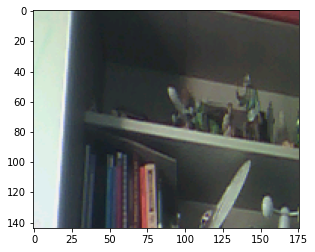

In [13]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()